## References:
1. https://www.analyticsvidhya.com/blog/2021/06/music-genres-classification-using-deep-learning-techniques/
2. https://data-flair.training/blogs/python-project-music-genre-classification/
3. https://blog.clairvoyantsoft.com/music-genre-classification-using-cnn-ef9461553726
4. https://github.com/AmbarZaidi/Audio-Genre-Classification
5. https://github.com/noahunallar/music-genre-recognition-using-neural-networks-and-k-means

In [101]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


### Papers

1)
Automatic Musical Genre Classification Of Audio Signals
http://ismir2001.ismir.net/pdf/tzanetakis.pdf 

2) Feature Extraction for Musical Genre Classification (2015 ) with reference to 1 
http://hpac.rwth-aachen.de/teaching/sem-mus-15/reports/Merkelbach.pdf

3) SONG-LEVEL FEATURES AND SUPPORT VECTOR MACHINES FOR MUSIC CLASSIFICATION
https://www.ee.columbia.edu/~dpwe/pubs/ismir05-svm.pdf

4) Music Genre Classification
http://cs229.stanford.edu/proj2011/HaggbladeHongKao-MusicGenreClassification.pdf

### Libraries

python_speech_features
http://python-speech-features.readthedocs.io/en/latest/
https://github.com/jameslyons/python_speech_features


MFCC tutorial
http://webcache.googleusercontent.com/search?q=cache:BlLUHkdAU_IJ:practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/+&cd=1&hl=en&ct=clnk&gl=in
http://www.practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/


Reading the signal 
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.io.wavfile.read.html

Hamming Window
https://docs.scipy.org/doc/numpy/reference/generated/numpy.hamming.html




gits: 
https://github.com/mmoksas68/Music-Genre-Classification



## Some Findings 

- **Librosa** Library is to convert the music to the **spectograms**. Each music file will be one a spectogram
- The **Wavelet** Transform is a transformation that can be used to analyze the spectral and temporal properties of non-stationary signals like audio. **Librosa** library is to generate wavelets of each audio file.
- Also librosa.display will help to display 

### Comments by the already used methods 
- We train our CNN model for 500 epochs with Adam optimizer at a learning rate of 0.0001. We use categorical cross-entropy as the loss function [1]

### Small Discussion



## Libraries 

In [59]:
import scipy.io.wavfile as wav
from tensorflow import keras  
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.axes as axt
from python_speech_features import mfcc
import pandas as pd
import numpy as np
from tempfile import TemporaryFile
import librosa, librosa.display
import json
import os
import math
import pickle
import random
import operator
import subprocess
from pydub.playback import play
from pydub import AudioSegment
from os import walk, listdir, chdir
from os.path import isfile, join
import scipy.io.wavfile as wav
import tensorflow as tf
from keras.utils.np_utils import to_categorical

In [10]:
def test_song(current_song_path, next_path, genre = "pop", JSON_PATH = "/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/testing/tmp.json"):
    write_as_wav(current_song_path, next_path, genre)
    save_as_mfcc(current_song_path, JSON_PATH, num_segments = 15)

In [11]:
current_song_path = "/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/testing/Pop"
next_path = "/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/testing/wav"

In [12]:
test_song(current_song_path, next_path, "pop")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/testing/Pop'

In [ ]:
write_as_wav(song,song, "pop")

## Adding 100 songs to my data from each genre ( function )

In [13]:
def write_as_wav(new_songs_path, wav_songs_path, genre = "empty."):
    # Find those song files
    onlyfiles = [f for f in listdir(new_songs_path) if isfile(join(new_songs_path, f))]
    
    
    numb = 100
    audio_length = 30 * 1000 # in milliseconds, 30 seconds
    for f in onlyfiles: 
        filename = os.fsdecode(f)
        if filename.endswith(".mp3") or filename.endswith(".MP3"):
            xpath = os.path.join(new_songs_path,filename)
            print(xpath)
            new  = os.path.join(os.path.join(wav_songs_path),genre + str(numb).zfill(5) + ".wav" )
            audSeg = AudioSegment.from_mp3(xpath)
            audSeg = audSeg[0:audio_length]
            audSeg = audSeg.set_frame_rate(22050)
            audSeg.export(new, format="wav")
            numb = numb +  1

### Preprocessing 
Extracting data from music dataset and writing to JSON 

In [14]:

# DATASET_PATH = "./Data/genres_original"
# JSON_PATH = "data.json_mfcc_5"
# SAMPLE_RATE = 22050
# DURATION = 30 #in seconds
# SAMPLES_PER_TRACK = SAMPLE_RATE*DURATION #22050*30

In [15]:
#num_segments is needed for NN, which needs chunks of data, rather than one full segment. 

def save_as_mfcc(dataset_path, json_path, num_mfcc = 13, n_fft = 2048, hop_length = 512, num_segments = 10):
    data = {
        "mapping": [],
        "mfcc": [],
        "labels": []
    }
    #overall number of samples per track 
    
    num_samples_per_segment = int(SAMPLES_PER_TRACK / num_segments) # 22050 * 30 / 10 
    expected_num_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment/hop_length) #calculating mfcc by the hop_length (fourier shifting) and we need to ceil the value
    print(expected_num_mfcc_vectors_per_segment)
    #looping through all the genres and 
    #dirpath - current, dirnames - subfolders, filenames - all file names 
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        
        #ensure that we're not att he root level
        if dirpath is not dataset_path:
            
            #save the semantic label, save the semantic (genre) levels
            dirpath_components = dirpath.split("/") #genre/blues will give us ["genre_original", "blues"]
            semantic_label = dirpath_components[-1] #consider the last, which is blues 
            data["mapping"].append(semantic_label)
            print("\nProcessing {}".format(semantic_label))
            
            # process files for a specific genre
            for f in filenames: 
                print(f)
                #load audio file
                file_path = os.path.join(dirpath, f) #file path for the audio file 
                if not file_path.endswith('.DS_Store'):
                    signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)

                    # process segments extracting mfcc and storing data 
                    for s in range(num_segments):
                        start_sample = num_samples_per_segment * s #s=0 -> 0
                        finish_sample = start_sample + num_samples_per_segment #s=0 -> num_samples_per_segment

                        mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample], sr, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)

                        mfcc = mfcc.T

                        # store mfcc for segment if it has the expected length 
                        if len(mfcc) == expected_num_mfcc_vectors_per_segment:
                            data["mfcc"].append(mfcc.tolist())
                            data["labels"].append(i-1)
                            print("{}, segment:{}".format(file_path, s+1))

    with open(json_path, "w") as fp:
        json.dump(data,fp, indent=4)
                    


Read Data

In [16]:
# Kaggle 

In [ ]:
# Colab
seg_30_JSON_PATH = "/content/drive/MyDrive/Colab Notebooks/mfcc_seg_30_data.json"
seg_15_JSON_PATH = "/content/drive/MyDrive/Colab Notebooks/mfcc_seg_15_data.json"
seg_10_JSON_PATH = "/content/drive/MyDrive/Colab Notebooks/mfcc_seg_10_data.json"
seg_6_JSON_PATH  = "/content/drive/MyDrive/Colab Notebooks/mfcc_seg_6_data.json"
seg_3_JSON_PATH = "/content/drive/MyDrive/Colab Notebooks/mfcc_seg_3_data.json"
seg_1_JSON_PATH =  "/content/drive/MyDrive/Colab Notebooks/mfcc_seg_1_data.json"
SAMPLE_RATE = 22050
DURATION = 30 #in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE*DURATION #22050*30

In [60]:
# My Mac
seg_30_JSON_PATH = "/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/mfcc_seg_30_data.json"
seg_15_JSON_PATH = "/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/mfcc_seg_15_data.json"
seg_10_JSON_PATH = "/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/mfcc_seg_10_data.json"
seg_6_JSON_PATH  = "//Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/mfcc_seg_6_data.json"
seg_3_JSON_PATH = "/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/mfcc_seg_3_data.json"
seg_1_JSON_PATH =  "/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/mfcc_seg_1_data.json"
SAMPLE_RATE = 22050
DURATION = 30 #in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE*DURATION #22050*30

In [18]:

from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [48]:
with open(seg_30_JSON_PATH, "r") as fp:
    conv1d_data = json.load(fp)

In [49]:
arr = np.array(conv1d_data)

In [50]:
th_inputs = np.array(conv1d_data["mfcc"])
th_targets = np.array(conv1d_data["labels"])

In [51]:

len(th_inputs)

65901

In [52]:

labels = ["pop",
        "metal",
        "disco",
        "blues",
        "mugam",
        "reggae",
        "classical",
        "rock",
        "hiphop",
        "country",
        "jazz"]

Erasing zeros from the data and labels

In [53]:
index = 0
next_inputs = th_inputs
next_targets = th_targets
length_of_array = len(next_inputs)
while index != len(next_inputs) - 1:
    print(index, len(next_inputs))
    if(0.0 in next_inputs[index]):
        next_inputs =np.delete(next_inputs, index, 0)
        next_targets = np.delete(next_targets, index, 0)
        index = index - 1
    index = index + 1

0 65901
0 65900
1 65900
2 65900
3 65900
4 65900
5 65900
6 65900
7 65900
8 65900
9 65900
10 65900
11 65900
12 65900
13 65900
14 65900
15 65900
16 65900
17 65900
18 65900
19 65900
20 65900
21 65900
22 65900
23 65900
24 65900
25 65900
26 65900
27 65900
28 65900
29 65900
29 65899
30 65899
31 65899
32 65899
33 65899
34 65899
35 65899
36 65899
37 65899
38 65899
39 65899
40 65899
41 65899
42 65899
43 65899
44 65899
45 65899
46 65899
47 65899
48 65899
49 65899
50 65899
51 65899
52 65899
53 65899
54 65899
55 65899
56 65899
57 65899
58 65899
58 65898
59 65898
60 65898
61 65898
62 65898
63 65898
64 65898
65 65898
66 65898
67 65898
68 65898
69 65898
70 65898
71 65898
72 65898
73 65898
74 65898
75 65898
76 65898
77 65898
78 65898
79 65898
80 65898
81 65898
82 65898
83 65898
84 65898
85 65898
86 65898
87 65898
87 65897
88 65897
89 65897
90 65897
91 65897
92 65897
93 65897
94 65897
95 65897
96 65897
97 65897
98 65897
99 65897
100 65897
101 65897
102 65897
103 65897
104 65897
105 65897
106 65897
107 6

858 65888
859 65888
860 65888
861 65888
862 65888
863 65888
864 65888
865 65888
866 65888
867 65888
868 65888
869 65888
870 65888
871 65888
872 65888
873 65888
874 65888
875 65888
876 65888
877 65888
878 65888
879 65888
880 65888
881 65888
882 65888
883 65888
884 65888
885 65888
886 65888
887 65888
887 65887
888 65887
889 65887
890 65887
891 65887
892 65887
893 65887
894 65887
895 65887
896 65887
897 65887
898 65887
899 65887
900 65887
901 65887
902 65887
903 65887
904 65887
905 65887
906 65887
907 65887
908 65887
909 65887
910 65887
911 65887
912 65887
913 65887
914 65887
915 65887
916 65887
916 65886
917 65886
918 65886
919 65886
920 65886
921 65886
922 65886
923 65886
924 65886
925 65886
926 65886
927 65886
928 65886
929 65886
930 65886
931 65886
932 65886
933 65886
934 65886
935 65886
936 65886
937 65886
938 65886
939 65886
940 65886
941 65886
942 65886
943 65886
944 65886
945 65886
945 65885
946 65885
947 65885
948 65885
949 65885
950 65885
951 65885
952 65885
953 65885
954 65885


1657 65877
1658 65877
1659 65877
1660 65877
1661 65877
1662 65877
1663 65877
1664 65877
1665 65877
1666 65877
1667 65877
1668 65877
1669 65877
1670 65877
1671 65877
1672 65877
1673 65877
1674 65877
1675 65877
1676 65877
1677 65877
1678 65877
1679 65877
1680 65877
1681 65877
1682 65877
1683 65877
1684 65877
1685 65877
1686 65877
1686 65876
1687 65876
1688 65876
1689 65876
1690 65876
1691 65876
1692 65876
1693 65876
1694 65876
1695 65876
1696 65876
1697 65876
1698 65876
1699 65876
1700 65876
1701 65876
1702 65876
1703 65876
1704 65876
1705 65876
1706 65876
1707 65876
1708 65876
1709 65876
1710 65876
1711 65876
1712 65876
1713 65876
1714 65876
1715 65876
1716 65876
1717 65876
1718 65876
1719 65876
1720 65876
1721 65876
1722 65876
1723 65876
1724 65876
1725 65876
1726 65876
1727 65876
1728 65876
1729 65876
1730 65876
1731 65876
1732 65876
1733 65876
1734 65876
1735 65876
1736 65876
1737 65876
1738 65876
1739 65876
1740 65876
1741 65876
1742 65876
1743 65876
1744 65876
1745 65876
1746 65876

2493 65873
2494 65873
2495 65873
2496 65873
2497 65873
2498 65873
2499 65873
2500 65873
2501 65873
2502 65873
2503 65873
2504 65873
2505 65873
2506 65873
2507 65873
2508 65873
2509 65873
2510 65873
2511 65873
2512 65873
2513 65873
2514 65873
2515 65873
2516 65873
2517 65873
2518 65873
2519 65873
2520 65873
2521 65873
2522 65873
2522 65872
2523 65872
2524 65872
2525 65872
2526 65872
2527 65872
2528 65872
2529 65872
2530 65872
2531 65872
2532 65872
2533 65872
2534 65872
2535 65872
2536 65872
2537 65872
2538 65872
2539 65872
2540 65872
2541 65872
2542 65872
2543 65872
2544 65872
2545 65872
2546 65872
2547 65872
2548 65872
2549 65872
2550 65872
2551 65872
2552 65872
2553 65872
2554 65872
2555 65872
2556 65872
2557 65872
2558 65872
2559 65872
2560 65872
2561 65872
2562 65872
2563 65872
2564 65872
2565 65872
2566 65872
2567 65872
2568 65872
2569 65872
2570 65872
2571 65872
2572 65872
2573 65872
2574 65872
2575 65872
2576 65872
2577 65872
2578 65872
2579 65872
2580 65872
2581 65872
2582 65872

3236 65866
3237 65866
3238 65866
3239 65866
3240 65866
3241 65866
3242 65866
3243 65866
3244 65866
3245 65866
3246 65866
3247 65866
3248 65866
3249 65866
3250 65866
3251 65866
3252 65866
3253 65866
3254 65866
3255 65866
3256 65866
3257 65866
3258 65866
3259 65866
3260 65866
3261 65866
3262 65866
3263 65866
3264 65866
3265 65866
3266 65866
3267 65866
3268 65866
3269 65866
3270 65866
3271 65866
3272 65866
3273 65866
3274 65866
3275 65866
3276 65866
3277 65866
3278 65866
3279 65866
3280 65866
3281 65866
3282 65866
3283 65866
3284 65866
3285 65866
3286 65866
3287 65866
3288 65866
3289 65866
3290 65866
3291 65866
3292 65866
3293 65866
3294 65866
3295 65866
3295 65865
3296 65865
3297 65865
3298 65865
3299 65865
3300 65865
3301 65865
3302 65865
3303 65865
3304 65865
3305 65865
3306 65865
3307 65865
3308 65865
3309 65865
3310 65865
3311 65865
3312 65865
3313 65865
3314 65865
3315 65865
3316 65865
3317 65865
3318 65865
3319 65865
3320 65865
3321 65865
3322 65865
3323 65865
3324 65865
3324 65864

3977 65857
3977 65856
3978 65856
3979 65856
3980 65856
3981 65856
3982 65856
3983 65856
3984 65856
3985 65856
3986 65856
3987 65856
3988 65856
3989 65856
3990 65856
3991 65856
3992 65856
3993 65856
3994 65856
3995 65856
3996 65856
3997 65856
3998 65856
3999 65856
4000 65856
4001 65856
4002 65856
4003 65856
4004 65856
4005 65856
4005 65855
4006 65855
4007 65855
4008 65855
4009 65855
4010 65855
4011 65855
4012 65855
4013 65855
4014 65855
4015 65855
4016 65855
4017 65855
4018 65855
4019 65855
4020 65855
4021 65855
4022 65855
4023 65855
4024 65855
4025 65855
4026 65855
4027 65855
4028 65855
4029 65855
4030 65855
4031 65855
4032 65855
4033 65855
4034 65855
4035 65855
4036 65855
4037 65855
4038 65855
4039 65855
4040 65855
4041 65855
4042 65855
4043 65855
4044 65855
4045 65855
4046 65855
4047 65855
4048 65855
4049 65855
4050 65855
4051 65855
4052 65855
4053 65855
4054 65855
4055 65855
4056 65855
4057 65855
4058 65855
4059 65855
4060 65855
4061 65855
4062 65855
4063 65855
4064 65855
4065 65855

4837 65847
4838 65847
4839 65847
4840 65847
4841 65847
4842 65847
4843 65847
4844 65847
4845 65847
4846 65847
4847 65847
4848 65847
4849 65847
4850 65847
4851 65847
4852 65847
4853 65847
4854 65847
4855 65847
4856 65847
4857 65847
4858 65847
4859 65847
4860 65847
4861 65847
4862 65847
4863 65847
4864 65847
4865 65847
4866 65847
4866 65846
4867 65846
4868 65846
4869 65846
4870 65846
4871 65846
4872 65846
4873 65846
4874 65846
4875 65846
4876 65846
4877 65846
4878 65846
4879 65846
4880 65846
4881 65846
4882 65846
4883 65846
4884 65846
4885 65846
4886 65846
4887 65846
4888 65846
4889 65846
4890 65846
4891 65846
4892 65846
4893 65846
4894 65846
4895 65846
4896 65846
4897 65846
4898 65846
4899 65846
4900 65846
4901 65846
4902 65846
4903 65846
4904 65846
4905 65846
4906 65846
4907 65846
4908 65846
4909 65846
4910 65846
4911 65846
4912 65846
4913 65846
4914 65846
4915 65846
4916 65846
4917 65846
4918 65846
4919 65846
4920 65846
4921 65846
4922 65846
4923 65846
4924 65846
4925 65846
4926 65846

5576 65836
5577 65836
5578 65836
5579 65836
5580 65836
5581 65836
5582 65836
5583 65836
5584 65836
5585 65836
5586 65836
5587 65836
5588 65836
5589 65836
5590 65836
5591 65836
5592 65836
5593 65836
5594 65836
5595 65836
5596 65836
5597 65836
5598 65836
5599 65836
5600 65836
5601 65836
5602 65836
5603 65836
5604 65836
5605 65836
5606 65836
5607 65836
5608 65836
5609 65836
5610 65836
5611 65836
5612 65836
5613 65836
5614 65836
5615 65836
5616 65836
5617 65836
5618 65836
5619 65836
5620 65836
5621 65836
5622 65836
5623 65836
5624 65836
5625 65836
5626 65836
5627 65836
5628 65836
5629 65836
5630 65836
5631 65836
5632 65836
5633 65836
5634 65836
5635 65836
5635 65835
5636 65835
5637 65835
5638 65835
5639 65835
5640 65835
5641 65835
5642 65835
5643 65835
5644 65835
5645 65835
5646 65835
5647 65835
5648 65835
5649 65835
5650 65835
5651 65835
5652 65835
5653 65835
5654 65835
5655 65835
5656 65835
5657 65835
5658 65835
5659 65835
5660 65835
5661 65835
5662 65835
5663 65835
5664 65835
5665 65835

6376 65826
6377 65826
6378 65826
6379 65826
6380 65826
6381 65826
6382 65826
6383 65826
6384 65826
6385 65826
6386 65826
6387 65826
6388 65826
6389 65826
6390 65826
6391 65826
6392 65826
6393 65826
6394 65826
6395 65826
6396 65826
6397 65826
6398 65826
6399 65826
6400 65826
6401 65826
6402 65826
6403 65826
6404 65826
6405 65826
6405 65825
6406 65825
6407 65825
6408 65825
6409 65825
6410 65825
6411 65825
6412 65825
6413 65825
6414 65825
6415 65825
6416 65825
6417 65825
6418 65825
6419 65825
6420 65825
6421 65825
6422 65825
6423 65825
6424 65825
6425 65825
6426 65825
6427 65825
6428 65825
6429 65825
6430 65825
6431 65825
6432 65825
6433 65825
6434 65825
6434 65824
6435 65824
6436 65824
6437 65824
6438 65824
6439 65824
6440 65824
6441 65824
6442 65824
6443 65824
6444 65824
6445 65824
6446 65824
6447 65824
6448 65824
6449 65824
6450 65824
6451 65824
6452 65824
6453 65824
6454 65824
6455 65824
6456 65824
6457 65824
6458 65824
6459 65824
6460 65824
6461 65824
6462 65824
6463 65824
6464 65824

7295 65815
7296 65815
7297 65815
7298 65815
7299 65815
7300 65815
7301 65815
7302 65815
7303 65815
7304 65815
7305 65815
7306 65815
7307 65815
7308 65815
7309 65815
7310 65815
7311 65815
7312 65815
7313 65815
7314 65815
7315 65815
7316 65815
7317 65815
7318 65815
7319 65815
7320 65815
7321 65815
7322 65815
7323 65815
7324 65815
7324 65814
7325 65814
7326 65814
7327 65814
7328 65814
7329 65814
7330 65814
7331 65814
7332 65814
7333 65814
7334 65814
7335 65814
7336 65814
7337 65814
7338 65814
7339 65814
7340 65814
7341 65814
7342 65814
7343 65814
7344 65814
7345 65814
7346 65814
7347 65814
7348 65814
7349 65814
7350 65814
7351 65814
7352 65814
7353 65814
7354 65814
7355 65814
7356 65814
7357 65814
7358 65814
7359 65814
7360 65814
7361 65814
7362 65814
7363 65814
7364 65814
7365 65814
7366 65814
7367 65814
7368 65814
7369 65814
7370 65814
7371 65814
7372 65814
7373 65814
7374 65814
7375 65814
7376 65814
7377 65814
7378 65814
7379 65814
7380 65814
7381 65814
7382 65814
7383 65814
7383 65813

8186 65806
8186 65805
8187 65805
8188 65805
8189 65805
8190 65805
8191 65805
8192 65805
8193 65805
8194 65805
8195 65805
8196 65805
8197 65805
8198 65805
8199 65805
8200 65805
8201 65805
8202 65805
8203 65805
8204 65805
8205 65805
8206 65805
8207 65805
8208 65805
8209 65805
8210 65805
8211 65805
8212 65805
8213 65805
8214 65805
8215 65805
8216 65805
8217 65805
8218 65805
8219 65805
8220 65805
8221 65805
8222 65805
8223 65805
8224 65805
8225 65805
8226 65805
8227 65805
8228 65805
8229 65805
8230 65805
8231 65805
8232 65805
8233 65805
8234 65805
8235 65805
8236 65805
8237 65805
8238 65805
8239 65805
8240 65805
8241 65805
8242 65805
8243 65805
8244 65805
8245 65805
8246 65805
8247 65805
8248 65805
8249 65805
8250 65805
8251 65805
8252 65805
8253 65805
8254 65805
8255 65805
8256 65805
8257 65805
8258 65805
8259 65805
8260 65805
8261 65805
8262 65805
8263 65805
8264 65805
8265 65805
8266 65805
8267 65805
8268 65805
8269 65805
8270 65805
8271 65805
8272 65805
8273 65805
8274 65805
8274 65804

8962 65802
8963 65802
8964 65802
8965 65802
8966 65802
8967 65802
8968 65802
8969 65802
8970 65802
8971 65802
8972 65802
8973 65802
8974 65802
8975 65802
8976 65802
8977 65802
8978 65802
8979 65802
8980 65802
8981 65802
8982 65802
8983 65802
8984 65802
8985 65802
8986 65802
8987 65802
8988 65802
8989 65802
8990 65802
8991 65802
8991 65801
8992 65801
8993 65801
8994 65801
8995 65801
8996 65801
8997 65801
8998 65801
8999 65801
9000 65801
9001 65801
9002 65801
9003 65801
9004 65801
9005 65801
9006 65801
9007 65801
9008 65801
9009 65801
9010 65801
9011 65801
9012 65801
9013 65801
9014 65801
9015 65801
9016 65801
9017 65801
9018 65801
9019 65801
9020 65801
9020 65800
9021 65800
9022 65800
9023 65800
9024 65800
9025 65800
9026 65800
9027 65800
9028 65800
9029 65800
9030 65800
9031 65800
9032 65800
9033 65800
9034 65800
9035 65800
9036 65800
9037 65800
9038 65800
9039 65800
9040 65800
9041 65800
9042 65800
9043 65800
9044 65800
9045 65800
9046 65800
9047 65800
9048 65800
9049 65800
9050 65800

9706 65796
9707 65796
9708 65796
9709 65796
9710 65796
9711 65796
9712 65796
9713 65796
9714 65796
9715 65796
9716 65796
9717 65796
9718 65796
9719 65796
9720 65796
9721 65796
9722 65796
9723 65796
9724 65796
9725 65796
9726 65796
9727 65796
9728 65796
9729 65796
9730 65796
9731 65796
9732 65796
9733 65796
9734 65796
9735 65796
9736 65796
9737 65796
9738 65796
9739 65796
9740 65796
9741 65796
9742 65796
9743 65796
9744 65796
9745 65796
9746 65796
9747 65796
9748 65796
9749 65796
9750 65796
9751 65796
9752 65796
9753 65796
9754 65796
9755 65796
9756 65796
9757 65796
9758 65796
9759 65796
9760 65796
9761 65796
9762 65796
9763 65796
9764 65796
9765 65796
9766 65796
9767 65796
9768 65796
9769 65796
9770 65796
9771 65796
9772 65796
9773 65796
9774 65796
9775 65796
9776 65796
9777 65796
9778 65796
9779 65796
9780 65796
9781 65796
9782 65796
9783 65796
9784 65796
9785 65796
9786 65796
9787 65796
9788 65796
9789 65796
9790 65796
9791 65796
9792 65796
9793 65796
9794 65796
9795 65796
9795 65795

10630 65790
10631 65790
10632 65790
10633 65790
10634 65790
10635 65790
10636 65790
10637 65790
10638 65790
10639 65790
10640 65790
10641 65790
10642 65790
10643 65790
10644 65790
10645 65790
10646 65790
10647 65790
10648 65790
10649 65790
10650 65790
10651 65790
10652 65790
10653 65790
10654 65790
10655 65790
10656 65790
10657 65790
10658 65790
10659 65790
10659 65789
10660 65789
10661 65789
10662 65789
10663 65789
10664 65789
10665 65789
10666 65789
10667 65789
10668 65789
10669 65789
10670 65789
10671 65789
10672 65789
10673 65789
10674 65789
10675 65789
10676 65789
10677 65789
10678 65789
10679 65789
10680 65789
10681 65789
10682 65789
10683 65789
10684 65789
10685 65789
10686 65789
10687 65789
10688 65789
10688 65788
10689 65788
10690 65788
10691 65788
10692 65788
10693 65788
10694 65788
10695 65788
10696 65788
10697 65788
10698 65788
10699 65788
10700 65788
10701 65788
10702 65788
10703 65788
10704 65788
10705 65788
10706 65788
10707 65788
10708 65788
10709 65788
10710 65788
1071

11308 65778
11309 65778
11310 65778
11311 65778
11312 65778
11313 65778
11314 65778
11315 65778
11316 65778
11317 65778
11318 65778
11319 65778
11320 65778
11321 65778
11322 65778
11323 65778
11324 65778
11325 65778
11326 65778
11327 65778
11328 65778
11329 65778
11330 65778
11331 65778
11332 65778
11333 65778
11334 65778
11335 65778
11336 65778
11337 65778
11338 65778
11339 65778
11340 65778
11341 65778
11342 65778
11343 65778
11344 65778
11345 65778
11346 65778
11347 65778
11348 65778
11349 65778
11350 65778
11351 65778
11352 65778
11353 65778
11354 65778
11355 65778
11356 65778
11357 65778
11358 65778
11359 65778
11360 65778
11361 65778
11362 65778
11363 65778
11364 65778
11365 65778
11366 65778
11367 65778
11367 65777
11368 65777
11369 65777
11370 65777
11371 65777
11372 65777
11373 65777
11374 65777
11375 65777
11376 65777
11377 65777
11378 65777
11379 65777
11380 65777
11381 65777
11382 65777
11383 65777
11384 65777
11385 65777
11386 65777
11387 65777
11388 65777
11389 65777
1139

11991 65771
11992 65771
11993 65771
11994 65771
11995 65771
11996 65771
11997 65771
11998 65771
11999 65771
12000 65771
12001 65771
12002 65771
12003 65771
12004 65771
12005 65771
12006 65771
12007 65771
12008 65771
12009 65771
12010 65771
12011 65771
12012 65771
12013 65771
12014 65771
12015 65771
12016 65771
12017 65771
12018 65771
12019 65771
12020 65771
12020 65770
12020 65769
12021 65769
12022 65769
12023 65769
12024 65769
12025 65769
12026 65769
12027 65769
12028 65769
12029 65769
12030 65769
12031 65769
12032 65769
12033 65769
12034 65769
12035 65769
12036 65769
12037 65769
12038 65769
12039 65769
12040 65769
12041 65769
12042 65769
12043 65769
12044 65769
12045 65769
12046 65769
12047 65769
12048 65769
12048 65768
12049 65768
12050 65768
12051 65768
12052 65768
12053 65768
12054 65768
12055 65768
12056 65768
12057 65768
12058 65768
12059 65768
12060 65768
12061 65768
12062 65768
12063 65768
12064 65768
12065 65768
12066 65768
12067 65768
12068 65768
12069 65768
12070 65768
1207

12852 65762
12853 65762
12854 65762
12855 65762
12856 65762
12857 65762
12858 65762
12859 65762
12860 65762
12861 65762
12862 65762
12863 65762
12864 65762
12865 65762
12866 65762
12867 65762
12868 65762
12869 65762
12870 65762
12871 65762
12872 65762
12873 65762
12874 65762
12875 65762
12876 65762
12877 65762
12878 65762
12879 65762
12880 65762
12881 65762
12881 65761
12882 65761
12883 65761
12884 65761
12885 65761
12886 65761
12887 65761
12888 65761
12889 65761
12890 65761
12891 65761
12892 65761
12893 65761
12894 65761
12895 65761
12896 65761
12897 65761
12898 65761
12899 65761
12900 65761
12901 65761
12902 65761
12903 65761
12904 65761
12905 65761
12906 65761
12907 65761
12908 65761
12909 65761
12910 65761
12910 65760
12910 65759
12911 65759
12912 65759
12913 65759
12914 65759
12915 65759
12916 65759
12917 65759
12918 65759
12919 65759
12920 65759
12921 65759
12922 65759
12923 65759
12924 65759
12925 65759
12926 65759
12927 65759
12928 65759
12929 65759
12930 65759
12931 65759
1293

13650 65750
13651 65750
13652 65750
13653 65750
13654 65750
13655 65750
13656 65750
13657 65750
13658 65750
13659 65750
13660 65750
13661 65750
13662 65750
13663 65750
13664 65750
13665 65750
13666 65750
13667 65750
13668 65750
13669 65750
13670 65750
13671 65750
13672 65750
13673 65750
13674 65750
13675 65750
13676 65750
13677 65750
13678 65750
13679 65750
13679 65749
13680 65749
13681 65749
13682 65749
13683 65749
13684 65749
13685 65749
13686 65749
13687 65749
13688 65749
13689 65749
13690 65749
13691 65749
13692 65749
13693 65749
13694 65749
13695 65749
13696 65749
13697 65749
13698 65749
13699 65749
13700 65749
13701 65749
13702 65749
13703 65749
13704 65749
13705 65749
13706 65749
13707 65749
13708 65749
13708 65748
13709 65748
13710 65748
13711 65748
13712 65748
13713 65748
13714 65748
13715 65748
13716 65748
13717 65748
13718 65748
13719 65748
13720 65748
13721 65748
13722 65748
13723 65748
13724 65748
13725 65748
13726 65748
13727 65748
13728 65748
13729 65748
13730 65748
1373

14416 65736
14417 65736
14418 65736
14419 65736
14420 65736
14421 65736
14422 65736
14423 65736
14424 65736
14425 65736
14426 65736
14427 65736
14428 65736
14429 65736
14430 65736
14431 65736
14432 65736
14433 65736
14434 65736
14435 65736
14436 65736
14437 65736
14438 65736
14439 65736
14440 65736
14441 65736
14442 65736
14443 65736
14444 65736
14445 65736
14445 65735
14446 65735
14447 65735
14448 65735
14449 65735
14450 65735
14451 65735
14452 65735
14453 65735
14454 65735
14455 65735
14456 65735
14457 65735
14458 65735
14459 65735
14460 65735
14461 65735
14462 65735
14463 65735
14464 65735
14465 65735
14466 65735
14467 65735
14468 65735
14469 65735
14470 65735
14471 65735
14472 65735
14473 65735
14474 65735
14474 65734
14475 65734
14476 65734
14477 65734
14478 65734
14479 65734
14480 65734
14481 65734
14482 65734
14483 65734
14484 65734
14485 65734
14486 65734
14487 65734
14488 65734
14489 65734
14490 65734
14491 65734
14492 65734
14493 65734
14494 65734
14495 65734
14496 65734
1449

15361 65721
15362 65721
15363 65721
15364 65721
15365 65721
15366 65721
15367 65721
15368 65721
15369 65721
15370 65721
15371 65721
15372 65721
15373 65721
15374 65721
15375 65721
15376 65721
15377 65721
15378 65721
15379 65721
15380 65721
15381 65721
15382 65721
15383 65721
15384 65721
15385 65721
15386 65721
15387 65721
15388 65721
15389 65721
15390 65721
15390 65720
15391 65720
15392 65720
15393 65720
15394 65720
15395 65720
15396 65720
15397 65720
15398 65720
15399 65720
15400 65720
15401 65720
15402 65720
15403 65720
15404 65720
15405 65720
15406 65720
15407 65720
15408 65720
15409 65720
15410 65720
15411 65720
15412 65720
15413 65720
15414 65720
15415 65720
15416 65720
15417 65720
15418 65720
15419 65720
15419 65719
15420 65719
15421 65719
15422 65719
15423 65719
15424 65719
15425 65719
15426 65719
15427 65719
15428 65719
15429 65719
15430 65719
15431 65719
15432 65719
15433 65719
15434 65719
15435 65719
15436 65719
15437 65719
15438 65719
15439 65719
15440 65719
15441 65719
1544

16066 65711
16067 65711
16068 65711
16069 65711
16070 65711
16071 65711
16072 65711
16073 65711
16074 65711
16075 65711
16076 65711
16077 65711
16078 65711
16079 65711
16080 65711
16081 65711
16082 65711
16083 65711
16084 65711
16085 65711
16086 65711
16087 65711
16088 65711
16089 65711
16090 65711
16091 65711
16092 65711
16093 65711
16094 65711
16095 65711
16096 65711
16097 65711
16098 65711
16099 65711
16100 65711
16101 65711
16102 65711
16103 65711
16104 65711
16105 65711
16106 65711
16107 65711
16108 65711
16109 65711
16110 65711
16111 65711
16112 65711
16113 65711
16114 65711
16115 65711
16116 65711
16117 65711
16118 65711
16119 65711
16120 65711
16121 65711
16122 65711
16123 65711
16124 65711
16125 65711
16126 65711
16127 65711
16128 65711
16129 65711
16130 65711
16131 65711
16132 65711
16133 65711
16134 65711
16135 65711
16136 65711
16137 65711
16138 65711
16139 65711
16140 65711
16141 65711
16142 65711
16143 65711
16144 65711
16145 65711
16146 65711
16147 65711
16148 65711
1614

16870 65701
16871 65701
16872 65701
16873 65701
16874 65701
16875 65701
16876 65701
16877 65701
16878 65701
16879 65701
16880 65701
16881 65701
16882 65701
16883 65701
16884 65701
16885 65701
16886 65701
16887 65701
16888 65701
16889 65701
16890 65701
16891 65701
16892 65701
16893 65701
16894 65701
16895 65701
16896 65701
16897 65701
16898 65701
16899 65701
16899 65700
16900 65700
16901 65700
16902 65700
16903 65700
16904 65700
16905 65700
16906 65700
16907 65700
16908 65700
16909 65700
16910 65700
16911 65700
16912 65700
16913 65700
16914 65700
16915 65700
16916 65700
16917 65700
16918 65700
16919 65700
16920 65700
16921 65700
16922 65700
16923 65700
16924 65700
16925 65700
16926 65700
16927 65700
16928 65700
16928 65699
16929 65699
16930 65699
16931 65699
16932 65699
16933 65699
16934 65699
16935 65699
16936 65699
16937 65699
16938 65699
16939 65699
16940 65699
16941 65699
16942 65699
16943 65699
16944 65699
16945 65699
16946 65699
16947 65699
16948 65699
16949 65699
16950 65699
1695

17578 65689
17579 65689
17580 65689
17581 65689
17582 65689
17583 65689
17584 65689
17585 65689
17586 65689
17587 65689
17588 65689
17589 65689
17590 65689
17591 65689
17592 65689
17593 65689
17594 65689
17595 65689
17596 65689
17597 65689
17598 65689
17599 65689
17600 65689
17601 65689
17602 65689
17603 65689
17604 65689
17605 65689
17606 65689
17607 65689
17607 65688
17608 65688
17609 65688
17610 65688
17611 65688
17612 65688
17613 65688
17614 65688
17615 65688
17616 65688
17617 65688
17618 65688
17619 65688
17620 65688
17621 65688
17622 65688
17623 65688
17624 65688
17625 65688
17626 65688
17627 65688
17628 65688
17629 65688
17630 65688
17631 65688
17632 65688
17633 65688
17634 65688
17635 65688
17636 65688
17636 65687
17637 65687
17638 65687
17639 65687
17640 65687
17641 65687
17642 65687
17643 65687
17644 65687
17645 65687
17646 65687
17647 65687
17648 65687
17649 65687
17650 65687
17651 65687
17652 65687
17653 65687
17654 65687
17655 65687
17656 65687
17657 65687
17658 65687
1765

18261 65682
18262 65682
18263 65682
18264 65682
18265 65682
18266 65682
18267 65682
18268 65682
18269 65682
18270 65682
18271 65682
18272 65682
18273 65682
18274 65682
18275 65682
18276 65682
18277 65682
18278 65682
18279 65682
18280 65682
18281 65682
18282 65682
18283 65682
18284 65682
18285 65682
18286 65682
18287 65682
18288 65682
18289 65682
18290 65682
18291 65682
18292 65682
18293 65682
18294 65682
18295 65682
18296 65682
18297 65682
18298 65682
18299 65682
18300 65682
18301 65682
18302 65682
18303 65682
18304 65682
18305 65682
18306 65682
18307 65682
18308 65682
18309 65682
18310 65682
18311 65682
18312 65682
18313 65682
18314 65682
18315 65682
18316 65682
18317 65682
18318 65682
18319 65682
18320 65682
18321 65682
18322 65682
18323 65682
18324 65682
18325 65682
18326 65682
18327 65682
18328 65682
18329 65682
18330 65682
18331 65682
18332 65682
18333 65682
18334 65682
18335 65682
18336 65682
18337 65682
18338 65682
18339 65682
18340 65682
18341 65682
18342 65682
18343 65682
1834

18953 65678
18954 65678
18955 65678
18956 65678
18957 65678
18958 65678
18959 65678
18960 65678
18961 65678
18962 65678
18963 65678
18964 65678
18965 65678
18966 65678
18967 65678
18968 65678
18969 65678
18970 65678
18971 65678
18972 65678
18973 65678
18974 65678
18975 65678
18976 65678
18977 65678
18978 65678
18979 65678
18980 65678
18981 65678
18982 65678
18983 65678
18984 65678
18985 65678
18986 65678
18987 65678
18988 65678
18989 65678
18990 65678
18991 65678
18992 65678
18993 65678
18994 65678
18995 65678
18996 65678
18997 65678
18998 65678
18999 65678
19000 65678
19001 65678
19002 65678
19003 65678
19004 65678
19005 65678
19006 65678
19006 65677
19007 65677
19008 65677
19009 65677
19010 65677
19011 65677
19012 65677
19013 65677
19014 65677
19015 65677
19016 65677
19017 65677
19018 65677
19019 65677
19020 65677
19021 65677
19022 65677
19023 65677
19024 65677
19025 65677
19026 65677
19027 65677
19028 65677
19029 65677
19030 65677
19031 65677
19032 65677
19033 65677
19034 65677
1903

19696 65669
19697 65669
19698 65669
19699 65669
19700 65669
19701 65669
19702 65669
19703 65669
19704 65669
19705 65669
19706 65669
19707 65669
19708 65669
19709 65669
19710 65669
19711 65669
19712 65669
19713 65669
19714 65669
19715 65669
19716 65669
19717 65669
19717 65668
19718 65668
19719 65668
19720 65668
19721 65668
19722 65668
19723 65668
19724 65668
19725 65668
19726 65668
19727 65668
19728 65668
19729 65668
19730 65668
19731 65668
19732 65668
19733 65668
19734 65668
19735 65668
19736 65668
19737 65668
19738 65668
19739 65668
19740 65668
19741 65668
19742 65668
19743 65668
19744 65668
19745 65668
19746 65668
19747 65668
19748 65668
19749 65668
19750 65668
19751 65668
19752 65668
19753 65668
19754 65668
19755 65668
19756 65668
19757 65668
19758 65668
19759 65668
19760 65668
19761 65668
19762 65668
19763 65668
19764 65668
19765 65668
19766 65668
19767 65668
19768 65668
19769 65668
19770 65668
19771 65668
19772 65668
19773 65668
19774 65668
19775 65668
19776 65668
19776 65667
1977

20436 65656
20437 65656
20438 65656
20439 65656
20440 65656
20441 65656
20442 65656
20443 65656
20444 65656
20445 65656
20446 65656
20447 65656
20448 65656
20449 65656
20450 65656
20451 65656
20452 65656
20453 65656
20454 65656
20455 65656
20456 65656
20457 65656
20458 65656
20459 65656
20460 65656
20461 65656
20462 65656
20463 65656
20464 65656
20465 65656
20466 65656
20467 65656
20468 65656
20469 65656
20470 65656
20471 65656
20472 65656
20473 65656
20474 65656
20475 65656
20476 65656
20477 65656
20478 65656
20479 65656
20480 65656
20481 65656
20482 65656
20483 65656
20484 65656
20485 65656
20486 65656
20487 65656
20488 65656
20489 65656
20490 65656
20491 65656
20492 65656
20493 65656
20494 65656
20495 65656
20496 65656
20497 65656
20498 65656
20499 65656
20500 65656
20501 65656
20502 65656
20503 65656
20504 65656
20505 65656
20506 65656
20507 65656
20508 65656
20509 65656
20510 65656
20511 65656
20512 65656
20513 65656
20514 65656
20515 65656
20516 65656
20517 65656
20518 65656
2051

21313 65644
21314 65644
21315 65644
21316 65644
21317 65644
21318 65644
21319 65644
21320 65644
21321 65644
21322 65644
21323 65644
21324 65644
21325 65644
21326 65644
21327 65644
21328 65644
21329 65644
21330 65644
21331 65644
21332 65644
21333 65644
21334 65644
21335 65644
21336 65644
21337 65644
21338 65644
21339 65644
21340 65644
21341 65644
21342 65644
21342 65643
21343 65643
21344 65643
21345 65643
21346 65643
21347 65643
21348 65643
21349 65643
21350 65643
21351 65643
21352 65643
21353 65643
21354 65643
21355 65643
21356 65643
21357 65643
21358 65643
21359 65643
21360 65643
21361 65643
21362 65643
21363 65643
21364 65643
21365 65643
21366 65643
21367 65643
21368 65643
21369 65643
21370 65643
21371 65643
21371 65642
21372 65642
21373 65642
21374 65642
21375 65642
21376 65642
21377 65642
21378 65642
21379 65642
21380 65642
21381 65642
21382 65642
21383 65642
21384 65642
21385 65642
21386 65642
21387 65642
21388 65642
21389 65642
21390 65642
21391 65642
21392 65642
21393 65642
2139

21991 65632
21992 65632
21993 65632
21994 65632
21995 65632
21996 65632
21997 65632
21998 65632
21999 65632
22000 65632
22001 65632
22002 65632
22003 65632
22004 65632
22005 65632
22006 65632
22007 65632
22008 65632
22009 65632
22010 65632
22011 65632
22012 65632
22013 65632
22014 65632
22015 65632
22016 65632
22017 65632
22018 65632
22019 65632
22020 65632
22020 65631
22021 65631
22022 65631
22023 65631
22024 65631
22025 65631
22026 65631
22027 65631
22028 65631
22029 65631
22030 65631
22031 65631
22032 65631
22033 65631
22034 65631
22035 65631
22036 65631
22037 65631
22038 65631
22039 65631
22040 65631
22041 65631
22042 65631
22043 65631
22044 65631
22045 65631
22046 65631
22047 65631
22048 65631
22049 65631
22050 65631
22051 65631
22052 65631
22053 65631
22054 65631
22055 65631
22056 65631
22057 65631
22058 65631
22059 65631
22060 65631
22061 65631
22062 65631
22063 65631
22064 65631
22065 65631
22066 65631
22067 65631
22068 65631
22069 65631
22070 65631
22071 65631
22072 65631
2207

22698 65619
22699 65619
22700 65619
22701 65619
22702 65619
22703 65619
22704 65619
22705 65619
22706 65619
22707 65619
22708 65619
22709 65619
22710 65619
22711 65619
22712 65619
22713 65619
22714 65619
22715 65619
22716 65619
22717 65619
22718 65619
22719 65619
22720 65619
22721 65619
22722 65619
22723 65619
22724 65619
22725 65619
22726 65619
22727 65619
22727 65618
22728 65618
22729 65618
22730 65618
22731 65618
22732 65618
22733 65618
22734 65618
22735 65618
22736 65618
22737 65618
22738 65618
22739 65618
22740 65618
22741 65618
22742 65618
22743 65618
22744 65618
22745 65618
22746 65618
22747 65618
22748 65618
22749 65618
22750 65618
22751 65618
22752 65618
22753 65618
22754 65618
22755 65618
22756 65618
22757 65618
22758 65618
22759 65618
22760 65618
22761 65618
22762 65618
22763 65618
22764 65618
22765 65618
22766 65618
22767 65618
22768 65618
22769 65618
22770 65618
22771 65618
22772 65618
22773 65618
22774 65618
22775 65618
22776 65618
22777 65618
22778 65618
22779 65618
2278

23382 65613
23383 65613
23384 65613
23385 65613
23386 65613
23387 65613
23388 65613
23389 65613
23390 65613
23391 65613
23392 65613
23393 65613
23394 65613
23395 65613
23396 65613
23397 65613
23398 65613
23399 65613
23400 65613
23401 65613
23402 65613
23403 65613
23404 65613
23405 65613
23406 65613
23407 65613
23408 65613
23409 65613
23410 65613
23411 65613
23412 65613
23413 65613
23414 65613
23415 65613
23416 65613
23417 65613
23418 65613
23419 65613
23420 65613
23421 65613
23422 65613
23423 65613
23424 65613
23425 65613
23426 65613
23427 65613
23428 65613
23429 65613
23430 65613
23431 65613
23432 65613
23433 65613
23434 65613
23435 65613
23436 65613
23437 65613
23438 65613
23439 65613
23440 65613
23441 65613
23442 65613
23443 65613
23444 65613
23445 65613
23446 65613
23447 65613
23448 65613
23449 65613
23450 65613
23451 65613
23452 65613
23453 65613
23454 65613
23455 65613
23456 65613
23457 65613
23458 65613
23459 65613
23460 65613
23461 65613
23462 65613
23463 65613
23464 65613
2346

24056 65597
24057 65597
24058 65597
24059 65597
24060 65597
24061 65597
24062 65597
24063 65597
24064 65597
24065 65597
24066 65597
24067 65597
24068 65597
24069 65597
24070 65597
24071 65597
24072 65597
24073 65597
24074 65597
24075 65597
24076 65597
24077 65597
24078 65597
24079 65597
24080 65597
24081 65597
24082 65597
24083 65597
24084 65597
24085 65597
24085 65596
24086 65596
24087 65596
24088 65596
24089 65596
24090 65596
24091 65596
24092 65596
24093 65596
24094 65596
24095 65596
24096 65596
24097 65596
24098 65596
24099 65596
24100 65596
24101 65596
24102 65596
24103 65596
24104 65596
24105 65596
24106 65596
24107 65596
24108 65596
24109 65596
24110 65596
24111 65596
24112 65596
24113 65596
24114 65596
24114 65595
24115 65595
24116 65595
24117 65595
24118 65595
24119 65595
24120 65595
24121 65595
24122 65595
24123 65595
24124 65595
24125 65595
24126 65595
24127 65595
24128 65595
24129 65595
24130 65595
24131 65595
24132 65595
24133 65595
24134 65595
24135 65595
24136 65595
2413

24724 65575
24725 65575
24726 65575
24727 65575
24728 65575
24729 65575
24730 65575
24731 65575
24732 65575
24733 65575
24734 65575
24735 65575
24736 65575
24737 65575
24738 65575
24739 65575
24740 65575
24741 65575
24742 65575
24743 65575
24744 65575
24745 65575
24746 65575
24747 65575
24748 65575
24749 65575
24750 65575
24751 65575
24752 65575
24753 65575
24753 65574
24754 65574
24755 65574
24756 65574
24757 65574
24758 65574
24759 65574
24760 65574
24761 65574
24762 65574
24763 65574
24764 65574
24765 65574
24766 65574
24767 65574
24768 65574
24769 65574
24770 65574
24771 65574
24772 65574
24773 65574
24774 65574
24775 65574
24776 65574
24777 65574
24778 65574
24779 65574
24780 65574
24781 65574
24782 65574
24782 65573
24783 65573
24784 65573
24785 65573
24786 65573
24787 65573
24788 65573
24789 65573
24790 65573
24791 65573
24792 65573
24793 65573
24794 65573
24795 65573
24796 65573
24797 65573
24798 65573
24799 65573
24800 65573
24801 65573
24802 65573
24803 65573
24804 65573
2480

25451 65552
25452 65552
25453 65552
25454 65552
25455 65552
25456 65552
25457 65552
25458 65552
25459 65552
25460 65552
25461 65552
25462 65552
25463 65552
25464 65552
25465 65552
25466 65552
25467 65552
25468 65552
25469 65552
25470 65552
25471 65552
25472 65552
25473 65552
25474 65552
25475 65552
25476 65552
25477 65552
25478 65552
25479 65552
25480 65552
25480 65551
25481 65551
25482 65551
25483 65551
25484 65551
25485 65551
25486 65551
25487 65551
25488 65551
25489 65551
25490 65551
25491 65551
25492 65551
25493 65551
25494 65551
25495 65551
25496 65551
25497 65551
25498 65551
25499 65551
25500 65551
25501 65551
25502 65551
25503 65551
25504 65551
25505 65551
25506 65551
25507 65551
25508 65551
25509 65551
25509 65550
25510 65550
25511 65550
25512 65550
25513 65550
25514 65550
25515 65550
25516 65550
25517 65550
25518 65550
25519 65550
25520 65550
25521 65550
25522 65550
25523 65550
25524 65550
25525 65550
25526 65550
25527 65550
25528 65550
25529 65550
25530 65550
25531 65550
2553

26150 65531
26151 65531
26152 65531
26153 65531
26154 65531
26155 65531
26156 65531
26157 65531
26158 65531
26159 65531
26160 65531
26161 65531
26162 65531
26163 65531
26164 65531
26165 65531
26166 65531
26167 65531
26168 65531
26169 65531
26170 65531
26171 65531
26172 65531
26173 65531
26174 65531
26175 65531
26176 65531
26177 65531
26178 65531
26179 65531
26179 65530
26180 65530
26181 65530
26182 65530
26183 65530
26184 65530
26185 65530
26186 65530
26187 65530
26188 65530
26189 65530
26190 65530
26191 65530
26192 65530
26193 65530
26194 65530
26195 65530
26196 65530
26197 65530
26198 65530
26199 65530
26200 65530
26201 65530
26202 65530
26203 65530
26204 65530
26205 65530
26206 65530
26207 65530
26208 65530
26208 65529
26209 65529
26210 65529
26211 65529
26212 65529
26213 65529
26214 65529
26215 65529
26216 65529
26217 65529
26218 65529
26219 65529
26220 65529
26221 65529
26222 65529
26223 65529
26224 65529
26225 65529
26226 65529
26227 65529
26228 65529
26229 65529
26230 65529
2623

26817 65508
26818 65508
26819 65508
26820 65508
26821 65508
26822 65508
26823 65508
26824 65508
26825 65508
26826 65508
26827 65508
26828 65508
26829 65508
26830 65508
26831 65508
26832 65508
26833 65508
26834 65508
26835 65508
26836 65508
26837 65508
26838 65508
26839 65508
26840 65508
26841 65508
26842 65508
26843 65508
26844 65508
26845 65508
26846 65508
26846 65507
26847 65507
26848 65507
26849 65507
26850 65507
26851 65507
26852 65507
26853 65507
26854 65507
26855 65507
26856 65507
26857 65507
26858 65507
26859 65507
26860 65507
26861 65507
26862 65507
26863 65507
26864 65507
26865 65507
26866 65507
26867 65507
26868 65507
26869 65507
26870 65507
26871 65507
26872 65507
26873 65507
26874 65507
26875 65507
26875 65506
26876 65506
26877 65506
26878 65506
26879 65506
26880 65506
26881 65506
26882 65506
26883 65506
26884 65506
26885 65506
26886 65506
26887 65506
26888 65506
26889 65506
26890 65506
26891 65506
26892 65506
26893 65506
26894 65506
26895 65506
26896 65506
26897 65506
2689

27481 65482
27482 65482
27483 65482
27484 65482
27485 65482
27486 65482
27487 65482
27488 65482
27489 65482
27490 65482
27491 65482
27492 65482
27493 65482
27494 65482
27495 65482
27496 65482
27497 65482
27498 65482
27499 65482
27500 65482
27501 65482
27502 65482
27503 65482
27504 65482
27505 65482
27506 65482
27507 65482
27508 65482
27509 65482
27510 65482
27510 65481
27511 65481
27512 65481
27513 65481
27514 65481
27515 65481
27516 65481
27517 65481
27518 65481
27519 65481
27520 65481
27521 65481
27522 65481
27523 65481
27524 65481
27525 65481
27526 65481
27527 65481
27528 65481
27529 65481
27530 65481
27531 65481
27532 65481
27533 65481
27534 65481
27535 65481
27536 65481
27537 65481
27538 65481
27539 65481
27539 65480
27540 65480
27541 65480
27542 65480
27543 65480
27544 65480
27545 65480
27546 65480
27547 65480
27548 65480
27549 65480
27550 65480
27551 65480
27552 65480
27553 65480
27554 65480
27555 65480
27556 65480
27557 65480
27558 65480
27559 65480
27560 65480
27561 65480
2756

28178 65459
28179 65459
28180 65459
28181 65459
28182 65459
28183 65459
28184 65459
28185 65459
28186 65459
28187 65459
28188 65459
28189 65459
28190 65459
28191 65459
28192 65459
28193 65459
28194 65459
28195 65459
28196 65459
28197 65459
28198 65459
28199 65459
28200 65459
28201 65459
28202 65459
28203 65459
28204 65459
28205 65459
28206 65459
28207 65459
28207 65458
28208 65458
28209 65458
28210 65458
28211 65458
28212 65458
28213 65458
28214 65458
28215 65458
28216 65458
28217 65458
28218 65458
28219 65458
28220 65458
28221 65458
28222 65458
28223 65458
28224 65458
28225 65458
28226 65458
28227 65458
28228 65458
28229 65458
28230 65458
28231 65458
28232 65458
28233 65458
28234 65458
28235 65458
28236 65458
28236 65457
28237 65457
28238 65457
28239 65457
28240 65457
28241 65457
28242 65457
28243 65457
28244 65457
28245 65457
28246 65457
28247 65457
28248 65457
28249 65457
28250 65457
28251 65457
28252 65457
28253 65457
28254 65457
28255 65457
28256 65457
28257 65457
28258 65457
2825

28907 65438
28908 65438
28909 65438
28910 65438
28911 65438
28912 65438
28913 65438
28914 65438
28915 65438
28916 65438
28917 65438
28918 65438
28919 65438
28920 65438
28921 65438
28922 65438
28923 65438
28924 65438
28925 65438
28926 65438
28927 65438
28928 65438
28929 65438
28930 65438
28931 65438
28932 65438
28933 65438
28934 65438
28935 65438
28936 65438
28936 65437
28937 65437
28938 65437
28939 65437
28940 65437
28941 65437
28942 65437
28943 65437
28944 65437
28945 65437
28946 65437
28947 65437
28948 65437
28949 65437
28950 65437
28951 65437
28952 65437
28953 65437
28954 65437
28955 65437
28956 65437
28957 65437
28958 65437
28959 65437
28960 65437
28961 65437
28962 65437
28963 65437
28964 65437
28965 65437
28966 65437
28967 65437
28968 65437
28969 65437
28970 65437
28971 65437
28972 65437
28973 65437
28974 65437
28975 65437
28976 65437
28977 65437
28978 65437
28979 65437
28980 65437
28981 65437
28982 65437
28983 65437
28984 65437
28985 65437
28986 65437
28987 65437
28988 65437
2898

29609 65420
29610 65420
29611 65420
29612 65420
29613 65420
29614 65420
29615 65420
29616 65420
29617 65420
29618 65420
29619 65420
29620 65420
29621 65420
29622 65420
29623 65420
29624 65420
29625 65420
29626 65420
29627 65420
29628 65420
29629 65420
29630 65420
29631 65420
29632 65420
29633 65420
29634 65420
29635 65420
29636 65420
29637 65420
29638 65420
29638 65419
29639 65419
29640 65419
29641 65419
29642 65419
29643 65419
29644 65419
29645 65419
29646 65419
29647 65419
29648 65419
29649 65419
29650 65419
29651 65419
29652 65419
29653 65419
29654 65419
29655 65419
29656 65419
29657 65419
29658 65419
29659 65419
29660 65419
29661 65419
29662 65419
29663 65419
29664 65419
29665 65419
29666 65419
29667 65419
29668 65419
29669 65419
29670 65419
29671 65419
29672 65419
29673 65419
29674 65419
29675 65419
29676 65419
29677 65419
29678 65419
29679 65419
29680 65419
29681 65419
29682 65419
29683 65419
29684 65419
29685 65419
29686 65419
29687 65419
29688 65419
29689 65419
29690 65419
2969

30533 65414
30534 65414
30535 65414
30536 65414
30537 65414
30538 65414
30539 65414
30540 65414
30541 65414
30542 65414
30543 65414
30544 65414
30545 65414
30546 65414
30547 65414
30548 65414
30549 65414
30550 65414
30551 65414
30552 65414
30553 65414
30554 65414
30555 65414
30556 65414
30557 65414
30558 65414
30559 65414
30560 65414
30561 65414
30562 65414
30562 65413
30563 65413
30564 65413
30565 65413
30566 65413
30567 65413
30568 65413
30569 65413
30570 65413
30571 65413
30572 65413
30573 65413
30574 65413
30575 65413
30576 65413
30577 65413
30578 65413
30579 65413
30580 65413
30581 65413
30582 65413
30583 65413
30584 65413
30585 65413
30586 65413
30587 65413
30588 65413
30589 65413
30590 65413
30591 65413
30591 65412
30592 65412
30593 65412
30594 65412
30595 65412
30596 65412
30597 65412
30598 65412
30599 65412
30600 65412
30601 65412
30602 65412
30603 65412
30604 65412
30605 65412
30606 65412
30607 65412
30608 65412
30609 65412
30610 65412
30611 65412
30612 65412
30613 65412
3061

31271 65402
31272 65402
31273 65402
31274 65402
31275 65402
31276 65402
31277 65402
31278 65402
31279 65402
31280 65402
31281 65402
31282 65402
31283 65402
31284 65402
31285 65402
31286 65402
31287 65402
31288 65402
31289 65402
31290 65402
31291 65402
31292 65402
31293 65402
31294 65402
31295 65402
31296 65402
31297 65402
31298 65402
31299 65402
31300 65402
31300 65401
31301 65401
31302 65401
31303 65401
31304 65401
31305 65401
31306 65401
31307 65401
31308 65401
31309 65401
31310 65401
31311 65401
31312 65401
31313 65401
31314 65401
31315 65401
31316 65401
31317 65401
31318 65401
31319 65401
31320 65401
31321 65401
31322 65401
31323 65401
31324 65401
31325 65401
31326 65401
31327 65401
31328 65401
31329 65401
31329 65400
31329 65399
31330 65399
31331 65399
31332 65399
31333 65399
31334 65399
31335 65399
31336 65399
31337 65399
31338 65399
31339 65399
31340 65399
31341 65399
31342 65399
31343 65399
31344 65399
31345 65399
31346 65399
31347 65399
31348 65399
31349 65399
31350 65399
3135

32061 65382
32062 65382
32063 65382
32064 65382
32065 65382
32066 65382
32067 65382
32068 65382
32069 65382
32070 65382
32071 65382
32072 65382
32073 65382
32074 65382
32075 65382
32076 65382
32077 65382
32078 65382
32079 65382
32080 65382
32081 65382
32082 65382
32083 65382
32084 65382
32085 65382
32086 65382
32087 65382
32088 65382
32089 65382
32090 65382
32090 65381
32091 65381
32092 65381
32093 65381
32094 65381
32095 65381
32096 65381
32097 65381
32098 65381
32099 65381
32100 65381
32101 65381
32102 65381
32103 65381
32104 65381
32105 65381
32106 65381
32107 65381
32108 65381
32109 65381
32110 65381
32111 65381
32112 65381
32113 65381
32114 65381
32115 65381
32116 65381
32117 65381
32118 65381
32119 65381
32119 65380
32120 65380
32121 65380
32122 65380
32123 65380
32124 65380
32125 65380
32126 65380
32127 65380
32128 65380
32129 65380
32130 65380
32131 65380
32132 65380
32133 65380
32134 65380
32135 65380
32136 65380
32137 65380
32138 65380
32139 65380
32140 65380
32141 65380
3214

32912 65362
32913 65362
32914 65362
32915 65362
32916 65362
32917 65362
32918 65362
32919 65362
32920 65362
32921 65362
32922 65362
32923 65362
32924 65362
32925 65362
32926 65362
32927 65362
32928 65362
32929 65362
32930 65362
32931 65362
32932 65362
32933 65362
32934 65362
32935 65362
32936 65362
32937 65362
32938 65362
32939 65362
32940 65362
32940 65361
32941 65361
32942 65361
32943 65361
32944 65361
32945 65361
32946 65361
32947 65361
32948 65361
32949 65361
32950 65361
32951 65361
32952 65361
32953 65361
32954 65361
32955 65361
32956 65361
32957 65361
32958 65361
32959 65361
32960 65361
32961 65361
32962 65361
32963 65361
32964 65361
32965 65361
32966 65361
32967 65361
32968 65361
32969 65361
32969 65360
32970 65360
32971 65360
32972 65360
32973 65360
32974 65360
32975 65360
32976 65360
32977 65360
32978 65360
32979 65360
32980 65360
32981 65360
32982 65360
32983 65360
32984 65360
32985 65360
32986 65360
32987 65360
32988 65360
32989 65360
32990 65360
32991 65360
32992 65360
3299

33615 65346
33616 65346
33617 65346
33618 65346
33619 65346
33620 65346
33621 65346
33622 65346
33623 65346
33624 65346
33625 65346
33626 65346
33627 65346
33628 65346
33629 65346
33630 65346
33631 65346
33632 65346
33633 65346
33634 65346
33635 65346
33636 65346
33637 65346
33638 65346
33639 65346
33640 65346
33641 65346
33642 65346
33643 65346
33644 65346
33644 65345
33645 65345
33646 65345
33647 65345
33648 65345
33649 65345
33650 65345
33651 65345
33652 65345
33653 65345
33654 65345
33655 65345
33656 65345
33657 65345
33658 65345
33659 65345
33660 65345
33661 65345
33662 65345
33663 65345
33664 65345
33665 65345
33666 65345
33667 65345
33668 65345
33669 65345
33670 65345
33671 65345
33672 65345
33673 65345
33674 65345
33675 65345
33676 65345
33677 65345
33678 65345
33679 65345
33680 65345
33681 65345
33682 65345
33683 65345
33684 65345
33685 65345
33686 65345
33687 65345
33688 65345
33689 65345
33690 65345
33691 65345
33692 65345
33693 65345
33694 65345
33695 65345
33696 65345
3369

34495 65335
34496 65335
34497 65335
34498 65335
34499 65335
34500 65335
34501 65335
34502 65335
34503 65335
34504 65335
34505 65335
34506 65335
34507 65335
34508 65335
34509 65335
34510 65335
34511 65335
34512 65335
34513 65335
34514 65335
34515 65335
34516 65335
34517 65335
34518 65335
34519 65335
34520 65335
34521 65335
34522 65335
34523 65335
34524 65335
34525 65335
34526 65335
34527 65335
34528 65335
34529 65335
34530 65335
34531 65335
34532 65335
34533 65335
34533 65334
34534 65334
34535 65334
34536 65334
34537 65334
34538 65334
34539 65334
34540 65334
34541 65334
34542 65334
34543 65334
34544 65334
34545 65334
34546 65334
34547 65334
34548 65334
34549 65334
34550 65334
34551 65334
34552 65334
34553 65334
34554 65334
34555 65334
34556 65334
34557 65334
34558 65334
34559 65334
34560 65334
34561 65334
34562 65334
34563 65334
34564 65334
34565 65334
34566 65334
34567 65334
34568 65334
34569 65334
34570 65334
34571 65334
34572 65334
34573 65334
34574 65334
34575 65334
34576 65334
3457

35213 65324
35214 65324
35215 65324
35216 65324
35217 65324
35218 65324
35219 65324
35220 65324
35221 65324
35222 65324
35223 65324
35224 65324
35225 65324
35226 65324
35227 65324
35228 65324
35229 65324
35230 65324
35231 65324
35232 65324
35233 65324
35234 65324
35235 65324
35236 65324
35237 65324
35238 65324
35239 65324
35240 65324
35241 65324
35242 65324
35242 65323
35243 65323
35244 65323
35245 65323
35246 65323
35247 65323
35248 65323
35249 65323
35250 65323
35251 65323
35252 65323
35253 65323
35254 65323
35255 65323
35256 65323
35257 65323
35258 65323
35259 65323
35260 65323
35261 65323
35262 65323
35263 65323
35264 65323
35265 65323
35266 65323
35267 65323
35268 65323
35269 65323
35270 65323
35271 65323
35271 65322
35272 65322
35273 65322
35274 65322
35275 65322
35276 65322
35277 65322
35278 65322
35279 65322
35280 65322
35281 65322
35282 65322
35283 65322
35284 65322
35285 65322
35286 65322
35287 65322
35288 65322
35289 65322
35290 65322
35291 65322
35292 65322
35293 65322
3529

35986 65317
35987 65317
35988 65317
35989 65317
35990 65317
35991 65317
35992 65317
35993 65317
35994 65317
35995 65317
35996 65317
35997 65317
35998 65317
35999 65317
36000 65317
36001 65317
36002 65317
36003 65317
36004 65317
36005 65317
36006 65317
36007 65317
36008 65317
36009 65317
36010 65317
36011 65317
36012 65317
36013 65317
36014 65317
36015 65317
36016 65317
36017 65317
36018 65317
36019 65317
36020 65317
36021 65317
36022 65317
36023 65317
36024 65317
36025 65317
36026 65317
36027 65317
36028 65317
36029 65317
36030 65317
36031 65317
36032 65317
36033 65317
36034 65317
36035 65317
36036 65317
36037 65317
36038 65317
36039 65317
36040 65317
36041 65317
36042 65317
36043 65317
36044 65317
36045 65317
36046 65317
36047 65317
36048 65317
36049 65317
36050 65317
36051 65317
36052 65317
36053 65317
36054 65317
36055 65317
36056 65317
36057 65317
36058 65317
36059 65317
36060 65317
36061 65317
36062 65317
36063 65317
36064 65317
36065 65317
36066 65317
36067 65317
36068 65317
3606

36968 65310
36969 65310
36970 65310
36971 65310
36972 65310
36973 65310
36974 65310
36975 65310
36976 65310
36977 65310
36978 65310
36979 65310
36980 65310
36981 65310
36982 65310
36983 65310
36984 65310
36985 65310
36986 65310
36987 65310
36988 65310
36989 65310
36990 65310
36991 65310
36992 65310
36993 65310
36994 65310
36995 65310
36996 65310
36997 65310
36998 65310
36999 65310
37000 65310
37001 65310
37002 65310
37003 65310
37004 65310
37005 65310
37006 65310
37007 65310
37008 65310
37009 65310
37010 65310
37011 65310
37012 65310
37013 65310
37014 65310
37015 65310
37016 65310
37017 65310
37018 65310
37019 65310
37020 65310
37021 65310
37022 65310
37023 65310
37024 65310
37025 65310
37026 65310
37027 65310
37027 65309
37028 65309
37029 65309
37030 65309
37031 65309
37032 65309
37033 65309
37034 65309
37035 65309
37036 65309
37037 65309
37038 65309
37039 65309
37040 65309
37041 65309
37042 65309
37043 65309
37044 65309
37045 65309
37046 65309
37047 65309
37048 65309
37049 65309
3705

37647 65299
37648 65299
37649 65299
37650 65299
37651 65299
37652 65299
37653 65299
37654 65299
37655 65299
37656 65299
37657 65299
37658 65299
37659 65299
37660 65299
37661 65299
37662 65299
37663 65299
37664 65299
37665 65299
37666 65299
37667 65299
37668 65299
37669 65299
37670 65299
37671 65299
37672 65299
37673 65299
37674 65299
37675 65299
37676 65299
37677 65299
37678 65299
37679 65299
37680 65299
37681 65299
37682 65299
37683 65299
37684 65299
37685 65299
37686 65299
37687 65299
37688 65299
37689 65299
37690 65299
37691 65299
37692 65299
37693 65299
37694 65299
37695 65299
37696 65299
37697 65299
37698 65299
37699 65299
37700 65299
37701 65299
37702 65299
37703 65299
37704 65299
37705 65299
37706 65299
37707 65299
37708 65299
37709 65299
37710 65299
37711 65299
37712 65299
37713 65299
37714 65299
37715 65299
37716 65299
37717 65299
37718 65299
37719 65299
37720 65299
37721 65299
37722 65299
37723 65299
37724 65299
37725 65299
37726 65299
37727 65299
37728 65299
37729 65299
3773

38324 65286
38325 65286
38326 65286
38327 65286
38328 65286
38329 65286
38330 65286
38331 65286
38332 65286
38333 65286
38334 65286
38335 65286
38336 65286
38337 65286
38338 65286
38339 65286
38340 65286
38341 65286
38342 65286
38343 65286
38344 65286
38345 65286
38346 65286
38347 65286
38348 65286
38349 65286
38350 65286
38351 65286
38352 65286
38353 65286
38353 65285
38353 65284
38353 65283
38354 65283
38355 65283
38356 65283
38357 65283
38358 65283
38359 65283
38360 65283
38361 65283
38362 65283
38363 65283
38364 65283
38365 65283
38366 65283
38367 65283
38368 65283
38369 65283
38370 65283
38371 65283
38372 65283
38373 65283
38374 65283
38375 65283
38376 65283
38377 65283
38378 65283
38379 65283
38380 65283
38381 65283
38382 65283
38383 65283
38384 65283
38385 65283
38386 65283
38387 65283
38388 65283
38389 65283
38390 65283
38391 65283
38392 65283
38393 65283
38394 65283
38395 65283
38396 65283
38397 65283
38398 65283
38399 65283
38400 65283
38401 65283
38402 65283
38403 65283
3840

39077 65271
39078 65271
39079 65271
39080 65271
39081 65271
39082 65271
39083 65271
39084 65271
39085 65271
39086 65271
39087 65271
39088 65271
39089 65271
39090 65271
39091 65271
39092 65271
39093 65271
39094 65271
39095 65271
39096 65271
39097 65271
39098 65271
39099 65271
39100 65271
39101 65271
39102 65271
39103 65271
39104 65271
39105 65271
39106 65271
39107 65271
39108 65271
39109 65271
39110 65271
39111 65271
39112 65271
39113 65271
39114 65271
39115 65271
39116 65271
39117 65271
39118 65271
39119 65271
39120 65271
39121 65271
39122 65271
39123 65271
39124 65271
39125 65271
39126 65271
39127 65271
39128 65271
39129 65271
39130 65271
39131 65271
39132 65271
39133 65271
39134 65271
39135 65271
39136 65271
39137 65271
39138 65271
39139 65271
39140 65271
39141 65271
39142 65271
39143 65271
39144 65271
39145 65271
39146 65271
39147 65271
39148 65271
39149 65271
39150 65271
39151 65271
39152 65271
39153 65271
39154 65271
39155 65271
39156 65271
39157 65271
39158 65271
39159 65271
3916

39954 65260
39955 65260
39956 65260
39957 65260
39958 65260
39959 65260
39960 65260
39961 65260
39962 65260
39963 65260
39964 65260
39965 65260
39966 65260
39967 65260
39968 65260
39969 65260
39970 65260
39971 65260
39972 65260
39973 65260
39974 65260
39975 65260
39976 65260
39977 65260
39978 65260
39979 65260
39980 65260
39981 65260
39982 65260
39983 65260
39984 65260
39985 65260
39986 65260
39987 65260
39988 65260
39989 65260
39990 65260
39991 65260
39992 65260
39993 65260
39994 65260
39995 65260
39996 65260
39997 65260
39998 65260
39999 65260
40000 65260
40001 65260
40002 65260
40003 65260
40004 65260
40005 65260
40006 65260
40007 65260
40008 65260
40009 65260
40010 65260
40011 65260
40012 65260
40013 65260
40014 65260
40015 65260
40016 65260
40017 65260
40018 65260
40019 65260
40020 65260
40021 65260
40022 65260
40023 65260
40024 65260
40025 65260
40026 65260
40027 65260
40028 65260
40029 65260
40030 65260
40031 65260
40032 65260
40033 65260
40034 65260
40035 65260
40036 65260
4003

40664 65256
40665 65256
40666 65256
40667 65256
40668 65256
40669 65256
40670 65256
40671 65256
40672 65256
40673 65256
40674 65256
40675 65256
40676 65256
40677 65256
40678 65256
40679 65256
40680 65256
40681 65256
40682 65256
40683 65256
40684 65256
40685 65256
40686 65256
40687 65256
40688 65256
40689 65256
40690 65256
40691 65256
40692 65256
40693 65256
40694 65256
40695 65256
40696 65256
40697 65256
40698 65256
40699 65256
40700 65256
40701 65256
40702 65256
40703 65256
40704 65256
40705 65256
40706 65256
40707 65256
40708 65256
40709 65256
40710 65256
40711 65256
40712 65256
40713 65256
40714 65256
40715 65256
40716 65256
40717 65256
40718 65256
40719 65256
40720 65256
40721 65256
40722 65256
40723 65256
40724 65256
40725 65256
40726 65256
40727 65256
40728 65256
40729 65256
40730 65256
40731 65256
40732 65256
40733 65256
40734 65256
40735 65256
40736 65256
40737 65256
40738 65256
40739 65256
40740 65256
40741 65256
40742 65256
40743 65256
40744 65256
40745 65256
40746 65256
4074

41469 65249
41470 65249
41471 65249
41472 65249
41473 65249
41474 65249
41475 65249
41476 65249
41477 65249
41478 65249
41479 65249
41480 65249
41481 65249
41482 65249
41483 65249
41484 65249
41485 65249
41486 65249
41487 65249
41488 65249
41489 65249
41490 65249
41491 65249
41492 65249
41493 65249
41494 65249
41495 65249
41496 65249
41497 65249
41498 65249
41499 65249
41500 65249
41501 65249
41502 65249
41503 65249
41504 65249
41505 65249
41506 65249
41507 65249
41508 65249
41509 65249
41510 65249
41511 65249
41512 65249
41513 65249
41514 65249
41515 65249
41516 65249
41517 65249
41518 65249
41519 65249
41520 65249
41521 65249
41522 65249
41523 65249
41524 65249
41525 65249
41525 65248
41526 65248
41527 65248
41528 65248
41529 65248
41530 65248
41531 65248
41532 65248
41533 65248
41534 65248
41535 65248
41536 65248
41537 65248
41538 65248
41539 65248
41540 65248
41541 65248
41542 65248
41543 65248
41544 65248
41545 65248
41546 65248
41547 65248
41548 65248
41549 65248
41550 65248
4155

42220 65241
42221 65241
42222 65241
42223 65241
42224 65241
42225 65241
42226 65241
42227 65241
42228 65241
42229 65241
42230 65241
42231 65241
42232 65241
42233 65241
42234 65241
42235 65241
42236 65241
42237 65241
42238 65241
42239 65241
42240 65241
42241 65241
42242 65241
42243 65241
42244 65241
42245 65241
42246 65241
42247 65241
42248 65241
42249 65241
42250 65241
42251 65241
42252 65241
42253 65241
42254 65241
42255 65241
42256 65241
42257 65241
42258 65241
42259 65241
42260 65241
42261 65241
42262 65241
42263 65241
42264 65241
42265 65241
42266 65241
42267 65241
42268 65241
42269 65241
42270 65241
42271 65241
42272 65241
42273 65241
42274 65241
42275 65241
42276 65241
42277 65241
42278 65241
42279 65241
42280 65241
42281 65241
42282 65241
42283 65241
42284 65241
42285 65241
42286 65241
42287 65241
42288 65241
42289 65241
42290 65241
42291 65241
42292 65241
42293 65241
42294 65241
42295 65241
42296 65241
42297 65241
42298 65241
42299 65241
42300 65241
42301 65241
42302 65241
4230

43009 65233
43010 65233
43011 65233
43012 65233
43013 65233
43014 65233
43015 65233
43016 65233
43017 65233
43018 65233
43019 65233
43020 65233
43021 65233
43022 65233
43023 65233
43024 65233
43025 65233
43026 65233
43027 65233
43028 65233
43029 65233
43030 65233
43031 65233
43032 65233
43033 65233
43034 65233
43035 65233
43036 65233
43037 65233
43038 65233
43039 65233
43040 65233
43041 65233
43042 65233
43043 65233
43044 65233
43045 65233
43046 65233
43047 65233
43048 65233
43049 65233
43050 65233
43051 65233
43052 65233
43053 65233
43054 65233
43055 65233
43056 65233
43057 65233
43058 65233
43059 65233
43060 65233
43061 65233
43062 65233
43063 65233
43064 65233
43065 65233
43066 65233
43067 65233
43068 65233
43068 65232
43069 65232
43070 65232
43071 65232
43072 65232
43073 65232
43074 65232
43075 65232
43076 65232
43077 65232
43078 65232
43079 65232
43080 65232
43081 65232
43082 65232
43083 65232
43084 65232
43085 65232
43086 65232
43087 65232
43088 65232
43089 65232
43090 65232
4309

43703 65227
43704 65227
43705 65227
43706 65227
43707 65227
43708 65227
43709 65227
43710 65227
43711 65227
43712 65227
43713 65227
43714 65227
43715 65227
43716 65227
43717 65227
43718 65227
43719 65227
43720 65227
43721 65227
43722 65227
43722 65226
43723 65226
43724 65226
43725 65226
43726 65226
43727 65226
43728 65226
43729 65226
43730 65226
43731 65226
43732 65226
43733 65226
43734 65226
43735 65226
43736 65226
43737 65226
43738 65226
43739 65226
43740 65226
43741 65226
43742 65226
43743 65226
43744 65226
43745 65226
43746 65226
43747 65226
43748 65226
43749 65226
43750 65226
43751 65226
43752 65226
43753 65226
43754 65226
43755 65226
43756 65226
43757 65226
43758 65226
43759 65226
43760 65226
43761 65226
43762 65226
43763 65226
43764 65226
43765 65226
43766 65226
43767 65226
43768 65226
43769 65226
43770 65226
43771 65226
43772 65226
43773 65226
43774 65226
43775 65226
43776 65226
43777 65226
43778 65226
43779 65226
43780 65226
43781 65226
43781 65225
43782 65225
43783 65225
4378

44405 65219
44406 65219
44407 65219
44408 65219
44409 65219
44410 65219
44411 65219
44412 65219
44413 65219
44414 65219
44415 65219
44416 65219
44417 65219
44418 65219
44419 65219
44420 65219
44421 65219
44422 65219
44423 65219
44424 65219
44425 65219
44426 65219
44427 65219
44428 65219
44429 65219
44430 65219
44431 65219
44432 65219
44433 65219
44434 65219
44434 65218
44435 65218
44436 65218
44437 65218
44438 65218
44439 65218
44440 65218
44441 65218
44442 65218
44443 65218
44444 65218
44445 65218
44446 65218
44447 65218
44448 65218
44449 65218
44450 65218
44451 65218
44452 65218
44453 65218
44454 65218
44455 65218
44456 65218
44457 65218
44458 65218
44459 65218
44460 65218
44461 65218
44462 65218
44463 65218
44463 65217
44464 65217
44465 65217
44466 65217
44467 65217
44468 65217
44469 65217
44470 65217
44471 65217
44472 65217
44473 65217
44474 65217
44475 65217
44476 65217
44477 65217
44478 65217
44479 65217
44480 65217
44481 65217
44482 65217
44483 65217
44484 65217
44485 65217
4448

45128 65209
45129 65209
45130 65209
45131 65209
45132 65209
45133 65209
45134 65209
45135 65209
45136 65209
45137 65209
45138 65209
45139 65209
45140 65209
45141 65209
45142 65209
45143 65209
45144 65209
45145 65209
45146 65209
45147 65209
45148 65209
45149 65209
45150 65209
45151 65209
45152 65209
45153 65209
45154 65209
45155 65209
45156 65209
45157 65209
45158 65209
45159 65209
45160 65209
45161 65209
45162 65209
45163 65209
45164 65209
45165 65209
45166 65209
45167 65209
45168 65209
45169 65209
45170 65209
45171 65209
45172 65209
45173 65209
45174 65209
45175 65209
45176 65209
45177 65209
45178 65209
45179 65209
45180 65209
45181 65209
45182 65209
45183 65209
45184 65209
45185 65209
45186 65209
45187 65209
45188 65209
45189 65209
45190 65209
45191 65209
45192 65209
45193 65209
45194 65209
45195 65209
45196 65209
45197 65209
45198 65209
45199 65209
45200 65209
45201 65209
45202 65209
45203 65209
45204 65209
45205 65209
45206 65209
45207 65209
45208 65209
45209 65209
45210 65209
4521

45908 65205
45909 65205
45910 65205
45911 65205
45912 65205
45913 65205
45914 65205
45915 65205
45916 65205
45917 65205
45918 65205
45919 65205
45920 65205
45921 65205
45922 65205
45923 65205
45924 65205
45925 65205
45926 65205
45927 65205
45928 65205
45929 65205
45930 65205
45931 65205
45932 65205
45933 65205
45934 65205
45935 65205
45936 65205
45937 65205
45938 65205
45939 65205
45940 65205
45941 65205
45942 65205
45943 65205
45944 65205
45945 65205
45946 65205
45947 65205
45948 65205
45949 65205
45950 65205
45951 65205
45952 65205
45953 65205
45954 65205
45955 65205
45956 65205
45957 65205
45958 65205
45959 65205
45960 65205
45961 65205
45962 65205
45963 65205
45964 65205
45965 65205
45966 65205
45967 65205
45968 65205
45969 65205
45970 65205
45971 65205
45972 65205
45973 65205
45974 65205
45975 65205
45976 65205
45977 65205
45978 65205
45979 65205
45980 65205
45981 65205
45982 65205
45983 65205
45984 65205
45985 65205
45986 65205
45987 65205
45988 65205
45989 65205
45990 65205
4599

46629 65193
46630 65193
46631 65193
46632 65193
46633 65193
46634 65193
46635 65193
46636 65193
46637 65193
46638 65193
46639 65193
46640 65193
46641 65193
46642 65193
46643 65193
46644 65193
46645 65193
46646 65193
46647 65193
46648 65193
46649 65193
46650 65193
46651 65193
46652 65193
46653 65193
46654 65193
46655 65193
46656 65193
46657 65193
46658 65193
46659 65193
46660 65193
46661 65193
46662 65193
46663 65193
46664 65193
46665 65193
46666 65193
46667 65193
46668 65193
46669 65193
46670 65193
46671 65193
46672 65193
46673 65193
46674 65193
46675 65193
46676 65193
46677 65193
46678 65193
46679 65193
46680 65193
46681 65193
46682 65193
46683 65193
46684 65193
46685 65193
46686 65193
46687 65193
46688 65193
46689 65193
46690 65193
46691 65193
46692 65193
46693 65193
46694 65193
46695 65193
46696 65193
46697 65193
46698 65193
46699 65193
46700 65193
46701 65193
46702 65193
46703 65193
46704 65193
46705 65193
46706 65193
46707 65193
46708 65193
46709 65193
46710 65193
46711 65193
4671

47317 65183
47318 65183
47319 65183
47320 65183
47321 65183
47322 65183
47323 65183
47324 65183
47325 65183
47326 65183
47327 65183
47328 65183
47329 65183
47330 65183
47331 65183
47332 65183
47333 65183
47334 65183
47335 65183
47336 65183
47337 65183
47338 65183
47339 65183
47340 65183
47341 65183
47342 65183
47343 65183
47344 65183
47345 65183
47346 65183
47347 65183
47348 65183
47349 65183
47350 65183
47351 65183
47352 65183
47353 65183
47354 65183
47355 65183
47356 65183
47357 65183
47358 65183
47359 65183
47360 65183
47361 65183
47362 65183
47363 65183
47364 65183
47365 65183
47366 65183
47367 65183
47368 65183
47368 65182
47369 65182
47370 65182
47371 65182
47372 65182
47373 65182
47374 65182
47375 65182
47376 65182
47377 65182
47378 65182
47379 65182
47380 65182
47381 65182
47382 65182
47383 65182
47384 65182
47385 65182
47386 65182
47387 65182
47388 65182
47389 65182
47390 65182
47391 65182
47392 65182
47393 65182
47394 65182
47395 65182
47396 65182
47397 65182
47397 65181
4739

48041 65165
48042 65165
48043 65165
48044 65165
48045 65165
48046 65165
48047 65165
48048 65165
48049 65165
48050 65165
48051 65165
48052 65165
48053 65165
48054 65165
48055 65165
48056 65165
48057 65165
48058 65165
48059 65165
48060 65165
48061 65165
48062 65165
48063 65165
48064 65165
48065 65165
48066 65165
48067 65165
48068 65165
48069 65165
48070 65165
48070 65164
48071 65164
48072 65164
48073 65164
48074 65164
48075 65164
48076 65164
48077 65164
48078 65164
48079 65164
48080 65164
48081 65164
48082 65164
48083 65164
48084 65164
48085 65164
48086 65164
48087 65164
48088 65164
48089 65164
48090 65164
48091 65164
48092 65164
48093 65164
48094 65164
48095 65164
48096 65164
48097 65164
48098 65164
48099 65164
48099 65163
48100 65163
48101 65163
48102 65163
48103 65163
48104 65163
48105 65163
48106 65163
48107 65163
48108 65163
48109 65163
48110 65163
48111 65163
48112 65163
48113 65163
48114 65163
48115 65163
48116 65163
48117 65163
48118 65163
48119 65163
48120 65163
48121 65163
4812

48745 65151
48746 65151
48747 65151
48748 65151
48749 65151
48750 65151
48751 65151
48752 65151
48753 65151
48754 65151
48755 65151
48756 65151
48757 65151
48758 65151
48759 65151
48760 65151
48761 65151
48762 65151
48763 65151
48764 65151
48765 65151
48766 65151
48767 65151
48768 65151
48769 65151
48770 65151
48771 65151
48772 65151
48773 65151
48774 65151
48774 65150
48775 65150
48776 65150
48777 65150
48778 65150
48779 65150
48780 65150
48781 65150
48782 65150
48783 65150
48784 65150
48785 65150
48786 65150
48787 65150
48788 65150
48789 65150
48790 65150
48791 65150
48792 65150
48793 65150
48794 65150
48795 65150
48796 65150
48797 65150
48798 65150
48799 65150
48800 65150
48801 65150
48802 65150
48803 65150
48803 65149
48804 65149
48805 65149
48806 65149
48807 65149
48808 65149
48809 65149
48810 65149
48811 65149
48812 65149
48813 65149
48814 65149
48815 65149
48816 65149
48817 65149
48818 65149
48819 65149
48820 65149
48821 65149
48822 65149
48823 65149
48824 65149
48825 65149
4882

49450 65137
49451 65137
49452 65137
49453 65137
49454 65137
49455 65137
49456 65137
49457 65137
49458 65137
49459 65137
49460 65137
49461 65137
49462 65137
49463 65137
49464 65137
49465 65137
49466 65137
49467 65137
49468 65137
49469 65137
49470 65137
49471 65137
49472 65137
49473 65137
49474 65137
49475 65137
49476 65137
49477 65137
49478 65137
49479 65137
49480 65137
49481 65137
49482 65137
49483 65137
49484 65137
49485 65137
49486 65137
49487 65137
49488 65137
49489 65137
49490 65137
49491 65137
49492 65137
49493 65137
49494 65137
49495 65137
49496 65137
49497 65137
49498 65137
49499 65137
49500 65137
49501 65137
49502 65137
49503 65137
49504 65137
49505 65137
49506 65137
49507 65137
49508 65137
49509 65137
49510 65137
49511 65137
49512 65137
49513 65137
49514 65137
49515 65137
49516 65137
49517 65137
49518 65137
49519 65137
49520 65137
49521 65137
49522 65137
49523 65137
49524 65137
49525 65137
49526 65137
49527 65137
49528 65137
49529 65137
49530 65137
49531 65137
49532 65137
4953

50130 65126
50131 65126
50132 65126
50133 65126
50134 65126
50135 65126
50136 65126
50137 65126
50138 65126
50139 65126
50140 65126
50141 65126
50142 65126
50143 65126
50144 65126
50145 65126
50146 65126
50147 65126
50148 65126
50149 65126
50150 65126
50151 65126
50152 65126
50153 65126
50154 65126
50155 65126
50156 65126
50157 65126
50158 65126
50159 65126
50160 65126
50161 65126
50162 65126
50163 65126
50164 65126
50165 65126
50166 65126
50167 65126
50168 65126
50169 65126
50170 65126
50171 65126
50172 65126
50173 65126
50174 65126
50175 65126
50176 65126
50177 65126
50178 65126
50179 65126
50180 65126
50181 65126
50182 65126
50183 65126
50184 65126
50185 65126
50186 65126
50187 65126
50188 65126
50189 65126
50190 65126
50191 65126
50192 65126
50193 65126
50194 65126
50195 65126
50196 65126
50197 65126
50198 65126
50199 65126
50200 65126
50201 65126
50202 65126
50203 65126
50204 65126
50205 65126
50206 65126
50207 65126
50208 65126
50209 65126
50210 65126
50211 65126
50212 65126
5021

50810 65116
50811 65116
50812 65116
50813 65116
50814 65116
50815 65116
50816 65116
50817 65116
50818 65116
50819 65116
50820 65116
50821 65116
50822 65116
50823 65116
50824 65116
50825 65116
50826 65116
50827 65116
50828 65116
50829 65116
50830 65116
50831 65116
50832 65116
50833 65116
50834 65116
50835 65116
50836 65116
50837 65116
50838 65116
50839 65116
50839 65115
50840 65115
50841 65115
50842 65115
50843 65115
50844 65115
50845 65115
50846 65115
50847 65115
50848 65115
50849 65115
50850 65115
50851 65115
50852 65115
50853 65115
50854 65115
50855 65115
50856 65115
50857 65115
50858 65115
50859 65115
50860 65115
50861 65115
50862 65115
50863 65115
50864 65115
50865 65115
50866 65115
50867 65115
50868 65115
50868 65114
50869 65114
50870 65114
50871 65114
50872 65114
50873 65114
50874 65114
50875 65114
50876 65114
50877 65114
50878 65114
50879 65114
50880 65114
50881 65114
50882 65114
50883 65114
50884 65114
50885 65114
50886 65114
50887 65114
50888 65114
50889 65114
50890 65114
5089

51518 65104
51519 65104
51520 65104
51521 65104
51522 65104
51523 65104
51524 65104
51525 65104
51526 65104
51527 65104
51528 65104
51529 65104
51530 65104
51531 65104
51532 65104
51533 65104
51534 65104
51535 65104
51536 65104
51537 65104
51538 65104
51539 65104
51540 65104
51541 65104
51542 65104
51543 65104
51544 65104
51545 65104
51546 65104
51547 65104
51548 65104
51549 65104
51550 65104
51551 65104
51552 65104
51553 65104
51554 65104
51555 65104
51556 65104
51557 65104
51558 65104
51559 65104
51560 65104
51561 65104
51562 65104
51563 65104
51564 65104
51565 65104
51566 65104
51567 65104
51568 65104
51569 65104
51570 65104
51571 65104
51572 65104
51573 65104
51574 65104
51575 65104
51576 65104
51577 65104
51578 65104
51579 65104
51580 65104
51581 65104
51582 65104
51583 65104
51584 65104
51585 65104
51586 65104
51587 65104
51588 65104
51589 65104
51590 65104
51591 65104
51592 65104
51593 65104
51594 65104
51595 65104
51596 65104
51597 65104
51598 65104
51599 65104
51600 65104
5160

52295 65092
52296 65092
52297 65092
52298 65092
52299 65092
52300 65092
52301 65092
52302 65092
52303 65092
52304 65092
52305 65092
52306 65092
52307 65092
52308 65092
52309 65092
52310 65092
52311 65092
52312 65092
52313 65092
52314 65092
52315 65092
52316 65092
52317 65092
52318 65092
52319 65092
52320 65092
52321 65092
52322 65092
52323 65092
52324 65092
52325 65092
52326 65092
52327 65092
52328 65092
52329 65092
52330 65092
52331 65092
52332 65092
52333 65092
52334 65092
52335 65092
52336 65092
52337 65092
52338 65092
52339 65092
52340 65092
52341 65092
52342 65092
52343 65092
52344 65092
52345 65092
52346 65092
52347 65092
52348 65092
52349 65092
52350 65092
52351 65092
52352 65092
52353 65092
52354 65092
52355 65092
52356 65092
52357 65092
52358 65092
52359 65092
52360 65092
52361 65092
52362 65092
52363 65092
52364 65092
52365 65092
52366 65092
52367 65092
52368 65092
52369 65092
52370 65092
52371 65092
52372 65092
52373 65092
52374 65092
52375 65092
52375 65091
52376 65091
5237

53048 65074
53049 65074
53050 65074
53051 65074
53052 65074
53053 65074
53054 65074
53055 65074
53056 65074
53057 65074
53058 65074
53059 65074
53060 65074
53061 65074
53062 65074
53063 65074
53064 65074
53065 65074
53066 65074
53067 65074
53068 65074
53069 65074
53070 65074
53071 65074
53072 65074
53073 65074
53074 65074
53075 65074
53076 65074
53077 65074
53077 65073
53078 65073
53079 65073
53080 65073
53081 65073
53082 65073
53083 65073
53084 65073
53085 65073
53086 65073
53087 65073
53088 65073
53089 65073
53090 65073
53091 65073
53092 65073
53093 65073
53094 65073
53095 65073
53096 65073
53097 65073
53098 65073
53099 65073
53100 65073
53101 65073
53102 65073
53103 65073
53104 65073
53105 65073
53106 65073
53106 65072
53107 65072
53108 65072
53109 65072
53110 65072
53111 65072
53112 65072
53113 65072
53114 65072
53115 65072
53116 65072
53117 65072
53118 65072
53119 65072
53120 65072
53121 65072
53122 65072
53123 65072
53124 65072
53125 65072
53126 65072
53127 65072
53128 65072
5312

53727 65062
53728 65062
53729 65062
53730 65062
53731 65062
53732 65062
53733 65062
53734 65062
53735 65062
53736 65062
53737 65062
53738 65062
53739 65062
53740 65062
53741 65062
53742 65062
53743 65062
53744 65062
53745 65062
53746 65062
53747 65062
53748 65062
53749 65062
53750 65062
53751 65062
53752 65062
53753 65062
53754 65062
53755 65062
53756 65062
53757 65062
53758 65062
53759 65062
53760 65062
53761 65062
53762 65062
53763 65062
53764 65062
53765 65062
53766 65062
53767 65062
53768 65062
53769 65062
53770 65062
53771 65062
53772 65062
53773 65062
53774 65062
53775 65062
53776 65062
53777 65062
53778 65062
53779 65062
53780 65062
53781 65062
53782 65062
53783 65062
53784 65062
53785 65062
53785 65061
53786 65061
53787 65061
53788 65061
53789 65061
53790 65061
53791 65061
53792 65061
53793 65061
53794 65061
53795 65061
53796 65061
53797 65061
53798 65061
53799 65061
53800 65061
53801 65061
53802 65061
53803 65061
53804 65061
53805 65061
53806 65061
53807 65061
53808 65061
5380

54437 65053
54438 65053
54439 65053
54440 65053
54441 65053
54442 65053
54443 65053
54444 65053
54445 65053
54446 65053
54447 65053
54448 65053
54449 65053
54450 65053
54451 65053
54452 65053
54453 65053
54454 65053
54455 65053
54456 65053
54457 65053
54458 65053
54459 65053
54460 65053
54461 65053
54462 65053
54463 65053
54464 65053
54465 65053
54466 65053
54466 65052
54467 65052
54468 65052
54469 65052
54470 65052
54471 65052
54472 65052
54473 65052
54474 65052
54475 65052
54476 65052
54477 65052
54478 65052
54479 65052
54480 65052
54481 65052
54482 65052
54483 65052
54484 65052
54485 65052
54486 65052
54487 65052
54488 65052
54489 65052
54490 65052
54491 65052
54492 65052
54493 65052
54494 65052
54495 65052
54496 65052
54497 65052
54498 65052
54499 65052
54500 65052
54501 65052
54502 65052
54503 65052
54504 65052
54505 65052
54506 65052
54507 65052
54508 65052
54509 65052
54510 65052
54511 65052
54512 65052
54513 65052
54514 65052
54515 65052
54516 65052
54517 65052
54518 65052
5451

55172 65043
55173 65043
55174 65043
55175 65043
55176 65043
55177 65043
55178 65043
55179 65043
55180 65043
55181 65043
55182 65043
55183 65043
55184 65043
55185 65043
55186 65043
55187 65043
55188 65043
55189 65043
55190 65043
55191 65043
55192 65043
55193 65043
55194 65043
55195 65043
55196 65043
55197 65043
55198 65043
55199 65043
55200 65043
55201 65043
55202 65043
55203 65043
55204 65043
55205 65043
55206 65043
55207 65043
55208 65043
55209 65043
55210 65043
55211 65043
55212 65043
55213 65043
55214 65043
55215 65043
55216 65043
55217 65043
55218 65043
55219 65043
55220 65043
55221 65043
55222 65043
55223 65043
55224 65043
55225 65043
55226 65043
55227 65043
55228 65043
55229 65043
55230 65043
55231 65043
55232 65043
55233 65043
55234 65043
55235 65043
55236 65043
55237 65043
55238 65043
55239 65043
55240 65043
55241 65043
55242 65043
55243 65043
55244 65043
55245 65043
55246 65043
55247 65043
55248 65043
55249 65043
55250 65043
55251 65043
55252 65043
55253 65043
55254 65043
5525

55872 65028
55873 65028
55874 65028
55875 65028
55876 65028
55877 65028
55878 65028
55879 65028
55880 65028
55881 65028
55882 65028
55883 65028
55884 65028
55885 65028
55886 65028
55887 65028
55888 65028
55889 65028
55890 65028
55891 65028
55892 65028
55893 65028
55894 65028
55895 65028
55896 65028
55897 65028
55898 65028
55899 65028
55900 65028
55901 65028
55902 65028
55903 65028
55904 65028
55905 65028
55906 65028
55907 65028
55908 65028
55909 65028
55910 65028
55911 65028
55912 65028
55913 65028
55914 65028
55915 65028
55916 65028
55917 65028
55918 65028
55919 65028
55920 65028
55921 65028
55922 65028
55923 65028
55924 65028
55925 65028
55926 65028
55927 65028
55928 65028
55929 65028
55930 65028
55931 65028
55932 65028
55933 65028
55934 65028
55935 65028
55936 65028
55937 65028
55938 65028
55939 65028
55940 65028
55941 65028
55942 65028
55943 65028
55944 65028
55945 65028
55946 65028
55947 65028
55948 65028
55949 65028
55950 65028
55951 65028
55952 65028
55953 65028
55954 65028
5595

56584 65013
56585 65013
56586 65013
56587 65013
56588 65013
56589 65013
56590 65013
56591 65013
56592 65013
56593 65013
56594 65013
56595 65013
56596 65013
56597 65013
56598 65013
56599 65013
56600 65013
56601 65013
56602 65013
56603 65013
56604 65013
56605 65013
56606 65013
56607 65013
56608 65013
56609 65013
56610 65013
56611 65013
56612 65013
56613 65013
56613 65012
56614 65012
56615 65012
56616 65012
56617 65012
56618 65012
56619 65012
56620 65012
56621 65012
56622 65012
56623 65012
56624 65012
56625 65012
56626 65012
56627 65012
56628 65012
56629 65012
56630 65012
56631 65012
56632 65012
56633 65012
56634 65012
56635 65012
56636 65012
56637 65012
56638 65012
56639 65012
56640 65012
56641 65012
56642 65012
56643 65012
56644 65012
56645 65012
56646 65012
56647 65012
56648 65012
56649 65012
56650 65012
56651 65012
56652 65012
56653 65012
56654 65012
56655 65012
56656 65012
56657 65012
56658 65012
56659 65012
56660 65012
56661 65012
56662 65012
56663 65012
56664 65012
56665 65012
5666

57264 65003
57265 65003
57266 65003
57267 65003
57268 65003
57269 65003
57270 65003
57271 65003
57272 65003
57273 65003
57274 65003
57275 65003
57276 65003
57277 65003
57278 65003
57279 65003
57280 65003
57281 65003
57282 65003
57283 65003
57284 65003
57285 65003
57286 65003
57287 65003
57288 65003
57289 65003
57290 65003
57291 65003
57292 65003
57293 65003
57293 65002
57294 65002
57295 65002
57296 65002
57297 65002
57298 65002
57299 65002
57300 65002
57301 65002
57302 65002
57303 65002
57304 65002
57305 65002
57306 65002
57307 65002
57308 65002
57309 65002
57310 65002
57311 65002
57312 65002
57313 65002
57314 65002
57315 65002
57316 65002
57317 65002
57318 65002
57319 65002
57320 65002
57321 65002
57322 65002
57323 65002
57324 65002
57325 65002
57326 65002
57327 65002
57328 65002
57329 65002
57330 65002
57331 65002
57332 65002
57333 65002
57334 65002
57335 65002
57336 65002
57337 65002
57338 65002
57339 65002
57340 65002
57341 65002
57342 65002
57343 65002
57344 65002
57345 65002
5734

58095 64994
58096 64994
58097 64994
58098 64994
58099 64994
58100 64994
58101 64994
58102 64994
58103 64994
58104 64994
58105 64994
58106 64994
58107 64994
58108 64994
58109 64994
58110 64994
58111 64994
58112 64994
58113 64994
58114 64994
58115 64994
58116 64994
58117 64994
58118 64994
58119 64994
58120 64994
58121 64994
58122 64994
58123 64994
58124 64994
58124 64993
58125 64993
58126 64993
58127 64993
58128 64993
58129 64993
58130 64993
58131 64993
58132 64993
58133 64993
58134 64993
58135 64993
58136 64993
58137 64993
58138 64993
58139 64993
58140 64993
58141 64993
58142 64993
58143 64993
58144 64993
58145 64993
58146 64993
58147 64993
58148 64993
58149 64993
58150 64993
58151 64993
58152 64993
58153 64993
58153 64992
58154 64992
58155 64992
58156 64992
58157 64992
58158 64992
58159 64992
58160 64992
58161 64992
58162 64992
58163 64992
58164 64992
58165 64992
58166 64992
58167 64992
58168 64992
58169 64992
58170 64992
58171 64992
58172 64992
58173 64992
58174 64992
58175 64992
5817

58954 64983
58955 64983
58956 64983
58957 64983
58958 64983
58959 64983
58960 64983
58961 64983
58962 64983
58963 64983
58964 64983
58965 64983
58966 64983
58967 64983
58968 64983
58969 64983
58970 64983
58971 64983
58972 64983
58973 64983
58974 64983
58975 64983
58976 64983
58977 64983
58978 64983
58979 64983
58980 64983
58981 64983
58982 64983
58983 64983
58983 64982
58984 64982
58985 64982
58986 64982
58987 64982
58988 64982
58989 64982
58990 64982
58991 64982
58992 64982
58993 64982
58994 64982
58995 64982
58996 64982
58997 64982
58998 64982
58999 64982
59000 64982
59001 64982
59002 64982
59003 64982
59004 64982
59005 64982
59006 64982
59007 64982
59008 64982
59009 64982
59010 64982
59011 64982
59012 64982
59013 64982
59014 64982
59015 64982
59016 64982
59017 64982
59018 64982
59019 64982
59020 64982
59021 64982
59022 64982
59023 64982
59024 64982
59025 64982
59026 64982
59027 64982
59028 64982
59029 64982
59030 64982
59031 64982
59032 64982
59033 64982
59034 64982
59035 64982
5903

59750 64968
59751 64968
59752 64968
59753 64968
59754 64968
59755 64968
59756 64968
59757 64968
59758 64968
59759 64968
59760 64968
59761 64968
59762 64968
59763 64968
59764 64968
59765 64968
59766 64968
59767 64968
59768 64968
59769 64968
59770 64968
59771 64968
59772 64968
59773 64968
59774 64968
59775 64968
59776 64968
59777 64968
59778 64968
59779 64968
59780 64968
59781 64968
59782 64968
59783 64968
59784 64968
59785 64968
59786 64968
59787 64968
59788 64968
59789 64968
59790 64968
59791 64968
59792 64968
59793 64968
59794 64968
59795 64968
59796 64968
59797 64968
59798 64968
59799 64968
59800 64968
59801 64968
59802 64968
59803 64968
59804 64968
59805 64968
59806 64968
59807 64968
59808 64968
59808 64967
59809 64967
59810 64967
59811 64967
59812 64967
59813 64967
59814 64967
59815 64967
59816 64967
59817 64967
59818 64967
59819 64967
59820 64967
59821 64967
59822 64967
59823 64967
59824 64967
59825 64967
59826 64967
59827 64967
59828 64967
59829 64967
59830 64967
59831 64967
5983

60460 64959
60461 64959
60462 64959
60463 64959
60464 64959
60465 64959
60466 64959
60467 64959
60468 64959
60469 64959
60470 64959
60471 64959
60472 64959
60473 64959
60474 64959
60475 64959
60476 64959
60477 64959
60478 64959
60479 64959
60480 64959
60481 64959
60482 64959
60483 64959
60484 64959
60485 64959
60486 64959
60487 64959
60488 64959
60489 64959
60489 64958
60490 64958
60491 64958
60492 64958
60493 64958
60494 64958
60495 64958
60496 64958
60497 64958
60498 64958
60499 64958
60500 64958
60501 64958
60502 64958
60503 64958
60504 64958
60505 64958
60506 64958
60507 64958
60508 64958
60509 64958
60510 64958
60511 64958
60512 64958
60513 64958
60514 64958
60515 64958
60516 64958
60517 64958
60518 64958
60519 64958
60520 64958
60521 64958
60522 64958
60523 64958
60524 64958
60525 64958
60526 64958
60527 64958
60528 64958
60529 64958
60530 64958
60531 64958
60532 64958
60533 64958
60534 64958
60535 64958
60536 64958
60537 64958
60538 64958
60539 64958
60540 64958
60541 64958
6054

61300 64950
61301 64950
61302 64950
61303 64950
61304 64950
61305 64950
61306 64950
61307 64950
61308 64950
61309 64950
61310 64950
61311 64950
61312 64950
61313 64950
61314 64950
61315 64950
61316 64950
61317 64950
61318 64950
61319 64950
61320 64950
61321 64950
61322 64950
61323 64950
61324 64950
61325 64950
61326 64950
61327 64950
61328 64950
61329 64950
61330 64950
61331 64950
61332 64950
61333 64950
61334 64950
61335 64950
61336 64950
61337 64950
61338 64950
61339 64950
61340 64950
61341 64950
61342 64950
61343 64950
61344 64950
61345 64950
61346 64950
61347 64950
61348 64950
61349 64950
61350 64950
61350 64949
61350 64948
61351 64948
61352 64948
61353 64948
61354 64948
61355 64948
61356 64948
61357 64948
61358 64948
61359 64948
61360 64948
61361 64948
61362 64948
61363 64948
61364 64948
61365 64948
61366 64948
61367 64948
61368 64948
61369 64948
61370 64948
61371 64948
61372 64948
61373 64948
61374 64948
61375 64948
61376 64948
61377 64948
61378 64948
61379 64948
61380 64948
6138

62182 64941
62183 64941
62184 64941
62185 64941
62186 64941
62187 64941
62188 64941
62189 64941
62190 64941
62191 64941
62192 64941
62193 64941
62194 64941
62195 64941
62196 64941
62197 64941
62198 64941
62199 64941
62200 64941
62201 64941
62202 64941
62203 64941
62204 64941
62205 64941
62206 64941
62207 64941
62208 64941
62209 64941
62210 64941
62211 64941
62211 64940
62212 64940
62213 64940
62214 64940
62215 64940
62216 64940
62217 64940
62218 64940
62219 64940
62220 64940
62221 64940
62222 64940
62223 64940
62224 64940
62225 64940
62226 64940
62227 64940
62228 64940
62229 64940
62230 64940
62231 64940
62232 64940
62233 64940
62234 64940
62235 64940
62236 64940
62237 64940
62238 64940
62239 64940
62240 64940
62240 64939
62241 64939
62242 64939
62243 64939
62244 64939
62245 64939
62246 64939
62247 64939
62248 64939
62249 64939
62250 64939
62251 64939
62252 64939
62253 64939
62254 64939
62255 64939
62256 64939
62257 64939
62258 64939
62259 64939
62260 64939
62261 64939
62262 64939
6226

62922 64931
62923 64931
62924 64931
62925 64931
62926 64931
62927 64931
62928 64931
62929 64931
62930 64931
62931 64931
62932 64931
62933 64931
62934 64931
62935 64931
62936 64931
62937 64931
62938 64931
62939 64931
62940 64931
62941 64931
62942 64931
62943 64931
62944 64931
62945 64931
62946 64931
62947 64931
62948 64931
62949 64931
62950 64931
62951 64931
62951 64930
62952 64930
62953 64930
62954 64930
62955 64930
62956 64930
62957 64930
62958 64930
62959 64930
62960 64930
62961 64930
62962 64930
62963 64930
62964 64930
62965 64930
62966 64930
62967 64930
62968 64930
62969 64930
62970 64930
62971 64930
62972 64930
62973 64930
62974 64930
62975 64930
62976 64930
62977 64930
62978 64930
62979 64930
62980 64930
62980 64929
62981 64929
62982 64929
62983 64929
62984 64929
62985 64929
62986 64929
62987 64929
62988 64929
62989 64929
62990 64929
62991 64929
62992 64929
62993 64929
62994 64929
62995 64929
62996 64929
62997 64929
62998 64929
62999 64929
63000 64929
63001 64929
63002 64929
6300

63724 64919
63725 64919
63726 64919
63727 64919
63728 64919
63729 64919
63730 64919
63731 64919
63732 64919
63733 64919
63734 64919
63735 64919
63736 64919
63737 64919
63738 64919
63739 64919
63740 64919
63741 64919
63742 64919
63743 64919
63744 64919
63745 64919
63746 64919
63747 64919
63748 64919
63749 64919
63749 64918
63750 64918
63751 64918
63752 64918
63753 64918
63754 64918
63755 64918
63756 64918
63757 64918
63758 64918
63759 64918
63760 64918
63761 64918
63762 64918
63763 64918
63764 64918
63765 64918
63766 64918
63767 64918
63768 64918
63769 64918
63770 64918
63771 64918
63772 64918
63773 64918
63774 64918
63775 64918
63776 64918
63777 64918
63778 64918
63778 64917
63778 64916
63779 64916
63780 64916
63781 64916
63782 64916
63783 64916
63784 64916
63785 64916
63786 64916
63787 64916
63788 64916
63789 64916
63790 64916
63791 64916
63792 64916
63793 64916
63794 64916
63795 64916
63796 64916
63797 64916
63798 64916
63799 64916
63800 64916
63801 64916
63802 64916
63803 64916
6380

64397 64905
64398 64905
64399 64905
64400 64905
64401 64905
64402 64905
64403 64905
64404 64905
64405 64905
64406 64905
64407 64905
64408 64905
64409 64905
64410 64905
64411 64905
64412 64905
64413 64905
64414 64905
64415 64905
64416 64905
64417 64905
64418 64905
64419 64905
64420 64905
64421 64905
64422 64905
64423 64905
64424 64905
64425 64905
64425 64904
64426 64904
64427 64904
64428 64904
64429 64904
64430 64904
64431 64904
64432 64904
64433 64904
64434 64904
64435 64904
64436 64904
64437 64904
64438 64904
64439 64904
64440 64904
64441 64904
64442 64904
64443 64904
64444 64904
64445 64904
64446 64904
64447 64904
64448 64904
64449 64904
64450 64904
64451 64904
64452 64904
64453 64904
64454 64904
64455 64904
64456 64904
64457 64904
64458 64904
64459 64904
64460 64904
64461 64904
64462 64904
64463 64904
64464 64904
64465 64904
64466 64904
64467 64904
64468 64904
64469 64904
64470 64904
64471 64904
64472 64904
64473 64904
64474 64904
64475 64904
64476 64904
64477 64904
64478 64904
6447

In [54]:
len(next_inputs)

64899

In [55]:
for i in range(len(next_inputs)):
    print(0.0 in next_inputs[i])

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [ ]:
wav_path = "./Data/genres_original/blues/blues.00000.wav"
signal, sr = librosa.load(wav_path, sr = 22050) #sr is sample rate, signal is 1D array, it is 20050 rates * 30 seconds
print(sr)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


FileNotFoundError: ignored

In [ ]:
print(signal)

[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847]


### Time Domain

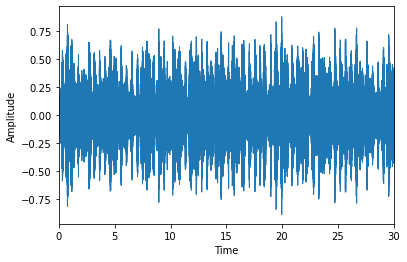

In [ ]:
librosa.display.waveplot(signal, sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

### Frequency Domain (Fast Fourier Transform)

In [ ]:
fft = np.fft.fft(signal)

magnitude = np.abs(fft) # indication of contribution of each frequency to the overall sound
frequency = np.linspace(0, sr, len(magnitude)) #gives a number of evenly spaced numbers in an interval. 
# Frequency interval is here 0 HZ and sample rate. Number of evenly paced values we want which is the length of magnitude


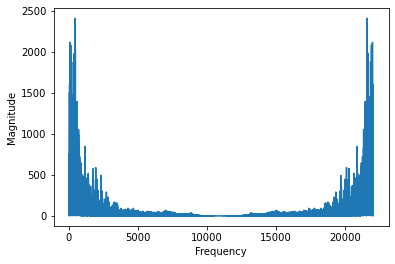

In [ ]:
plt.plot(frequency, magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

### Interpretation
The first half of this is what brings us the novelty, the second half is the same information with the first half. Let's handle it by dividing it by two. 

In [ ]:
left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]

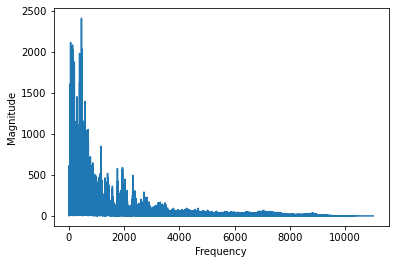

In [ ]:
plt.plot(left_frequency, left_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

In [ ]:
#@title
#number of samples per fft  (number of samples, window we're considering for performing a single fft)
n_fft = 2048
#amount we're shifting each fourier transform to the right. When we doSTFT we slide an interval, 
#each interval we calculate a fft and hop_length will tell us how much we're shifting
hop_length = 512


In [ ]:
#@title
stft = librosa.core.stft(signal, hop_length = hop_length, n_fft = n_fft)
spectogram = np.abs(stft)

In [ ]:
#@title
log_spectogram = librosa.amplitude_to_db(spectogram)

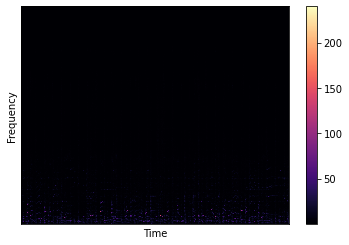

In [ ]:
#@title
librosa.display.specshow(spectogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

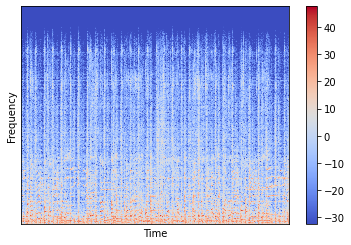

In [ ]:
#@title
librosa.display.specshow(log_spectogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

### MFFCs (Mel Frequency Cepstral Coefficients)

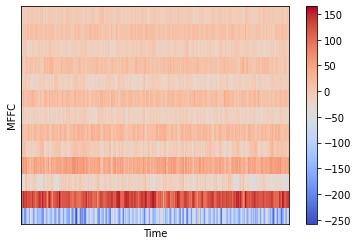

In [ ]:
MFFCs = librosa.feature.mfcc(signal, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
librosa.display.specshow(MFFCs, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFFC")
plt.colorbar()
plt.show()

In [ ]:
# TESTING

# file_path = '/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/Data/genres_original_copy/blues/blues.00000.wav'

# data = {
#         "mapping": [],
#         "mfcc": [],
#         "labels": []
#     }

# num_samples_per_segment = int(SAMPLES_PER_TRACK / num_segments) # 22050 * 30 / 10  
# num_mfcc = 13
# expected_num_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment/hop_length) # # (22050 * 30) / (10 * 512 )


# signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)
# num_segments = 1

# # process segments extracting mfcc and storing data 
# for s in range(num_segments):
#     start_sample = num_samples_per_segment * s #s=0 -> 0
#     finish_sample = start_sample + num_samples_per_segment #s=0 -> num_samples_per_segment

#     mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample], sr, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)

#     mfcc = mfcc.T

#     # store mfcc for segment if it has the expected length 
#     if len(mfcc) == expected_num_mfcc_vectors_per_segment:
#         data["mfcc"].append(mfcc.tolist())
#         data["labels"].append(0)
#         print("{}, segment:{}".format(file_path, s+1))
        

        
# JSON_PATH = "data3.json"
# with open(JSON_PATH, "w") as fp:
#         json.dump(data,fp, indent=4)


In [ ]:
if __name__ == "__main__":
    save_as_mfcc(TH_DATASET_PATH, JSON_PATH, num_segments=30)

NameError: ignored

In [ ]:
def plot_accuracy(history):
    fig, ax = plt.subplots()

    # create accuracy sublpot
    ax.plot(history.history["accuracy"], label="train accuracy")
    ax.plot(history.history["val_accuracy"], label="test accuracy")
    ax.set_ylabel("Accuracy")
    ax.legend(loc="lower right")
    ax.set_title("Accuracy eval")

    plt.show()



In [ ]:
def plot_loss(history):
    fig, ax = plt.subplots()
    
    # create error sublpot
    ax.plot(history.history["loss"], label="train error")
    ax.plot(history.history["val_loss"], label="test error")
    ax.set_ylabel("Error")
    ax.set_xlabel("Epoch")
    ax.legend(loc="upper right")
    ax.set_title("Error eval")

    plt.show()

# Music Genre Multi-classification with Neural Network 
The steps are as the followings: 
- Load the data 
- Split the data into train, validation and test sets 
- Building neural network 
- Compiling 
- Training 
- Testing

In [ ]:
print(JSON_PATH)

/mfcc_200_songs_15.json


### Load Data

In [ ]:
with open(JSON_PATH, "r") as fp:
    data = json.load(fp)
    print(data)

inputs = np.array(data["mfcc"])
targets = np.array(data["labels"])

{'mapping': [], 'mfcc': [], 'labels': []}


### Splitting Data to train and test

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(inputs, targets, test_size=0.2)

### Building NN

In [ ]:
# inputs is 3D: index, intervals and MFCC values, therefore, inputs[1] - intervals , inputps[2] - values of MFCCs

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (inputs.shape[1], inputs.shape[2])),
    
    #1st hidden layer 
#     keras.layers.Dense(512, activation = "relu",  name="layer1"), 
    
    #2nd hidden layer 
    keras.layers.Dense(256, activation = "relu",  name="layer2"), 
    
    #3nd hidden layer 
    keras.layers.Dense(64, activation = "relu",  name="layer3"), 
    
    #output layer 
    keras.layers.Dense(10, activation = "softmax",  name="outputlayer") # labels. (Softmax is for multiclasss, sigmoid for binary classification)
])


### Compiling 

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.0002)
model.compile(optimizer=optimizer, 
              loss = "sparse_categorical_crossentropy", 
              metrics = ["accuracy"]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1690)              0         
                                                                 
 layer2 (Dense)              (None, 256)               432896    
                                                                 
 layer3 (Dense)              (None, 64)                16448     
                                                                 
 outputlayer (Dense)         (None, 10)                650       
                                                                 
Total params: 449,994
Trainable params: 449,994
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#@title
print(len(model.layers)) 

4


### Train network

In [ ]:
history = model.fit(X_train, y_train, 
          validation_data=(X_test, y_test), 
          epochs=150, 
          batch_size=32)

Epoch 1/150
250/250 [==============================] - 2s 6ms/step - loss: 0.1625 - accuracy: 0.9479 - val_loss: 2.4306 - val_accuracy: 0.6041
Epoch 2/150
250/250 [==============================] - 2s 6ms/step - loss: 0.0481 - accuracy: 0.9849 - val_loss: 2.4495 - val_accuracy: 0.6311
Epoch 3/150
250/250 [==============================] - 2s 6ms/step - loss: 0.0189 - accuracy: 0.9955 - val_loss: 2.4479 - val_accuracy: 0.6301
Epoch 4/150
250/250 [==============================] - 2s 7ms/step - loss: 0.0572 - accuracy: 0.9813 - val_loss: 2.5878 - val_accuracy: 0.6251
Epoch 5/150
250/250 [==============================] - 2s 6ms/step - loss: 0.1655 - accuracy: 0.9532 - val_loss: 3.2136 - val_accuracy: 0.5490
Epoch 6/150
250/250 [==============================] - 2s 6ms/step - loss: 0.3015 - accuracy: 0.9134 - val_loss: 2.7126 - val_accuracy: 0.6071
Epoch 7/150
250/250 [==============================] - 2s 6ms/step - loss: 0.1085 - accuracy: 0.9654 - val_loss: 2.5486 - val_accuracy: 0.6261

In [ ]:
history = model.fit(X_train, y_train, 
          validation_data=(X_test, y_test), 
          epochs=50, 
          batch_size=32)

Epoch 1/50
250/250 [==============================] - 1s 4ms/step - loss: 8.6046 - accuracy: 0.3023 - val_loss: 2.5140 - val_accuracy: 0.2012
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 2.2080 - accuracy: 0.2146 - val_loss: 2.2395 - val_accuracy: 0.2262
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 2.0113 - accuracy: 0.2964 - val_loss: 2.1357 - val_accuracy: 0.2628
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1.9261 - accuracy: 0.3259 - val_loss: 2.1343 - val_accuracy: 0.3073
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1.8369 - accuracy: 0.3629 - val_loss: 2.0723 - val_accuracy: 0.3238
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1.7660 - accuracy: 0.3837 - val_loss: 2.0994 - val_accuracy: 0.3664
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1.7436 - accuracy: 0.3956 - val_loss: 2.0384 - val_accuracy: 0.3323
Epoch 

### Overfitting... 

### Plotting

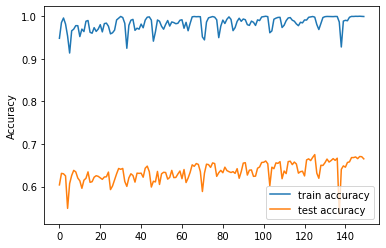

In [ ]:
plt.plot(history.history["accuracy"], label="train accuracy")
plt.plot(history.history["val_accuracy"], label="test accuracy")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")    
plt.show()

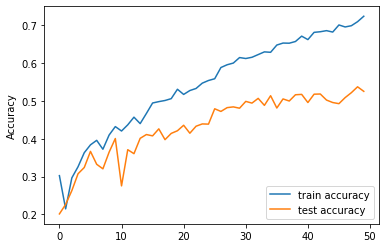

In [ ]:
plt.plot(history.history["accuracy"], label="train accuracy")
plt.plot(history.history["val_accuracy"], label="test accuracy")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")    
plt.show()

# Convolutional Neural Network

In [ ]:
len(inputs)

10986

In [ ]:
inputs.shape

(10986, 130, 13)

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(inputs, targets, test_size=0.3)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

NameError: ignored

In [ ]:
print(X_train[0][0][0])

-100.62495422363281


In [ ]:

X_train.shape

(7690, 130, 13)

In [ ]:

# add an axis to input sets
X_train = X_train[..., np.newaxis]
X_val = X_val[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [ ]:
input_shape = (X_train.shape[1], X_train.shape[2], 1) ##

In [ ]:
print(input_shape)

In [ ]:
model_cnn = keras.Sequential()

# st conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 2nd conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 3rd conv layer
model_cnn.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# flatten output and feed it into dense layer
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(64, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.3))

# output layer
model_cnn.add(keras.layers.Dense(10, activation='softmax'))


In [ ]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_cnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 11, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 6, 32)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 6, 32)        128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 4, 32)         9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 2, 32)        0         
 2D)                                                             
                                                        

In [ ]:

history = model_cnn.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=60)

Epoch 1/60
219/219 [==============================] - 6s 25ms/step - loss: 2.4765 - accuracy: 0.2040 - val_loss: 1.8575 - val_accuracy: 0.3478
Epoch 2/60
219/219 [==============================] - 5s 24ms/step - loss: 1.8900 - accuracy: 0.3396 - val_loss: 1.5646 - val_accuracy: 0.4393
Epoch 3/60
219/219 [==============================] - 6s 25ms/step - loss: 1.6830 - accuracy: 0.3980 - val_loss: 1.4116 - val_accuracy: 0.5000
Epoch 4/60
219/219 [==============================] - 6s 25ms/step - loss: 1.5376 - accuracy: 0.4471 - val_loss: 1.3183 - val_accuracy: 0.5227
Epoch 5/60
219/219 [==============================] - 6s 28ms/step - loss: 1.4579 - accuracy: 0.4811 - val_loss: 1.2506 - val_accuracy: 0.5607
Epoch 6/60
219/219 [==============================] - 6s 25ms/step - loss: 1.3749 - accuracy: 0.5166 - val_loss: 1.1805 - val_accuracy: 0.5888
Epoch 7/60
219/219 [==============================] - 6s 26ms/step - loss: 1.3088 - accuracy: 0.5441 - val_loss: 1.1303 - val_accuracy: 0.5948

In [ ]:
# evaluate model on test set
test_loss, test_acc = model_cnn.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

47/47 - 0s - loss: 0.7499 - accuracy: 0.7583 - 316ms/epoch - 7ms/step

Test accuracy: 0.7583444714546204


In [ ]:
len(X_test)

1498

In [ ]:
# pick a sample to predict from the test set
X_to_predict = X_test[100]
y_to_predict = y_test[100]

In [ ]:
X_to_predict.shape

(130, 13, 1)

In [ ]:
X_to_predict = X_to_predict[np.newaxis, ...] # array shape (1, 130, 13, 1)

In [ ]:

# perform prediction
# print(X_to_predict)
prediction = model_cnn.predict(X_to_predict)
# print(prediction)
# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Target: {}, Predicted label: {}".format(y_to_predict, predicted_index))

Target: 5, Predicted label: [5]


### Plot accuracy/error for training and validation

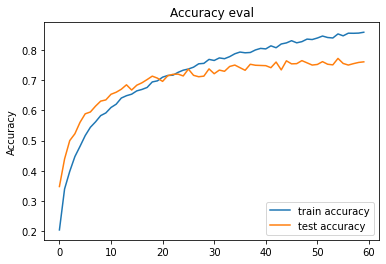

In [ ]:
plot_accuracy(history)

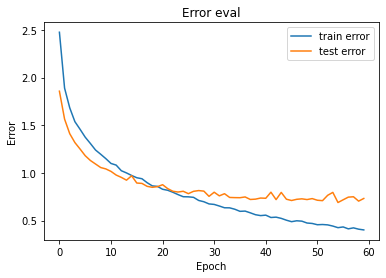

In [ ]:
#@title
plot_loss(history)

## Preparation of mugam data

In [ ]:
# Specify the path of newly added songs and where to store them as .wav
new_songs_path = "/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/Data/mugam_original"
wav_songs_path = "/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/Data/genres+mugam/mugam"

In [ ]:
# Find those song files
onlyfiles = [f for f in listdir(new_songs_path) if isfile(join(new_songs_path, f))]

In [ ]:
print(onlyfiles)

['10.MAHUR.mp3', '2.HEYRATI.mp3', '14.DASHDI.mp3', '3.QATAR.mp3', '7.SHUSHTAR TASNIFI.mp3', '2.CAHARGAH.mp3', '3.TASNIF MENDE YOXDUR.mp3', '4.TASNIF SHUSHA.mp3', '2.RAHAB 2.mp3', '9.DURUN GEDAK.mp3', '4.HUMAYUN.mp3', '4.ARAQ-PANJIGAH.mp3', '3.MIRZA HUSEYN SEGAHI.mp3', '2.BAYATI-SHIRAZ 2.mp3', '11.SEGAH.mp3', '.DS_Store', '3.BAYATI-SHIRAZ 2.mp3', '7.ARAQ TASNIFI.mp3', '3.MANSURIYYA.mp3', '5.OSMANLI TASNIFI.mp3', '3.ARAQ.mp3', '1.BAYATI-SHIRAZ 3.mp3', '2.BAYATI.mp3', '2.CAHARGAH 2.mp3', '1.ZABUL-SEGAH.mp3', 'VILAYATI-DILKASH.mp3', '4.MANSURIYYA.mp3', '12.MAHUR-HINDI-2.mp3', '2.MIRZA HUSEYN SEGAHI 2.mp3', '9.MAHUR-HINDI.mp3', '1.BAYATI-SHIRAZ 2.mp3', '2.RAHAB.mp3', '7.BUDAQ SARI.mp3', '2.BAYATI-KURD.mp3', '11.BAYATI-SHIRAZ.mp3', '3.BAYATI-ACAM.mp3', '15.YERI, DAM USTA YERI.mp3', '5.MAYE-SHUR.mp3', '4.SEGAH.mp3', '1.SEGAH-ZABUL.mp3', '2.RAST 3.mp3', '13.ZAMINXARA.mp3', '1.CHOBAN-BAYATI.mp3', '4.TASNIF MENDEN OLDU.mp3', '3.SHUR TASNIFI 2.mp3', '2.RAST 2.mp3', '3.SHUSHTAR.mp3', '9.KEREMI.mp3

In [ ]:
numb = 0
audio_length = 30 * 1000 # in milliseconds, 30 seconds
for f in onlyfiles: 
    filename = os.fsdecode(f)
    if filename.endswith(".mp3"):
        xpath = os.path.join(new_songs_path,filename)
        print(xpath)
        new  = os.path.join(os.path.join(wav_songs_path),"mugam."+ str(numb).zfill(5) + ".wav" )
        audSeg = AudioSegment.from_mp3(xpath)
        audSeg = audSeg[0:audio_length]
        audSeg = audSeg.set_frame_rate(22050)
        audSeg.export(new, format="wav")
        numb = numb +  1

/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/Data/mugam_original/10.MAHUR.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/Data/mugam_original/2.HEYRATI.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/Data/mugam_original/14.DASHDI.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/Data/mugam_original/3.QATAR.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/Data/mugam_original/7.SHUSHTAR TASNIFI.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/Data/mugam_original/2.CAHARGAH.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/Data/mugam_original/3.TASNIF MENDE YOXDUR.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classi

## Writing MFCC to json with genre mugam

In [ ]:
NEW_DATASET_PATH = "./Data/genres+mugam"
NEW_JSON_PATH = "new_data.json"
onesegment_NEW_JSON_PATH = "onesegment_new_data.json"
SAMPLE_RATE = 22050
DURATION = 30 #in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE*DURATION #22050*30

In [ ]:
save_mfcc(NEW_DATASET_PATH, NEJSON_PATH, num_segments=10)

130

Processing pop
pop.00027.wav
./Data/genres+mugam/pop/pop.00027.wav, segment:1
./Data/genres+mugam/pop/pop.00027.wav, segment:2
./Data/genres+mugam/pop/pop.00027.wav, segment:3
./Data/genres+mugam/pop/pop.00027.wav, segment:4
./Data/genres+mugam/pop/pop.00027.wav, segment:5
./Data/genres+mugam/pop/pop.00027.wav, segment:6
./Data/genres+mugam/pop/pop.00027.wav, segment:7
./Data/genres+mugam/pop/pop.00027.wav, segment:8
./Data/genres+mugam/pop/pop.00027.wav, segment:9
./Data/genres+mugam/pop/pop.00027.wav, segment:10
pop.00033.wav
./Data/genres+mugam/pop/pop.00033.wav, segment:1
./Data/genres+mugam/pop/pop.00033.wav, segment:2
./Data/genres+mugam/pop/pop.00033.wav, segment:3
./Data/genres+mugam/pop/pop.00033.wav, segment:4
./Data/genres+mugam/pop/pop.00033.wav, segment:5
./Data/genres+mugam/pop/pop.00033.wav, segment:6
./Data/genres+mugam/pop/pop.00033.wav, segment:7
./Data/genres+mugam/pop/pop.00033.wav, segment:8
./Data/genres+mugam/pop/pop.00033.wav, segment:9
./Data/genres+mugam/

## CNN with Mugam data

In [ ]:
save_mfcc(DATASET_PATH, onesegment_NEW_JSON_PATH, num_segments=1)

1292

Processing pop
pop.00027.wav
./Data/genres_original/pop/pop.00027.wav, segment:1
pop.00033.wav
./Data/genres_original/pop/pop.00033.wav, segment:1
pop.00032.wav
./Data/genres_original/pop/pop.00032.wav, segment:1
pop.00026.wav
./Data/genres_original/pop/pop.00026.wav, segment:1
pop.00030.wav
./Data/genres_original/pop/pop.00030.wav, segment:1
pop.00024.wav
./Data/genres_original/pop/pop.00024.wav, segment:1
pop.00018.wav
./Data/genres_original/pop/pop.00018.wav, segment:1
pop.00019.wav
./Data/genres_original/pop/pop.00019.wav, segment:1
pop.00025.wav
./Data/genres_original/pop/pop.00025.wav, segment:1
pop.00031.wav
./Data/genres_original/pop/pop.00031.wav, segment:1
pop.00009.wav
./Data/genres_original/pop/pop.00009.wav, segment:1
pop.00035.wav
./Data/genres_original/pop/pop.00035.wav, segment:1
pop.00021.wav
./Data/genres_original/pop/pop.00021.wav, segment:1
pop.00020.wav
./Data/genres_original/pop/pop.00020.wav, segment:1
pop.00034.wav
./Data/genres_original/pop/pop.00034.wav,

In [ ]:
NEW_DATASET_PATH = "./Data/genres+mugam"
NEW_JSON_PATH = "new_data.json"

In [ ]:
with open(NEW_JSON_PATH, "r") as fp:
    new_data = json.load(fp)

In [ ]:
new_inputs = np.array(new_data["mfcc"])
new_targets = np.array(new_data["labels"])

In [ ]:
len(new_targets)

In [ ]:
new_inputs.shape

(10986, 130, 13)

In [ ]:
len(new_inputs)

10986

In [ ]:
new_X_train, new_X_test, new_y_train, new_y_test =  train_test_split(new_inputs, new_targets, test_size=0.3)
new_X_test, new_X_val, new_y_test, new_y_val = train_test_split(new_X_test, new_y_test, test_size=0.5)

In [ ]:
# add an axis to input sets
new_X_train = new_X_train[..., np.newaxis]
new_X_val = new_X_val[..., np.newaxis]
new_X_test = new_X_test[..., np.newaxis]

In [ ]:
new_input_shape = (new_X_train.shape[1], new_X_train.shape[2], 1) ##

In [ ]:
new_model_cnn_2 = keras.Sequential()

# st conv layer
new_model_cnn_2.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=new_input_shape))
new_model_cnn_2.add(keras.layers.MaxPooling2D((2, 2), strides=(1, 1), padding='same'))
new_model_cnn_2.add(keras.layers.BatchNormalization())

# 2nd conv layer
new_model_cnn_2.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
new_model_cnn_2.add(keras.layers.MaxPooling2D((2, 2), strides=(1, 1), padding='same'))
new_model_cnn_2.add(keras.layers.BatchNormalization())

# flatten output and feed it into dense layer
new_model_cnn_2.add(keras.layers.Flatten())
new_model_cnn_2.add(keras.layers.Dense(64, activation='relu'))
new_model_cnn_2.add(keras.layers.Dropout(0.3))

# output layer
new_model_cnn_2.add(keras.layers.Dense(11, activation='softmax'))

NameError: name 'new_input_shape' is not defined

In [ ]:
new_model_cnn = keras.Sequential()

# st conv layer
new_model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=new_input_shape))
new_model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
new_model_cnn.add(keras.layers.BatchNormalization())

# 2nd conv layer
new_model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
new_model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
new_model_cnn.add(keras.layers.BatchNormalization())

# 3rd conv layer
new_model_cnn.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
new_model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
new_model_cnn.add(keras.layers.BatchNormalization())

# flatten output and feed it into dense layer
new_model_cnn.add(keras.layers.Flatten())
new_model_cnn.add(keras.layers.Dense(64, activation='relu'))
new_model_cnn.add(keras.layers.Dropout(0.3))

# output layer
new_model_cnn.add(keras.layers.Dense(11, activation='softmax'))


In [ ]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
new_model_cnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

new_model_cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 128, 11, 32)       320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 64, 6, 32)        0         
 2D)                                                             
                                                                 
 batch_normalization_9 (Batc  (None, 64, 6, 32)        128       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 62, 4, 32)         9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 31, 2, 32)        0         
 g2D)                                                            
                                                      

In [ ]:
new_history = new_model_cnn.fit(new_X_train, new_y_train, validation_data=(new_X_val, new_y_val), batch_size=32, epochs=60)

Epoch 1/60
241/241 [==============================] - 7s 26ms/step - loss: 2.2213 - accuracy: 0.2823 - val_loss: 1.6576 - val_accuracy: 0.4205
Epoch 2/60
241/241 [==============================] - 6s 25ms/step - loss: 1.6887 - accuracy: 0.4098 - val_loss: 1.4138 - val_accuracy: 0.4812
Epoch 3/60
241/241 [==============================] - 6s 26ms/step - loss: 1.5106 - accuracy: 0.4707 - val_loss: 1.2683 - val_accuracy: 0.5309
Epoch 4/60
241/241 [==============================] - 6s 25ms/step - loss: 1.3867 - accuracy: 0.5055 - val_loss: 1.2025 - val_accuracy: 0.5546
Epoch 5/60
241/241 [==============================] - 6s 26ms/step - loss: 1.3051 - accuracy: 0.5372 - val_loss: 1.1467 - val_accuracy: 0.5837
Epoch 6/60
241/241 [==============================] - 6s 26ms/step - loss: 1.2472 - accuracy: 0.5562 - val_loss: 1.0900 - val_accuracy: 0.5989
Epoch 7/60
241/241 [==============================] - 7s 29ms/step - loss: 1.1976 - accuracy: 0.5722 - val_loss: 1.0554 - val_accuracy: 0.6123

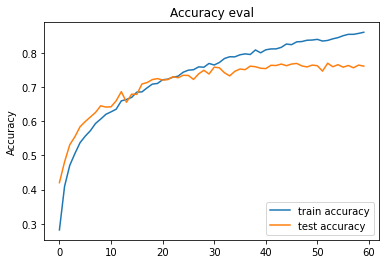

In [ ]:
plot_accuracy(new_history)

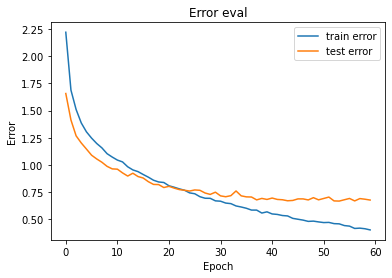

In [ ]:
plot_loss(new_history)

In [ ]:
# evaluate model on test set
new_test_loss, new_test_acc = new_model_cnn.evaluate(new_X_test, new_y_test, verbose=2)
print('\nTest accuracy:', new_test_acc)

52/52 - 0s - loss: 0.6661 - accuracy: 0.7834 - 298ms/epoch - 6ms/step

Test accuracy: 0.7833737730979919


In [ ]:
# pick a sample to predict from the test set
new_X_to_predict = new_X_test[100]
new_y_to_predict = new_y_test[100]

In [ ]:
new_X_to_predict.shape

(130, 13, 1)

In [ ]:
new_X_to_predict = new_X_to_predict[np.newaxis, ...] # array shape (1, 130, 13, 1)

In [ ]:
# perform prediction
# print(X_to_predict)
new_prediction = new_model_cnn.predict(new_X_to_predict)
# print(prediction)
# get index with max value
new_predicted_index = np.argmax(new_prediction, axis=1)

print("Target: {}, Predicted label: {}".format(new_y_to_predict, new_predicted_index))

Target: 10, Predicted label: [3]


## CNN with 1 segment size 

In [ ]:
onesegment_NEW_JSON_PATH = "onesegment_new_data.json"

In [ ]:
with open(onesegment_NEW_JSON_PATH, "r") as fp:
    seg1_new_data = json.load(fp) 

In [ ]:
seg1_inputs = np.array(seg1_new_data["mfcc"])
seg1_targets = np.array(seg1_new_data["labels"])

seg1_inputs.shape

(1098, 1292, 13)

In [ ]:
seg1_X_train, seg1_X_test, seg1_y_train, seg1_y_test =  train_test_split(seg1_inputs, seg1_targets, test_size=0.3)
seg1_X_test, seg1_X_val, seg1_y_test, seg1_y_val = train_test_split(seg1_X_test, seg1_y_test, test_size=0.5)

In [ ]:
seg1_X_train = seg1_X_train[..., np.newaxis]
seg1_X_val = seg1_X_val[..., np.newaxis]
seg1_X_test = seg1_X_test[..., np.newaxis]

In [ ]:
seg1_inputs_shape = (seg1_X_train.shape[1], seg1_X_train.shape[2], 1) ##

In [ ]:
seg1_model_cnn = keras.Sequential()

In [ ]:
# st conv layer
seg1_model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=seg1_inputs_shape))
seg1_model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
seg1_model_cnn.add(keras.layers.BatchNormalization())

# 2nd conv layer
seg1_model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
seg1_model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
seg1_model_cnn.add(keras.layers.BatchNormalization())

# 3rd conv layer
seg1_model_cnn.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
seg1_model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
seg1_model_cnn.add(keras.layers.BatchNormalization())

# flatten output and feed it into dense layer
seg1_model_cnn.add(keras.layers.Flatten())
seg1_model_cnn.add(keras.layers.Dense(64, activation='relu'))
seg1_model_cnn.add(keras.layers.Dropout(0.3))

# output layer
seg1_model_cnn.add(keras.layers.Dense(11, activation='softmax'))


In [ ]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
seg1_model_cnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

seg1_model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1290, 11, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 645, 6, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 645, 6, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 643, 4, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 322, 2, 32)       0         
 2D)                                                             
                                                      

In [ ]:
segone_history = seg1_model_cnn.fit(seg1_X_train, seg1_y_train, validation_data=(seg1_X_val, seg1_y_val), batch_size=32, epochs=60)

Epoch 1/60
24/24 [==============================] - 6s 221ms/step - loss: 2.7872 - accuracy: 0.1966 - val_loss: 4.1844 - val_accuracy: 0.1455
Epoch 2/60
24/24 [==============================] - 5s 211ms/step - loss: 1.9329 - accuracy: 0.3776 - val_loss: 3.4893 - val_accuracy: 0.1515
Epoch 3/60
24/24 [==============================] - 5s 214ms/step - loss: 1.5863 - accuracy: 0.4531 - val_loss: 2.9237 - val_accuracy: 0.2061
Epoch 4/60
24/24 [==============================] - 5s 211ms/step - loss: 1.3264 - accuracy: 0.5560 - val_loss: 2.5489 - val_accuracy: 0.2545
Epoch 5/60
24/24 [==============================] - 5s 211ms/step - loss: 1.1140 - accuracy: 0.6354 - val_loss: 2.1938 - val_accuracy: 0.3091
Epoch 6/60
24/24 [==============================] - 5s 211ms/step - loss: 0.9892 - accuracy: 0.6784 - val_loss: 1.9616 - val_accuracy: 0.3576
Epoch 7/60
24/24 [==============================] - 5s 213ms/step - loss: 0.8816 - accuracy: 0.6914 - val_loss: 1.8218 - val_accuracy: 0.3939
Epoch 

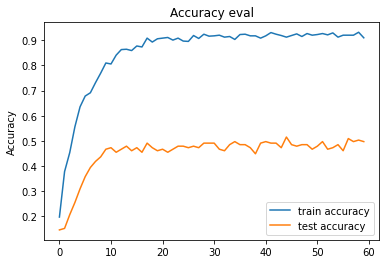

In [ ]:
plot_accuracy(segone_history)

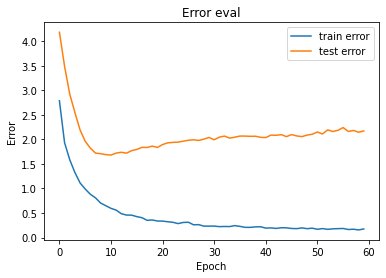

In [ ]:
plot_loss(segone_history)

In [ ]:
# evaluate model on test set
seg1_test_loss, seg1_test_acc = seg1_model_cnn.evaluate(seg1_X_test, seg1_y_test, verbose=2)
print('\nTest accuracy:', seg1_test_acc)

6/6 - 0s - loss: 2.0282 - accuracy: 0.4909 - 301ms/epoch - 50ms/step

Test accuracy: 0.4909090995788574


In [ ]:
# pick a sample to predict from the test set
seg1_X_to_predict = seg1_X_test[100]
seg1_y_to_predict = seg1_y_test[100]

In [ ]:
seg1_X_to_predict.shape

(1292, 13, 1)

In [ ]:
seg1_X_to_predict = seg1_X_to_predict[np.newaxis, ...] # array shape (1, 130, 13, 1)

In [ ]:
# perform prediction
# print(X_to_predict)
seg1_prediction = seg1_model_cnn.predict(seg1_X_to_predict)
# print(prediction)
# get index with max value
seg1_predicted_index = np.argmax(seg1_prediction, axis=1)

print("Target: {}, Predicted label: {}".format(seg1_y_to_predict, seg1_predicted_index))

Target: 4, Predicted label: [4]


## RNN-LSTM 

In [ ]:
lstm_model = keras.Sequential()

In [ ]:
smaller_lstm_model = keras.Sequential()

In [ ]:
lstm_input_shape = (new_X_train.shape[1], new_X_train.shape[2]) ##

In [ ]:
lstm_model.add(keras.layers.LSTM(64, input_shape=lstm_input_shape, return_sequences=True))
lstm_model.add(keras.layers.LSTM(64))

# dense layer
lstm_model.add(keras.layers.Dense(64, activation='relu'))
lstm_model.add(keras.layers.Dropout(0.3))

# output layer
lstm_model.add(keras.layers.Dense(11, activation='softmax'))

In [ ]:
smaller_lstm_model.add(keras.layers.LSTM(32, input_shape=lstm_input_shape, return_sequences=True))
smaller_lstm_model.add(keras.layers.LSTM(32))

# dense layer
smaller_lstm_model.add(keras.layers.Dense(32, activation='relu'))
lstm_model.add(keras.layers.Dropout(0.3))

# output layer
smaller_lstm_model.add(keras.layers.Dense(11, activation='softmax'))

In [ ]:
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
lstm_model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

lstm_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 130, 64)           19968     
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 11)                715       
                                                                 
Total params: 57,867
Trainable params: 57,867
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
smaller_lstm_model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

smaller_lstm_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 130, 32)           5888      
                                                                 
 lstm_7 (LSTM)               (None, 32)                8320      
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 11)                363       
                                                                 
Total params: 15,627
Trainable params: 15,627
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstm_history = lstm_model.fit(new_X_train, new_y_train, validation_data=(new_X_val, new_y_val), batch_size=32, epochs=60)

Epoch 1/60
241/241 [==============================] - 17s 63ms/step - loss: 2.2739 - accuracy: 0.2168 - val_loss: 2.0864 - val_accuracy: 0.2888
Epoch 2/60
241/241 [==============================] - 15s 62ms/step - loss: 1.8933 - accuracy: 0.3645 - val_loss: 1.7380 - val_accuracy: 0.4193
Epoch 3/60
241/241 [==============================] - 15s 61ms/step - loss: 1.6637 - accuracy: 0.4324 - val_loss: 1.5891 - val_accuracy: 0.4478
Epoch 4/60
241/241 [==============================] - 15s 61ms/step - loss: 1.5491 - accuracy: 0.4586 - val_loss: 1.5173 - val_accuracy: 0.4600
Epoch 5/60
241/241 [==============================] - 15s 61ms/step - loss: 1.4747 - accuracy: 0.4880 - val_loss: 1.4396 - val_accuracy: 0.5097
Epoch 6/60
241/241 [==============================] - 15s 62ms/step - loss: 1.4081 - accuracy: 0.5109 - val_loss: 1.4057 - val_accuracy: 0.5261
Epoch 7/60
241/241 [==============================] - 15s 61ms/step - loss: 1.3487 - accuracy: 0.5268 - val_loss: 1.3779 - val_accuracy:

In [ ]:
v2_lstm_history = lstm_model.fit(new_X_train, new_y_train, validation_data=(new_X_val, new_y_val), batch_size=32, epochs=150)

Epoch 1/150
241/241 [==============================] - 14s 60ms/step - loss: 0.6031 - accuracy: 0.8101 - val_loss: 1.0260 - val_accuracy: 0.6845
Epoch 2/150
241/241 [==============================] - 15s 60ms/step - loss: 0.6007 - accuracy: 0.8092 - val_loss: 1.0459 - val_accuracy: 0.6851
Epoch 3/150
241/241 [==============================] - 15s 61ms/step - loss: 0.5754 - accuracy: 0.8192 - val_loss: 1.0217 - val_accuracy: 0.6948
Epoch 4/150
241/241 [==============================] - 15s 61ms/step - loss: 0.5753 - accuracy: 0.8199 - val_loss: 1.0443 - val_accuracy: 0.6814
Epoch 5/150
241/241 [==============================] - 15s 62ms/step - loss: 0.5687 - accuracy: 0.8216 - val_loss: 1.0435 - val_accuracy: 0.6778
Epoch 6/150
241/241 [==============================] - 15s 62ms/step - loss: 0.5581 - accuracy: 0.8268 - val_loss: 1.0548 - val_accuracy: 0.6863
Epoch 7/150
241/241 [==============================] - 15s 61ms/step - loss: 0.5571 - accuracy: 0.8213 - val_loss: 1.0481 - val_ac

In [ ]:
smaller_lstm_history = smaller_lstm_model.fit(new_X_train, new_y_train, validation_data=(new_X_val, new_y_val), batch_size=32, epochs=75)

Epoch 1/75
241/241 [==============================] - 16s 56ms/step - loss: 2.3403 - accuracy: 0.2038 - val_loss: 2.2802 - val_accuracy: 0.2458
Epoch 2/75
241/241 [==============================] - 13s 53ms/step - loss: 2.1503 - accuracy: 0.2757 - val_loss: 2.0523 - val_accuracy: 0.2992
Epoch 3/75
241/241 [==============================] - 13s 54ms/step - loss: 1.9249 - accuracy: 0.3446 - val_loss: 1.8831 - val_accuracy: 0.3550
Epoch 4/75
241/241 [==============================] - 13s 54ms/step - loss: 1.7802 - accuracy: 0.3852 - val_loss: 1.7600 - val_accuracy: 0.3956
Epoch 5/75
241/241 [==============================] - 13s 54ms/step - loss: 1.6734 - accuracy: 0.4205 - val_loss: 1.6791 - val_accuracy: 0.4053
Epoch 6/75
241/241 [==============================] - 13s 56ms/step - loss: 1.6022 - accuracy: 0.4333 - val_loss: 1.6136 - val_accuracy: 0.4333
Epoch 7/75
241/241 [==============================] - 13s 54ms/step - loss: 1.5462 - accuracy: 0.4467 - val_loss: 1.5631 - val_accuracy:

In [ ]:
smaller_lstm_history = smaller_lstm_model.fit(new_X_train, new_y_train, validation_data=(new_X_val, new_y_val), batch_size=32, epochs=75)

Epoch 1/75
241/241 [==============================] - 13s 53ms/step - loss: 0.9958 - accuracy: 0.6450 - val_loss: 1.2649 - val_accuracy: 0.5528
Epoch 2/75
241/241 [==============================] - 13s 53ms/step - loss: 0.9873 - accuracy: 0.6503 - val_loss: 1.2770 - val_accuracy: 0.5637
Epoch 3/75
241/241 [==============================] - 13s 54ms/step - loss: 0.9950 - accuracy: 0.6454 - val_loss: 1.2497 - val_accuracy: 0.5674
Epoch 4/75
241/241 [==============================] - 13s 54ms/step - loss: 0.9776 - accuracy: 0.6528 - val_loss: 1.2553 - val_accuracy: 0.5637
Epoch 5/75
241/241 [==============================] - 13s 54ms/step - loss: 0.9739 - accuracy: 0.6527 - val_loss: 1.2544 - val_accuracy: 0.5643
Epoch 6/75
241/241 [==============================] - 13s 54ms/step - loss: 0.9731 - accuracy: 0.6523 - val_loss: 1.2488 - val_accuracy: 0.5765
Epoch 7/75
241/241 [==============================] - 13s 54ms/step - loss: 0.9708 - accuracy: 0.6547 - val_loss: 1.2516 - val_accuracy:

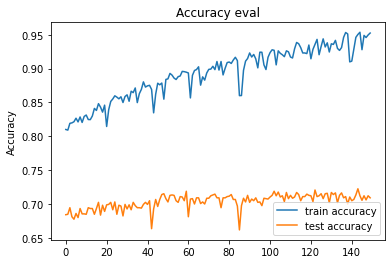

In [ ]:
plot_accuracy(v2_lstm_history)

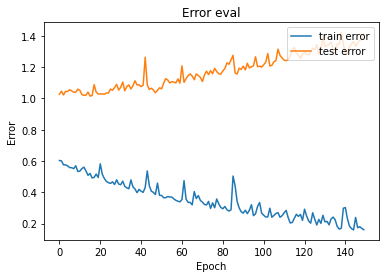

In [ ]:
plot_loss(v2_lstm_history)

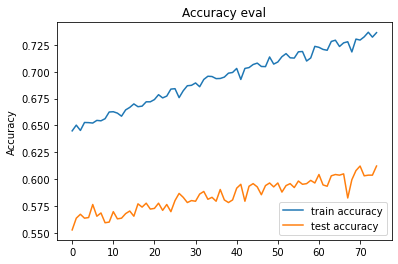

In [ ]:
plot_accuracy(smaller_lstm_history)

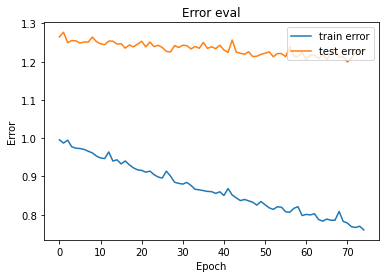

In [ ]:
plot_loss(smaller_lstm_history)

In [ ]:
# evaluate model on test set
lstm_test_loss, lstm_test_acc = lstm_model_cnn.evaluate(new_X_test, new_y_test, verbose=2)
print('\nTest accuracy:', lstm_test_acc)

In [ ]:
# pick a sample to predict from the test set
new_X_to_predict = new_X_test[100]
new_y_to_predict = new_y_test[100]

In [ ]:
new_X_to_predict.shape

In [ ]:
new_X_to_predict = new_X_to_predict[np.newaxis, ...] # array shape (1, 130, 13, 1)

In [ ]:
# perform prediction
# print(X_to_predict)
new_prediction = lstm_model_cnn.predict(new_X_to_predict)
# print(prediction)
# get index with max value
new_predicted_index = np.argmax(new_prediction, axis=1)

print("Target: {}, Predicted label: {}".format(new_y_to_predict, new_predicted_index))

NameError: name 'lstm_model_cnn' is not defined

## Extracting new  music/songs

## Classical

In [ ]:
# Specify the path of newly added songs and where to store them as .wav
read_path_classic = "/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Classical"
write_path_classic = "/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/Updated_data_09.03.2022/classical"

In [ ]:
write_as_wav(read_path_classic, write_path_classic, "classical.")

NameError: ignored

## Rock 

In [ ]:
# Specify the path of newly added songs and where to store them as .wav
read_path_rock = "/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Rock"
write_path_rock = "/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/Updated_data_09.03.2022/rock"

In [ ]:
write_as_wav(read_path_rock, write_path_rock, "rock.")

/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Rock/013. Shinedown - Simple Man.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Rock/060. The Smashing Pumpkins - 1979 (Remastered 2012).mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Rock/034. Theory of a Deadman - Rx (Medicate).mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Rock/015. Red Hot Chili Peppers - Under the Bridge.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Rock/053. Godsmack - Under Your Scars.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Rock/093. Stone Sour - Through Glass.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-

## Blues

In [ ]:
# Specify the path of newly added songs and where to store them as .wav
read_path_blues = "/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Blues"
write_path_blues = "/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/Updated_data_09.03.2022/blues"

In [ ]:
write_as_wav(read_path_blues, write_path_blues, "blues.")

/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Blues/Marvin Gaye - Little Darling I Need You.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Blues/Martha Reeves & The Vandellas - (Love Is Like A) Heat Wave.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Blues/The Four Tops - I Can't Help Myself (Sugar Pie, Honey Bunch).mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Blues/Steve Winwood (Spencer Davis Group) - Gimme Some Lovin'.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Blues/Aretha Franklin - Chain Of Fools.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Blues/Otis Redding - Sittin' On The Dock Of The Bay.m

## Reggae

In [ ]:
# Specify the path of newly added songs and where to store them as .wav
read_path_reggae = "/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Reggae"
write_path_reggae = "/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/Updated_data_09.03.2022/reggae"

In [ ]:
write_as_wav(read_path_reggae, write_path_reggae, "reggae.")

/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Reggae/32. Wear You To The Ball - U-Roy & The Paragons.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Reggae/72. 1865 (96 Degrees In The Shade) - Third World.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Reggae/78. Feel Like Jumping - Marcia Griffiths.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Reggae/97. Electric Boogie - Marcia Griffiths.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Reggae/40. Natty Rebel - U-Roy.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Reggae/57. I'm Still In Love With You - Alton Ellis.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA

## Country

In [ ]:
#@title
# Specify the path of newly added songs and where to store them as .wav
read_path_country = "/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Country"
write_path_country = "/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/Updated_data_09.03.2022/country"

In [ ]:
#@title
write_as_wav(read_path_country, write_path_country, "country.")

/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Country/Jolene.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Country/I'll Fly Away.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Country/I've Got A Tiger By The Tail.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Country/500 Miles Away from Home.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Country/Man in Black.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Country/Mountain Dew.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Country/Golden Ring.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fal

## Disco

In [ ]:
#@title
# Specify the path of newly added songs and where to store them as .wav
read_path_disco = "/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Disco"
write_path_disco = "/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/Updated_data_09.03.2022/disco"

In [ ]:
#@title
write_as_wav(read_path_disco, write_path_disco, "disco.")

/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Disco/Good Times.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Disco/Spank - 12   Version.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Disco/TSOP (The Sound of Philadelphia) - Extended Version.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Disco/You're the One for Me.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Disco/Honey Bee - Extended Version.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Disco/More, More, More.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Disco/Hot Stuff.mp3
/Users/ilyas

## Hiphop

In [ ]:
#@title
# Specify the path of newly added songs and where to store them as .wav
read_path_hiphop = "/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/HipHop"
write_path_hiphop = "/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/Updated_data_09.03.2022/hiphop"

In [ ]:
#@title
write_as_wav(read_path_hiphop, write_path_hiphop, "hiphop.")

/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/HipHop/098 - G Unit - Rider Pt. 2      (™ www.thisis50.com G Unit).MP3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/HipHop/056 - Jazmine Sullivan - Need U Bad     (™ J RMG).MP3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/HipHop/018 - V.I.C. - Get Silly      (™ Young Mogul Warner Bros.).MP3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/HipHop/097 - Colby O'Donis ft.  Akon - What You Got     (™ KonLive Geffen).MP3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/HipHop/033 - Shawty Lo - Foolish   (™  D4L Asylum).MP3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/HipHop/026 - Mar

## Jazz

In [ ]:
#@title
# Specify the path of newly added songs and where to store them as .wav
read_path_jazz = "/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Jazz"
write_path_jazz = "/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/Updated_data_09.03.2022/jazz"

In [ ]:
#@title
write_as_wav(read_path_jazz, write_path_jazz, "jazz.")

/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Jazz/096. The Brecker Brothers - Sneakin' Up Behind You.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Jazz/041. Courtney Pine - Butterfly.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Jazz/089. Pharoah Sanders - Astral Traveling.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Jazz/079. Pat Metheny - All the Things You Are.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Jazz/078. Bud Powell - Bouncin' With Bud.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Jazz/074. Paco de Lucía - Beyond The Mirage.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasK

## Pop

In [ ]:
#@title
# Specify the path of newly added songs and where to store them as .wav
read_path_pop = "/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Pop"
write_path_pop = "/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/Updated_data_09.03.2022/pop"   

In [ ]:
#@title
write_as_wav(read_path_pop, write_path_pop, "pop.")

/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Pop/094 - Blink 182 - All The Small Things.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Pop/076 - Radiohead - Creep.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Pop/082 - Michael Jackson - Rock With You.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Pop/055 - Nsync - Bye Bye Bye.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Pop/057 - The Go-Gos - Our Lips Are Sealed.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Pop/090 - Brandy & Monica - The Boy Is Mine.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_

## Metal

In [ ]:
# Specify the path of newly added songs and where to store them as .wav
read_path_metal = "/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Metal"
write_path_metal = "/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/Updated_data_09.03.2022/metal"

In [ ]:
write_as_wav(read_path_metal, write_path_metal, "metal.")

/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Metal/027. Judas Priest - Living After Midnight.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Metal/095. Dream Theater - Metropolis - Part I_ _The Miracle and the Sleeper_.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Metal/091. Lamb of God - Redneck.mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Metal/062. Iron Maiden - Fear of the Dark (2015 Remaster).mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Metal/051. Black Sabbath - Children of the Grave (2014 Remaster).mp3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/New_100_Songs/Metal/003. Iron Maiden - Hallowed Be Thy Name (199

In [ ]:
TH_DATASET_PATH = "./Updated_data_09.03.2022"
TH_NEW_JSON_PATH = "/content/drive/MyDrive/Music_Genre_Classification/th_data.json"
SAMPLE_RATE = 22050
DURATION = 30 #in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE*DURATION #22050*30

In [ ]:
save_mfcc(TH_DATASET_PATH, TH_NEW_JSON_PATH, num_segments=10)

NameError: ignored

## CNN with 200 new data

In [ ]:
conv1d_data["mfcc"]

[]

In [ ]:
th_inputs.shape

(31446, 87, 13)

CNN with old data

In [ ]:
th_targets.shape

(31446,)

In [ ]:
|th_X_train, th_X_test, th_y_train, th_y_test =  train_test_split(th_inputs, th_targets, test_size=0.2)
# th_X_test, th_X_val, th_y_test, th_y_val = train_test_split(th_X_test, th_y_test, test_size=0.5)

th_X_train.shape

(25156, 87, 13)

In [ ]:
# add an axis to input sets
th_X_train = th_X_train[..., np.newaxis]
# th_X_val = th_X_val[..., np.newaxis]
th_X_test = th_X_test[..., np.newaxis]

In [ ]:
th_input_shape = (th_X_train.shape[1], th_X_train.shape[2], 1) ##

print(th_input_shape)

(87, 13, 1)


In [ ]:
th_model_cnn = keras.Sequential()

# st conv layer
th_model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=th_input_shape))
th_model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2) , padding='same'))
th_model_cnn.add(keras.layers.BatchNormalization())

# 2nd conv layer
th_model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
th_model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
th_model_cnn.add(keras.layers.BatchNormalization())

# 3rd conv layer
th_model_cnn.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
th_model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
th_model_cnn.add(keras.layers.BatchNormalization())

# flatten output and feed it into dense layer
th_model_cnn.add(keras.layers.Flatten())
th_model_cnn.add(keras.layers.Dense(64, activation='relu'))
th_model_cnn.add(keras.layers.Dropout(0.3))

# output layer
th_model_cnn.add(keras.layers.Dense(11, activation='softmax'))

In [ ]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
th_model_cnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

th_model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 85, 11, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 43, 6, 32)        0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 43, 6, 32)        128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 41, 4, 32)         9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 21, 2, 32)        0         
 2D)                                                             
                                                      

In [ ]:
th_history = th_model_cnn.fit(th_X_train, th_y_train, validation_data=(th_X_test, th_y_test), batch_size=32, epochs=60)

Epoch 1/60
787/787 [==============================] - 16s 8ms/step - loss: 2.2364 - accuracy: 0.2577 - val_loss: 1.7663 - val_accuracy: 0.3777
Epoch 2/60
787/787 [==============================] - 5s 7ms/step - loss: 1.8234 - accuracy: 0.3710 - val_loss: 1.5668 - val_accuracy: 0.4569
Epoch 3/60
787/787 [==============================] - 6s 7ms/step - loss: 1.6800 - accuracy: 0.4194 - val_loss: 1.4604 - val_accuracy: 0.5006
Epoch 4/60
787/787 [==============================] - 7s 8ms/step - loss: 1.5862 - accuracy: 0.4516 - val_loss: 1.3912 - val_accuracy: 0.5234
Epoch 5/60
787/787 [==============================] - 6s 8ms/step - loss: 1.5232 - accuracy: 0.4741 - val_loss: 1.3416 - val_accuracy: 0.5391
Epoch 6/60
787/787 [==============================] - 6s 7ms/step - loss: 1.4745 - accuracy: 0.4922 - val_loss: 1.3019 - val_accuracy: 0.5537
Epoch 7/60
787/787 [==============================] - 5s 7ms/step - loss: 1.4345 - accuracy: 0.5062 - val_loss: 1.2725 - val_accuracy: 0.5704
Epoch

In [ ]:
th_history = th_model_cnn.fit(th_X_train, th_y_train, validation_data=(th_X_test, th_y_test), batch_size=32, epochs=30)

Epoch 1/30
787/787 [==============================] - 8s 11ms/step - loss: 0.8483 - accuracy: 0.7112 - val_loss: 0.9944 - val_accuracy: 0.6736
Epoch 2/30
787/787 [==============================] - 6s 7ms/step - loss: 0.8453 - accuracy: 0.7082 - val_loss: 0.9352 - val_accuracy: 0.6852
Epoch 3/30
787/787 [==============================] - 6s 7ms/step - loss: 0.8421 - accuracy: 0.7079 - val_loss: 0.9485 - val_accuracy: 0.6706
Epoch 4/30
787/787 [==============================] - 6s 7ms/step - loss: 0.8338 - accuracy: 0.7099 - val_loss: 0.9374 - val_accuracy: 0.6782
Epoch 5/30
787/787 [==============================] - 6s 7ms/step - loss: 0.8265 - accuracy: 0.7126 - val_loss: 0.9351 - val_accuracy: 0.6819
Epoch 6/30
787/787 [==============================] - 6s 7ms/step - loss: 0.8305 - accuracy: 0.7110 - val_loss: 0.9342 - val_accuracy: 0.6857
Epoch 7/30
787/787 [==============================] - 6s 7ms/step - loss: 0.8162 - accuracy: 0.7167 - val_loss: 0.9616 - val_accuracy: 0.6754
Epoch

In [ ]:
th_history = th_model_cnn.fit(th_X_train, th_y_train, validation_data=(th_X_test, th_y_test), batch_size=32, epochs=30)

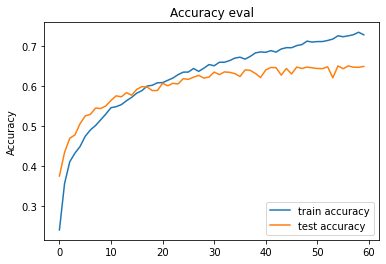

In [ ]:
plot_accuracy(th_history)

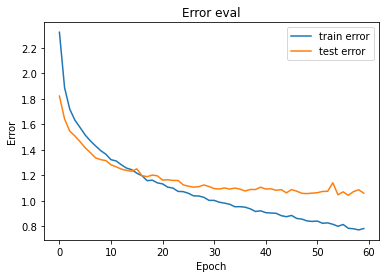

In [ ]:
plot_loss(th_history)

## Continuation

In [ ]:
th_history = th_model_cnn.fit(th_X_train, th_y_train, validation_data=(th_X_val, th_y_val), batch_size=32, epochs=60)

Epoch 1/60
459/459 [==============================] - 11s 24ms/step - loss: 0.7692 - accuracy: 0.7335 - val_loss: 1.0773 - val_accuracy: 0.6483
Epoch 2/60
459/459 [==============================] - 11s 25ms/step - loss: 0.7615 - accuracy: 0.7345 - val_loss: 1.0529 - val_accuracy: 0.6521
Epoch 3/60
459/459 [==============================] - 11s 25ms/step - loss: 0.7590 - accuracy: 0.7341 - val_loss: 1.0540 - val_accuracy: 0.6512
Epoch 4/60
459/459 [==============================] - 13s 27ms/step - loss: 0.7442 - accuracy: 0.7392 - val_loss: 1.0454 - val_accuracy: 0.6464
Epoch 5/60
459/459 [==============================] - 15s 33ms/step - loss: 0.7398 - accuracy: 0.7428 - val_loss: 1.0686 - val_accuracy: 0.6502
Epoch 6/60
459/459 [==============================] - 12s 27ms/step - loss: 0.7378 - accuracy: 0.7439 - val_loss: 1.0789 - val_accuracy: 0.6496
Epoch 7/60
459/459 [==============================] - 13s 28ms/step - loss: 0.7410 - accuracy: 0.7377 - val_loss: 1.0831 - val_accuracy:

## RNN-LSTM

In [ ]:
th_lstm_model = keras.Sequential()

In [ ]:
th_input_shape = (conv1d_X_train.shape[1], conv1d_X_train.shape[2]) ##

In [ ]:
th_lstm_model.add(keras.layers.LSTM(64, input_shape=th_input_shape, return_sequences=True))
th_lstm_model.add(keras.layers.LSTM(64))

# dense layer
th_lstm_model.add(keras.layers.Dense(64, activation='relu'))
th_lstm_model.add(keras.layers.Dropout(0.3))

# output layer
th_lstm_model.add(keras.layers.Dense(11, activation='softmax'))

optimiser = keras.optimizers.Adam(learning_rate=0.01)
th_lstm_model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

th_lstm_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 87, 64)            19968     
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 11)                715       
                                                                 
Total params: 57,867
Trainable params: 57,867
Non-trainable params: 0
_________________________________________________________________


In [ ]:
th_lstm_history = th_lstm_model.fit(conv1d_X_train, conv1d_y_train, validation_data=(conv1d_X_val, conv1d_y_val), batch_size=32, epochs=60)

Epoch 1/60
688/688 [==============================] - 33s 43ms/step - loss: 1.8694 - accuracy: 0.3396 - val_loss: 1.6860 - val_accuracy: 0.4066
Epoch 2/60
688/688 [==============================] - 29s 42ms/step - loss: 1.6606 - accuracy: 0.4191 - val_loss: 1.5912 - val_accuracy: 0.4446
Epoch 3/60
688/688 [==============================] - 29s 42ms/step - loss: 1.5523 - accuracy: 0.4591 - val_loss: 1.5657 - val_accuracy: 0.4484
Epoch 4/60
688/688 [==============================] - 29s 42ms/step - loss: 1.5072 - accuracy: 0.4725 - val_loss: 1.4691 - val_accuracy: 0.4764
Epoch 5/60
688/688 [==============================] - 29s 42ms/step - loss: 1.4459 - accuracy: 0.4928 - val_loss: 1.4200 - val_accuracy: 0.5041
Epoch 6/60
688/688 [==============================] - 29s 42ms/step - loss: 1.4008 - accuracy: 0.5065 - val_loss: 1.4232 - val_accuracy: 0.5007
Epoch 7/60
688/688 [==============================] - 29s 42ms/step - loss: 1.3799 - accuracy: 0.5199 - val_loss: 1.3930 - val_accuracy:

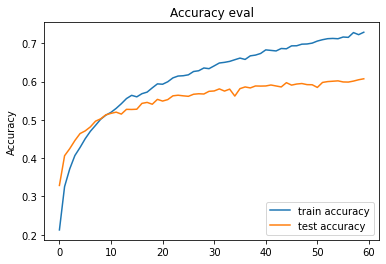

In [ ]:
plot_accuracy(th_lstm_history)

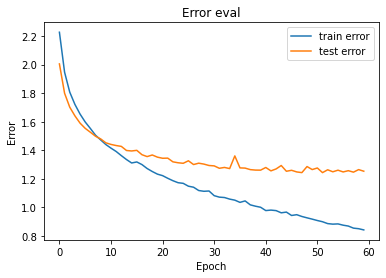

In [ ]:
plot_loss(th_lstm_history)

## New CNN with one dimensional convolutional layer.

In [ ]:
from tensorflow.keras.utils import to_categorical
import json

In [ ]:
'''data_dir = "/content/drive/MyDrive/Data's/Songs classifier/mfcc_200_songs_15.json"

with open(data_dir, "r") as fp:
    conv1d_data = json.load(fp)'''

In [ ]:
with open(TH_NEW_JSON_PATH, "r") as fp:
    conv1d_data = json.load(fp)

In [ ]:
conv1d_inputs = np.array(next_inputs["mfcc"])
conv1d_targets = np.array(next_inputs["labels"])

IndexError: ignored

In [ ]:
th_X_train, th_X_test, th_y_train, th_y_test =  train_test_split(next_inputs, next_targets, test_size=0.4,  shuffle = True)
th_X_test, th_X_val, th_y_test, th_y_val = train_test_split(th_X_test, th_y_test, test_size=0.5, shuffle = True)

th_X_train.shape

# add an axis to input sets
#conv1d_X_train = conv1d_X_train[..., np.newaxis]
#conv1d_X_val = conv1d_X_val[..., np.newaxis]
#conv1d_X_test = conv1d_X_test[..., np.newaxis]

conv1d_input_shape = (th_X_train.shape[1], th_X_train.shape[2], 1) ##

print(conv1d_input_shape)

(87, 13, 1)


In [ ]:
th_y_train = to_categorical(th_y_train, 11)
th_y_val = to_categorical(th_y_val, 11)
th_y_test = to_categorical(th_y_test, 11)

In [ ]:
DROPOUT_RATE = 0.5
CONV_DROPOUT_RATE = 0.2

In [ ]:
from keras.layers.convolutional import Conv1D
from keras.models import Sequential
from keras.layers import Conv1D, Dense, MaxPooling1D, Flatten, Input


In [ ]:
conv1d_input_shape

(87, 13, 1)

In [ ]:
# Create conv1d_model
conv1d_model =  keras.Sequential()

# First block
conv1d_model.add(Conv1D(filters=16,
                 kernel_size=3,
                 input_shape=(87,13),
                 activation='relu',
                 padding='same'))

conv1d_model.add(Conv1D(filters=16,
                 kernel_size=3,
                 activation='relu',
                 padding='same'))

conv1d_model.add(keras.layers.MaxPooling1D(pool_size=2, strides=1, padding='same'))
conv1d_model.add(keras.layers.Dropout(CONV_DROPOUT_RATE))

# Second block
conv1d_model.add(Conv1D(filters=32,
                 kernel_size=3,
                 activation='relu',
                 padding='same'))

conv1d_model.add(Conv1D(filters=32,
                 kernel_size=3,
                 activation='relu',
                 padding='same'))

conv1d_model.add(keras.layers.MaxPooling1D(pool_size=2,   strides=1, padding='same'))
conv1d_model.add(keras.layers.Dropout(CONV_DROPOUT_RATE))

# Third block
conv1d_model.add(Conv1D(filters=64,
                 kernel_size=3,
                 activation='relu',
                 padding='same'))

conv1d_model.add(Conv1D(filters=64,
                 kernel_size=3,
                 activation='relu',
                 padding='same'))

conv1d_model.add(keras.layers.MaxPooling1D(pool_size=2,   strides=1, padding='same'))
conv1d_model.add(keras.layers.Dropout(CONV_DROPOUT_RATE))


# Fully connected layers
conv1d_model.add(Flatten())
conv1d_model.add(Dense(512, activation='relu'))
conv1d_model.add(Dense(512, activation='relu'))
conv1d_model.add(keras.layers.Dropout(CONV_DROPOUT_RATE))
# Output
conv1d_model.add(Dense(11, activation='softmax'),)

In [ ]:
conv1d_model.compile(loss="categorical_crossentropy",
                      optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                      metrics=["accuracy"])

In [ ]:
conv1d_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_28 (Conv1D)          (None, 87, 16)            640       
                                                                 
 conv1d_29 (Conv1D)          (None, 87, 16)            784       
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 87, 16)           0         
 g1D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 87, 16)            0         
                                                                 
 conv1d_30 (Conv1D)          (None, 87, 32)            1568      
                                                                 
 conv1d_31 (Conv1D)          (None, 87, 32)            3104      
                                                      

In [ ]:
conv1d_history = conv1d_model.fit(th_X_train, th_y_train, validation_data=(th_X_val, th_y_val), batch_size=32, epochs=100)

Epoch 1/100
574/574 [==============================] - 15s 7ms/step - loss: 2.8447 - accuracy: 0.1689 - val_loss: 2.0617 - val_accuracy: 0.2602
Epoch 2/100
574/574 [==============================] - 3s 6ms/step - loss: 1.9927 - accuracy: 0.2853 - val_loss: 1.9105 - val_accuracy: 0.3120
Epoch 3/100
574/574 [==============================] - 3s 6ms/step - loss: 1.8499 - accuracy: 0.3354 - val_loss: 1.8262 - val_accuracy: 0.3586
Epoch 4/100
574/574 [==============================] - 3s 6ms/step - loss: 1.7706 - accuracy: 0.3653 - val_loss: 1.8030 - val_accuracy: 0.3616
Epoch 5/100
574/574 [==============================] - 3s 6ms/step - loss: 1.7046 - accuracy: 0.3884 - val_loss: 1.6768 - val_accuracy: 0.4074
Epoch 6/100
574/574 [==============================] - 3s 6ms/step - loss: 1.6383 - accuracy: 0.4114 - val_loss: 1.6330 - val_accuracy: 0.4240
Epoch 7/100
574/574 [==============================] - 3s 6ms/step - loss: 1.5847 - accuracy: 0.4291 - val_loss: 1.5646 - val_accuracy: 0.457

KeyboardInterrupt: ignored

In [ ]:
conv1d_history = conv1d_model.fit(x = conv1d_X_train,
                                  y = conv1d_y_train,
                                  batch_size = 32,
                                  epochs = 5,
                                  validation_data = (conv1d_X_val, conv1d_y_val),
                                  steps_per_epoch = len(conv1d_X_train)//32,
                                  validation_steps = len(conv1d_X_val)//32)

Epoch 1/5
458/458 [==============================] - 34s 72ms/step - loss: 3.9241 - accuracy: 0.2902 - val_loss: 1.7281 - val_accuracy: 0.3996
Epoch 2/5
458/458 [==============================] - 32s 71ms/step - loss: 1.6217 - accuracy: 0.4307 - val_loss: 1.5987 - val_accuracy: 0.4416
Epoch 3/5
458/458 [==============================] - 32s 71ms/step - loss: 1.4604 - accuracy: 0.4880 - val_loss: 1.5828 - val_accuracy: 0.4426
Epoch 4/5
458/458 [==============================] - 32s 71ms/step - loss: 1.3345 - accuracy: 0.5366 - val_loss: 1.5256 - val_accuracy: 0.4633
Epoch 5/5
458/458 [==============================] - 32s 71ms/step - loss: 1.2094 - accuracy: 0.5826 - val_loss: 1.4290 - val_accuracy: 0.5003


Another model: 

In [ ]:
stride1_model_cnn = keras.Sequential()

# st conv layer
stride1_model_cnn.add(keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape= next_inputs_shape))
stride1_model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same'))
stride1_model_cnn.add(keras.layers.BatchNormalization())

# 2nd conv layer
stride1_model_cnn.add(keras.layers.Conv2D(16, (3, 3), activation='relu'))
stride1_model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same'))
stride1_model_cnn.add(keras.layers.BatchNormalization())

# 3rd conv layer
stride1_model_cnn.add(keras.layers.Conv2D(16, (2, 2), activation='relu'))
stride1_model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(1, 1), padding='same'))
stride1_model_cnn.add(keras.layers.BatchNormalization())

# flatten output and feed it into dense layer
stride1_model_cnn.add(keras.layers.Flatten())
stride1_model_cnn.add(keras.layers.Dense(32, activation='relu'))
stride1_model_cnn.add(keras.layers.Dropout(0.2))

# output layer
stride1_model_cnn.add(keras.layers.Dense(11, activation='softmax'))


In [ ]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0005)
stride1_model_cnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

stride1_model_cnn.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 85, 11, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 11, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 85, 11, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 83, 9, 16)         2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 83, 9, 16)        0         
 2D)                                                             
                                                      

In [ ]:
stride1_history = stride1_model_cnn.fit(th_X_train, th_y_train, validation_data=(th_X_test, th_y_test), batch_size=32, epochs=80)

Epoch 1/80
765/765 [==============================] - 9s 12ms/step - loss: 2.0794 - accuracy: 0.2932 - val_loss: 1.7872 - val_accuracy: 0.4105
Epoch 2/80
765/765 [==============================] - 6s 8ms/step - loss: 1.7920 - accuracy: 0.3790 - val_loss: 1.5771 - val_accuracy: 0.4724
Epoch 3/80
765/765 [==============================] - 6s 8ms/step - loss: 1.6845 - accuracy: 0.4075 - val_loss: 1.5123 - val_accuracy: 0.4688
Epoch 4/80
765/765 [==============================] - 7s 9ms/step - loss: 1.6086 - accuracy: 0.4314 - val_loss: 1.4924 - val_accuracy: 0.4923
Epoch 5/80
765/765 [==============================] - 6s 8ms/step - loss: 1.5503 - accuracy: 0.4539 - val_loss: 1.4616 - val_accuracy: 0.4989
Epoch 6/80
765/765 [==============================] - 6s 8ms/step - loss: 1.5061 - accuracy: 0.4692 - val_loss: 1.3831 - val_accuracy: 0.5155
Epoch 7/80
765/765 [==============================] - 7s 9ms/step - loss: 1.4494 - accuracy: 0.4833 - val_loss: 1.3774 - val_accuracy: 0.5237
Epoch

In [ ]:
stride_2_history = stide1_model_cnn.fit(th_X_train, th_y_train, validation_data=(th_X_test, th_y_test), batch_size=32, epochs=90)

NameError: ignored

## CNN with new data

In [ ]:
th_X_train, th_X_test, th_y_train, th_y_test =  train_test_split(next_inputs, next_targets, test_size=0.2,  shuffle = True)
th_X_test, th_X_val, th_y_test, th_y_val = train_test_split(th_X_test, th_y_test, test_size=0.5, shuffle = True)

th_X_train.shape


In [ ]:
# add an axis to input sets
th_X_train = th_X_train[..., np.newaxis]
th_X_val = th_X_val[..., np.newaxis]
th_X_test = th_X_test[..., np.newaxis]

In [ ]:
next_inputs_shape = (th_X_train.shape[1], th_X_train.shape[2], 1) ##

print(next_inputs_shape)


In [ ]:
th_model_cnn_new_data = keras.Sequential()

# st conv layer
th_model_cnn_new_data.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=next_inputs_shape))
th_model_cnn_new_data.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2) , padding='same'))
th_model_cnn_new_data.add(keras.layers.BatchNormalization())

# 2nd conv layer
th_model_cnn_new_data.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
th_model_cnn_new_data.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
th_model_cnn_new_data.add(keras.layers.BatchNormalization())

# 3rd conv layer
th_model_cnn_new_data.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
th_model_cnn_new_data.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
th_model_cnn_new_data.add(keras.layers.BatchNormalization())

# flatten output and feed it into dense layer
th_model_cnn_new_data.add(keras.layers.Flatten())
th_model_cnn_new_data.add(keras.layers.Dense(64, activation='relu'))
th_model_cnn_new_data.add(keras.layers.Dropout(0.3))

# output layer
th_model_cnn_new_data.add(keras.layers.Dense(11, activation='softmax'))

In [ ]:
# compile model
optimiser = keras.optimizers.Adam()
th_model_cnn_new_data.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

th_model_cnn_new_data.summary()

In [ ]:
th_history_new_data = th_model_cnn_new_data.fit(th_X_train, th_y_train, validation_data=(th_X_test, th_y_test), batch_size=32, epochs=90)


Epoch 1/90
765/765 [==============================] - 7s 9ms/step - loss: 2.1977 - accuracy: 0.2622 - val_loss: 1.7227 - val_accuracy: 0.4112
Epoch 2/90
765/765 [==============================] - 5s 6ms/step - loss: 1.7901 - accuracy: 0.3879 - val_loss: 1.5550 - val_accuracy: 0.4599
Epoch 3/90
765/765 [==============================] - 5s 7ms/step - loss: 1.6524 - accuracy: 0.4317 - val_loss: 1.4860 - val_accuracy: 0.4936
Epoch 4/90
765/765 [==============================] - 5s 7ms/step - loss: 1.5640 - accuracy: 0.4572 - val_loss: 1.4059 - val_accuracy: 0.5155
Epoch 5/90
765/765 [==============================] - 5s 7ms/step - loss: 1.4980 - accuracy: 0.4841 - val_loss: 1.3593 - val_accuracy: 0.5391
Epoch 6/90
765/765 [==============================] - 5s 7ms/step - loss: 1.4500 - accuracy: 0.5024 - val_loss: 1.3126 - val_accuracy: 0.5509
Epoch 7/90
765/765 [==============================] - 5s 7ms/step - loss: 1.4096 - accuracy: 0.5178 - val_loss: 1.2867 - val_accuracy: 0.5633
Epoch 

In [ ]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.001)
th_model_cnn_new_data_2.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

th_model_cnn_new_data_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 85, 11, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 43, 6, 32)        0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 43, 6, 32)        128       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 41, 4, 32)         9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 21, 2, 32)        0         
 2D)                                                             
                                                      

In [ ]:
th_history_new_data_2 = th_model_cnn_new_data_2.fit(th_X_train, th_y_train, validation_data=(th_X_test, th_y_test), batch_size=32, epochs=90)

Epoch 1/90
765/765 [==============================] - 9s 9ms/step - loss: 1.7238 - accuracy: 0.4113 - val_loss: 1.3879 - val_accuracy: 0.5254
Epoch 2/90
765/765 [==============================] - 5s 7ms/step - loss: 1.3986 - accuracy: 0.5200 - val_loss: 1.2589 - val_accuracy: 0.5698
Epoch 3/90
765/765 [==============================] - 5s 7ms/step - loss: 1.2795 - accuracy: 0.5611 - val_loss: 1.2061 - val_accuracy: 0.5875
Epoch 4/90
765/765 [==============================] - 5s 7ms/step - loss: 1.2115 - accuracy: 0.5845 - val_loss: 1.1067 - val_accuracy: 0.6179
Epoch 5/90
765/765 [==============================] - 5s 6ms/step - loss: 1.1511 - accuracy: 0.6007 - val_loss: 1.0933 - val_accuracy: 0.6300
Epoch 6/90
765/765 [==============================] - 5s 7ms/step - loss: 1.1022 - accuracy: 0.6201 - val_loss: 1.0665 - val_accuracy: 0.6294
Epoch 7/90
765/765 [==============================] - 5s 7ms/step - loss: 1.0738 - accuracy: 0.6291 - val_loss: 1.1218 - val_accuracy: 0.6117
Epoch 

In [ ]:
# With the same data but shuffled 
th_X_train, th_X_test, th_y_train, th_y_test =  train_test_split(next_inputs, next_targets, test_size=0.4,  shuffle = True)
th_X_test, th_X_val, th_y_test, th_y_val = train_test_split(th_X_test, th_y_test, test_size=0.5, shuffle = True)

th_X_train.shape

# add an axis to input sets
th_X_train = th_X_train[..., np.newaxis]
th_X_val = th_X_val[..., np.newaxis]
th_X_test = th_X_test[..., np.newaxis]


next_inputs_shape = (th_X_train.shape[1], th_X_train.shape[2], 1) ##

print(next_inputs_shape)

th_model_cnn_new_data_3 = keras.Sequential()

# st conv layer
th_model_cnn_new_data_3.add(keras.layers.Conv2D(16, (2, 2), activation='relu', input_shape=next_inputs_shape))
th_model_cnn_new_data_3.add(keras.layers.MaxPooling2D((2, 2), strides=(1, 1) , padding='same'))
th_model_cnn_new_data_3.add(keras.layers.BatchNormalization())

# 2nd conv layer
th_model_cnn_new_data_3.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
th_model_cnn_new_data_3.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
th_model_cnn_new_data_3.add(keras.layers.BatchNormalization())

# 3rd conv layer
th_model_cnn_new_data_3.add(keras.layers.Conv2D(128, (2, 2), activation='relu'))
th_model_cnn_new_data_3.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
th_model_cnn_new_data_3.add(keras.layers.BatchNormalization())
th_model_cnn_new_data_3.add(keras.layers.Dropout(0.3))

th_model_cnn_new_data_3.add(keras.layers.Conv2D(128, (2, 2), activation='relu'))
th_model_cnn_new_data_3.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
th_model_cnn_new_data_3.add(keras.layers.BatchNormalization())
th_model_cnn_new_data_3.add(keras.layers.Dropout(0.3))

# flatten output and feed it into dense layer
th_model_cnn_new_data_3.add(keras.layers.Flatten())
th_model_cnn_new_data_3.add(keras.layers.Dense(256, activation='relu'))
th_model_cnn_new_data_3.add(keras.layers.Dropout(0.3))

# output layer
th_model_cnn_new_data_3.add(keras.layers.Dense(11, activation='softmax'))

# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.001)
th_model_cnn_new_data_3.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

th_model_cnn_new_data_3.summary()

th_history_new_data = th_model_cnn_new_data_3.fit(th_X_train, th_y_train, validation_data=(th_X_test, th_y_test), batch_size=32, epochs=100)



(87, 13, 1)
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 86, 12, 16)        80        
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 86, 12, 16)       0         
 g2D)                                                            
                                                                 
 batch_normalization_19 (Bat  (None, 86, 12, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_20 (Conv2D)          (None, 84, 10, 32)        4640      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 42, 5, 32)        0         
 g2D)                                                            
                                         

learning rate = 0.0001, 60/20/20 
32, 32, 64, 64 
Epoch 90/90
574/574 [==============================] - 5s 9ms/step - loss: 0.5004 - accuracy: 0.8214 - val_loss: 1.2032 - val_accuracy: 0.6754

Epoch 60/60 ( her layer de 0.3 dropout, learning rate = 0.001, 60/20/20)
32, 32, 64, 64
574/574 [==============================] - 5s 8ms/step - loss: 1.0538 - 
accuracy: 0.6317 - val_loss: 0.9058 - val_accuracy: 0.6795
574/574 [==============================] - 5s 9ms/step - loss: 1.0277 - accuracy: 0.6436 - val_loss: 0.8922 - val_accuracy: 0.6909
Epoch 89/90
574/574 [==============================] - 5s 10ms/step - loss: 1.0019 - accuracy: 0.6514 - val_loss: 0.8376 - val_accuracy: 0.7110


32,32,64, 128  (64,128 de 0.3 dropout) 
learning rate = 0.001 
Epoch 150/150
574/574 [==============================] - 6s 10ms/step - loss: 0.4166 - accuracy: 0.8489 - val_loss: 0.9141 - val_accuracy: 0.7307


32, 32, 64, 128, 256 (128, 256 0.3 dropout), learning rate =0.001 
Epoch 60/60
574/574 [==============================] - 8s 13ms/step - loss: 0.3800 - accuracy: 0.8699 - val_loss: 0.8767 - val_accuracy: 0.7449



16,32,128, 128, 256  ( 128,128,256 de dropout 0.3)
learning rate = 0.001
Epoch 99/100
574/574 [==============================] - 7s 13ms/step - loss: 0.2376 - accuracy: 0.9186 - val_loss: 0.8373 - val_accuracy: 0.7661
Epoch 100/100
574/574 [==============================] - 8s 13ms/step - loss: 0.2197 - accuracy: 0.9266 - val_loss: 0.9017 - val_accuracy: 0.7522

In [ ]:
# With the same data but shuffled 
th_X_train, th_X_test, th_y_train, th_y_test =  train_test_split(next_inputs, next_targets, test_size=0.4,  shuffle = True)
th_X_test, th_X_val, th_y_test, th_y_val = train_test_split(th_X_test, th_y_test, test_size=0.5, shuffle = True)

th_X_train.shape

# add an axis to input sets
th_X_train = th_X_train[..., np.newaxis]
th_X_val = th_X_val[..., np.newaxis]
th_X_test = th_X_test[..., np.newaxis]


next_inputs_shape = (th_X_train.shape[1], th_X_train.shape[2], 1) ##

print(next_inputs_shape)

th_model_cnn_new_data_4 = keras.Sequential()

# st conv layer
th_model_cnn_new_data_4.add(keras.layers.Conv2D(256, (2, 2), activation='relu', input_shape=next_inputs_shape))
th_model_cnn_new_data_4.add(keras.layers.MaxPooling2D((2, 2), strides=(1, 1) , padding='same'))
th_model_cnn_new_data_4.add(keras.layers.BatchNormalization())

# 2nd conv layer
th_model_cnn_new_data_4.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
th_model_cnn_new_data_4.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
th_model_cnn_new_data_4.add(keras.layers.BatchNormalization())

# 3rd conv layer
th_model_cnn_new_data_4.add(keras.layers.Conv2D(64, (2, 2), activation='relu'))
th_model_cnn_new_data_4.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
th_model_cnn_new_data_4.add(keras.layers.BatchNormalization())
th_model_cnn_new_data_4.add(keras.layers.Dropout(0.2))

th_model_cnn_new_data_4.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
th_model_cnn_new_data_4.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
th_model_cnn_new_data_4.add(keras.layers.BatchNormalization())
th_model_cnn_new_data_4.add(keras.layers.Dropout(0.2))

# flatten output and feed it into dense layer
th_model_cnn_new_data_4.add(keras.layers.Flatten())
th_model_cnn_new_data_4.add(keras.layers.Dense(16, activation='relu'))
th_model_cnn_new_data_4.add(keras.layers.Dropout(0.2))

# output layer
th_model_cnn_new_data_4.add(keras.layers.Dense(11, activation='softmax'))

# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.001)
th_model_cnn_new_data_4.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

th_model_cnn_new_data_4.summary()

th_history_new_data = th_model_cnn_new_data_4.fit(th_X_train, th_y_train, validation_data=(th_X_test, th_y_test), batch_size=32, epochs=100)



(87, 13, 1)
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 86, 12, 256)       1280      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 86, 12, 256)      0         
 g2D)                                                            
                                                                 
 batch_normalization_23 (Bat  (None, 86, 12, 256)      1024      
 chNormalization)                                                
                                                                 
 conv2d_24 (Conv2D)          (None, 84, 10, 128)       295040    
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 42, 5, 128)       0         
 g2D)                                                            
                                         

In [ ]:
th_history_new_data = th_model_cnn_new_data_4.fit(th_X_train, th_y_train, validation_data=(th_X_test, th_y_test), batch_size=32, epochs=100)


CNN with segments 6 (5-second features) 

In [ ]:
# With the same data but shuffled 
th_X_train, th_X_test, th_y_train, th_y_test =  train_test_split(next_inputs, next_targets, test_size=0.4,  shuffle = True)
th_X_test, th_X_val, th_y_test, th_y_val = train_test_split(th_X_test, th_y_test, test_size=0.5, shuffle = True)

th_X_train.shape

# add an axis to input sets
th_X_train = th_X_train[..., np.newaxis]
th_X_val = th_X_val[..., np.newaxis]
th_X_test = th_X_test[..., np.newaxis]


next_inputs_shape = (th_X_train.shape[1], th_X_train.shape[2], 1) ##

print(next_inputs_shape)

th_model_cnn_new_data_4 = keras.Sequential()

# st conv layer
th_model_cnn_new_data_4.add(keras.layers.Conv2D(256, (2, 2), activation='relu', input_shape=next_inputs_shape))
th_model_cnn_new_data_4.add(keras.layers.MaxPooling2D((2, 2), strides=(1, 1) , padding='same'))
th_model_cnn_new_data_4.add(keras.layers.BatchNormalization())
th_model_cnn_new_data_4.add(keras.layers.Dropout(0.4))

# 2nd conv layer
th_model_cnn_new_data_4.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
th_model_cnn_new_data_4.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
th_model_cnn_new_data_4.add(keras.layers.BatchNormalization())
th_model_cnn_new_data_4.add(keras.layers.Dropout(0.4))

# 3rd conv layer
th_model_cnn_new_data_4.add(keras.layers.Conv2D(64, (2, 2), activation='relu'))
th_model_cnn_new_data_4.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
th_model_cnn_new_data_4.add(keras.layers.BatchNormalization())
th_model_cnn_new_data_4.add(keras.layers.Dropout(0.4))

th_model_cnn_new_data_4.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
th_model_cnn_new_data_4.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
th_model_cnn_new_data_4.add(keras.layers.BatchNormalization())
th_model_cnn_new_data_4.add(keras.layers.Dropout(0.4))

# flatten output and feed it into dense layer
th_model_cnn_new_data_4.add(keras.layers.Flatten())
th_model_cnn_new_data_4.add(keras.layers.Dense(16, activation='relu'))
th_model_cnn_new_data_4.add(keras.layers.Dropout(0.4))

# output layer
th_model_cnn_new_data_4.add(keras.layers.Dense(11, activation='softmax'))

# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.001)
th_model_cnn_new_data_4.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

th_model_cnn_new_data_4.summary()

th_history_new_data = th_model_cnn_new_data_4.fit(th_X_train, th_y_train, validation_data=(th_X_test, th_y_test), batch_size=32, epochs=100)

(216, 13, 1)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 215, 12, 256)      1280      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 215, 12, 256)     0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 215, 12, 256)     1024      
 hNormalization)                                                 
                                                                 
 dropout_15 (Dropout)        (None, 215, 12, 256)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 213, 10, 128)      295040    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 107,

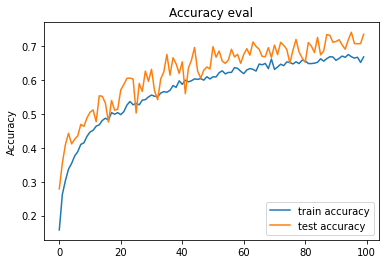

In [ ]:
plot_accuracy(th_history_new_data)

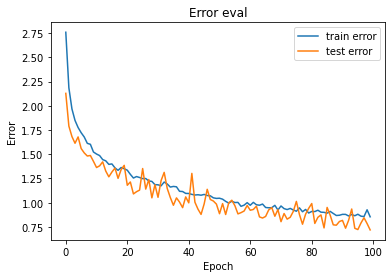

In [ ]:
plot_loss(th_history_new_data)

CNN 

In [ ]:
# With the same data but shuffled 
th_X_train, th_X_test, th_y_train, th_y_test =  train_test_split(th_inputs, th_targets, test_size=0.3,  shuffle = True)
th_X_test, th_X_val, th_y_test, th_y_val = train_test_split(th_X_test, th_y_test, test_size=0.5, shuffle = True)

th_X_train.shape

# add an axis to input sets
th_X_train = th_X_train[..., np.newaxis]
th_X_val = th_X_val[..., np.newaxis]
th_X_test = th_X_test[..., np.newaxis]


next_inputs_shape = (th_X_train.shape[1], th_X_train.shape[2], 1) ##

print(next_inputs_shape)

sec5_cnn = keras.Sequential()

# st conv layer
sec5_cnn.add(keras.layers.Conv2D(256, (2, 2), activation='relu', input_shape=next_inputs_shape))
sec5_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(1, 1) , padding='same'))
sec5_cnn.add(keras.layers.BatchNormalization())
sec5_cnn.add(keras.layers.Dropout(0.3))

# 2nd conv layer
sec5_cnn.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
sec5_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
sec5_cnn.add(keras.layers.BatchNormalization())
sec5_cnn.add(keras.layers.Dropout(0.3))

# 3rd conv layer
sec5_cnn.add(keras.layers.Conv2D(64, (2, 2), activation='relu'))
sec5_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
sec5_cnn.add(keras.layers.BatchNormalization())
sec5_cnn.add(keras.layers.Dropout(0.3))


# flatten output and feed it into dense layer
sec5_cnn.add(keras.layers.Flatten())
sec5_cnn.add(keras.layers.Dense(16, activation='relu'))
sec5_cnn.add(keras.layers.Dropout(0.3))

# output layer
sec5_cnn.add(keras.layers.Dense(11, activation='softmax'))

# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.001)
sec5_cnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

sec5_cnn.summary()

sec5_history_new_data = sec5_cnn.fit(th_X_train, th_y_train, validation_data=(th_X_test, th_y_test), batch_size=32, epochs=100)

(216, 13, 1)
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 215, 12, 256)      1280      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 215, 12, 256)     0         
 g2D)                                                            
                                                                 
 batch_normalization_12 (Bat  (None, 215, 12, 256)     1024      
 chNormalization)                                                
                                                                 
 dropout_28 (Dropout)        (None, 215, 12, 256)      0         
                                                                 
 conv2d_14 (Conv2D)          (None, 213, 10, 128)      295040    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 107,

In [ ]:
# With the same data but shuffled 
th_X_train, th_X_test, th_y_train, th_y_test =  train_test_split(th_inputs, th_targets, test_size=0.2,  shuffle = True)
th_X_test, th_X_val, th_y_test, th_y_val = train_test_split(th_X_test, th_y_test, test_size=0.5, shuffle = True)

th_X_train.shape

# add an axis to input sets
th_X_train = th_X_train[..., np.newaxis]
th_X_val = th_X_val[..., np.newaxis]
th_X_test = th_X_test[..., np.newaxis]


next_inputs_shape = (th_X_train.shape[1], th_X_train.shape[2], 1) ##

print(next_inputs_shape)

sec5_cnn = keras.Sequential()

# st conv layer
sec5_cnn.add(keras.layers.Conv2D(256, (2, 2), activation='relu', input_shape=next_inputs_shape))
sec5_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
sec5_cnn.add(keras.layers.BatchNormalization())
sec5_cnn.add(keras.layers.Dropout(0.3))

# 2nd conv layer
sec5_cnn.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
sec5_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
sec5_cnn.add(keras.layers.BatchNormalization())
sec5_cnn.add(keras.layers.Dropout(0.3))

# 3rd conv layer
sec5_cnn.add(keras.layers.Conv2D(64, (2, 2), activation='relu'))
sec5_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
sec5_cnn.add(keras.layers.BatchNormalization())
sec5_cnn.add(keras.layers.Dropout(0.3))


# flatten output and feed it into dense layer
sec5_cnn.add(keras.layers.Flatten())
sec5_cnn.add(keras.layers.Dense(16, activation='relu'))
sec5_cnn.add(keras.layers.Dropout(0.3))

# output layer
sec5_cnn.add(keras.layers.Dense(11, activation='softmax'))

# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.01)
sec5_cnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

sec5_cnn.summary()

sec5_1_history_new_data = sec5_cnn.fit(th_X_train, th_y_train, validation_data=(th_X_test, th_y_test), batch_size=32, epochs=100)

(216, 13, 1)
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 215, 12, 256)      1280      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 108, 6, 256)      0         
 g2D)                                                            
                                                                 
 batch_normalization_15 (Bat  (None, 108, 6, 256)      1024      
 chNormalization)                                                
                                                                 
 dropout_32 (Dropout)        (None, 108, 6, 256)       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 106, 4, 128)       295040    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 53,

Neural Network 

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(th_inputs, th_targets, test_size=0.3)

sec6_model = keras.Sequential([
    keras.layers.Flatten(input_shape = (th_inputs.shape[1], th_inputs.shape[2])),
    
    #1st hidden layer 
    keras.layers.Dense(512, activation = "relu",  name="layer1"), 
    keras.layers.Dropout(0.3),
    #2nd hidden layer 
    keras.layers.Dense(256, activation = "relu",  name="layer2"), 
    keras.layers.Dropout(0.3),
    #3nd hidden layer 
    keras.layers.Dense(64, activation = "relu",  name="layer3"), 
    keras.layers.Dropout(0.3),
    #output layer 
    keras.layers.Dense(11, activation = "softmax",  name="outputlayer") # labels. (Softmax is for multiclasss, sigmoid for binary classification)
])

optimizer = keras.optimizers.Adam(learning_rate=0.01)
sec6_model.compile(optimizer=optimizer, 
              loss = "sparse_categorical_crossentropy", 
              metrics = ["accuracy"]
)
sec6_model.summary()

sec6_history = sec6_model.fit(X_train, y_train, 
          validation_data=(X_test, y_test), 
          epochs=100, 
          batch_size=32)



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 2808)              0         
                                                                 
 layer1 (Dense)              (None, 512)               1438208   
                                                                 
 dropout_20 (Dropout)        (None, 512)               0         
                                                                 
 layer2 (Dense)              (None, 256)               131328    
                                                                 
 dropout_21 (Dropout)        (None, 256)               0         
                                                                 
 layer3 (Dense)              (None, 64)                16448     
                                                                 
 dropout_22 (Dropout)        (None, 64)               

KeyboardInterrupt: ignored

MFCC with 15 segments ( 2 seconds ), trying CNN with 70%/15%/15%, 0.001% learning rate. 16, 32, 32 (dropout =0.3), 64 (dropout =0.3), 100 epochs. 

In [19]:
th_X_train, th_X_test, th_y_train, th_y_test =  train_test_split(next_inputs, next_targets, test_size=0.3)
th_X_test, th_X_val, th_y_test, th_y_val = train_test_split(th_X_test, th_y_test, test_size=0.5)

th_X_train.shape

th_input_shape = (th_X_train.shape[1], th_X_train.shape[2], 1) ##

print(th_input_shape)

th_model_cnn = keras.Sequential()

# st conv layer
th_model_cnn.add(keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=th_input_shape))
th_model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2) , padding='same'))
th_model_cnn.add(keras.layers.BatchNormalization())

# 2nd conv layer
th_model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
th_model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
th_model_cnn.add(keras.layers.BatchNormalization())

# 3rd conv layer
th_model_cnn.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
th_model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
th_model_cnn.add(keras.layers.BatchNormalization())
th_model_cnn.add(keras.layers.Dropout(0.3))


# flatten output and feed it into dense layer
th_model_cnn.add(keras.layers.Flatten())
th_model_cnn.add(keras.layers.Dense(64, activation='relu'))
th_model_cnn.add(keras.layers.Dropout(0.3))

# output layer
th_model_cnn.add(keras.layers.Dense(11, activation='softmax'))

# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.001)
th_model_cnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

th_model_cnn.summary()

(87, 13, 1)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 85, 11, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 43, 6, 16)        0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 43, 6, 16)        64        
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 41, 4, 32)         4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 21, 2, 32)        0         
 2D)                                                             
                                          

In [21]:
history_1 = th_model_cnn.fit(th_X_train, th_y_train, validation_data=(th_X_test, th_y_test), batch_size=32, epochs=100)

Epoch 1/100
700/700 [==============================] - 9s 13ms/step - loss: 1.8497 - accuracy: 0.3804 - val_loss: 1.4746 - val_accuracy: 0.4916
Epoch 2/100
700/700 [==============================] - 9s 12ms/step - loss: 1.5185 - accuracy: 0.4810 - val_loss: 1.3606 - val_accuracy: 0.5266
Epoch 3/100
700/700 [==============================] - 9s 13ms/step - loss: 1.4013 - accuracy: 0.5231 - val_loss: 1.2150 - val_accuracy: 0.5900
Epoch 4/100
700/700 [==============================] - 9s 12ms/step - loss: 1.3249 - accuracy: 0.5479 - val_loss: 1.1887 - val_accuracy: 0.5833
Epoch 5/100
700/700 [==============================] - 9s 12ms/step - loss: 1.2782 - accuracy: 0.5674 - val_loss: 1.2190 - val_accuracy: 0.5919
Epoch 6/100
700/700 [==============================] - 9s 13ms/step - loss: 1.2301 - accuracy: 0.5809 - val_loss: 1.1222 - val_accuracy: 0.6188
Epoch 7/100
700/700 [==============================] - 9s 13ms/step - loss: 1.1986 - accuracy: 0.5910 - val_loss: 1.1116 - val_accuracy:

In [22]:
plot_accuracy(history_1)

NameError: name 'plot_accuracy' is not defined

In [37]:
import os
filename = "/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/pickles/model(72,71).pkl"
os.makedirs(os.path.dirname(filename), exist_ok=True)

with open(filename, 'wb') as f:
    pickle.dump(th_model_cnn, f)

INFO:tensorflow:Assets written to: ram://decb615e-a95c-4e63-9403-becd359727ee/assets


In [38]:
file = open(filename,'rb')
object_file = pickle.load(file)

## Testing model with a real song

In [162]:
 JSON_PATH = "/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/testing/mfcc/tmp.json"

In [163]:
## Burdan Disco ve s deyiwmelisen. Hansi folder varsa ona baxmalisan. testing in icinde 

In [164]:
current_song_path = "/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/testing/jazz"
next_path = "/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/testing/wav"

In [165]:
def test_song(current_song_path, next_path, genre, JSON_PATH = "/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/testing/mfcc/tmp.json"):
    write_as_wav(current_song_path, (next_path + "/" + genre), genre)
    save_as_mfcc(next_path, JSON_PATH, num_segments = 15)
    

In [166]:
test_song(current_song_path, next_path, "jazz")

with open(JSON_PATH, "r") as fp:
    test_data = json.load(fp)
arr = np.array(test_data)
test_mfcc = np.array(test_data["mfcc"])
test_targets = np.array(test_data["labels"])
index = 0

length_of_array = len(test_mfcc)
print(length_of_array)
while index != len(test_mfcc) - 1:
    print(index, len(test_mfcc))
    if(0.0 in test_mfcc[index]):
        test_mfcc =np.delete(test_mfcc, index, 0)
        test_targets = np.delete(test_targets, index, 0)
        index = index - 1
    index = index + 1
for i in range(len(test_mfcc)):
    print(0.0 in test_mfcc[i])


/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/testing/jazz/desitalk-exclusive-life-is-strange-cold-breeze-acoustic-version-15168.mp3
87

Processing pop
.DS_Store

Processing metal
.DS_Store

Processing disco
.DS_Store
disco00100.wav
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/testing/wav/disco/disco00100.wav, segment:1
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/testing/wav/disco/disco00100.wav, segment:2
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/testing/wav/disco/disco00100.wav, segment:3
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/testing/wav/disco/disco00100.wav, segment:4
/Users/ilyaskarimov/Documents/GitHub/ADA-GW-Fall2020-IlyasKarimov-/Music_Genre_Classification/testing/wav/disco/disco00100.wav, segment:5
/Users/ilyaskarimov/Documents

In [167]:
# evaluating model

predict_X = test_mfcc
predict_Y = test_targets

predict_X.shape

# perform prediction
# print(X_to_predict)
for i in predict_X:  
    i = i[np.newaxis, ...] # array shape (1, 130, 13, 1)
    prediction = object_file.predict(i)
    index_predicted = np.argmax(prediction, axis=1)
    for k in index_predicted:
        print("target:",  labels[predict_Y[k]])
        print("predicted: ", k, " mfcc: ", labels[k])

target: disco
predicted:  10  mfcc:  jazz
target: disco
predicted:  3  mfcc:  blues
target: disco
predicted:  9  mfcc:  country
target: disco
predicted:  10  mfcc:  jazz
target: disco
predicted:  10  mfcc:  jazz
target: disco
predicted:  10  mfcc:  jazz
target: disco
predicted:  10  mfcc:  jazz
target: disco
predicted:  10  mfcc:  jazz
target: disco
predicted:  0  mfcc:  pop
target: disco
predicted:  7  mfcc:  rock
target: disco
predicted:  10  mfcc:  jazz
target: disco
predicted:  10  mfcc:  jazz
target: disco
predicted:  10  mfcc:  jazz
target: disco
predicted:  10  mfcc:  jazz


In [ ]:
df = pd.DataFrame(predict_X)

In [ ]:
df

0           1          2          3          4          5   \
0  -324.677643  171.632660 -13.280091  42.372391  15.670492  15.992809   
1  -322.280792  155.274368  -9.958336  39.922695  21.831207  17.970287   
2  -296.648193  124.570236   8.185252  29.442339  31.664001  21.548695   
3  -274.302032  115.731544  20.255714  22.367203  31.841248  22.588776   
4  -264.150482  109.109535  22.250904  20.674221  27.132450  24.117563   
..         ...         ...        ...        ...        ...        ...   
82 -298.910614  106.280975  31.920996  30.992025  28.281235  26.680130   
83 -290.866852  115.487213  33.255623  26.883934  21.466587  18.290812   
84 -274.401367  115.050262  39.578217  20.806616  23.239216  21.172447   
85 -272.913361  117.870163  39.555321  24.504681  25.715446  21.830776   
86 -269.258057  128.016205  36.870506  28.960754  21.993538  15.063253   

           6          7         8         9          10        11         12  
0    6.270393  11.010396  4.618703 -7.853638 -12.739897  4.661171   3.010840  
1    5.662805   6.150874  3.916327 -8.796647 -11.299770  7.680173   5.852463  
2    7.103942  -0.020872  4.630404 -7.085770  -6.641536  6.386458   4.188173  
3    4.244648  -0.265239 -2.052029 -6.158319  -1.362402  5.751551  -3.202127  
4    7.075303   8.179565 -8.946896 -8.190316  -2.821103  7.320388  -6.816626  
..        ...        ...       ...       ...        ...       ...        ...  
82  12.189566   0.240200 -5.907578 -9.271717  -1.969337  0.119034  -7.932968  
83  14.764830   4.990846  2.552774 -7.670497  -8.947603 -4.957423 -12.072908  
84  16.422871   2.047858  6.600627 -2.397276 -15.116740 -7.185731  -8.269913  
85  10.589582  -1.630363  3.982267  0.498171 -15.611483 -6.736217  -4.184823  
86   5.675348   2.885390  7.334294 -0.803522 -12.608756 -8.010106  -3.790355  

[87 rows x 13 columns]

Extra training of the same model: 

In [ ]:
history_1 = th_model_cnn.fit(th_X_train, th_y_train, validation_data=(th_X_test, th_y_test), batch_size=32, epochs=200)

Epoch 1/200
700/700 [==============================] - 8s 11ms/step - loss: 0.7883 - accuracy: 0.7239 - val_loss: 0.8003 - val_accuracy: 0.7230
Epoch 2/200
700/700 [==============================] - 6s 8ms/step - loss: 0.7977 - accuracy: 0.7224 - val_loss: 0.8233 - val_accuracy: 0.7195
Epoch 3/200
700/700 [==============================] - 5s 7ms/step - loss: 0.7863 - accuracy: 0.7266 - val_loss: 0.8663 - val_accuracy: 0.7109
Epoch 4/200
700/700 [==============================] - 5s 7ms/step - loss: 0.7813 - accuracy: 0.7335 - val_loss: 0.8096 - val_accuracy: 0.7272
Epoch 5/200
700/700 [==============================] - 5s 7ms/step - loss: 0.7826 - accuracy: 0.7268 - val_loss: 0.8141 - val_accuracy: 0.7218
Epoch 6/200
700/700 [==============================] - 4s 6ms/step - loss: 0.7811 - accuracy: 0.7272 - val_loss: 0.7976 - val_accuracy: 0.7266
Epoch 7/200
700/700 [==============================] - 5s 7ms/step - loss: 0.7819 - accuracy: 0.7253 - val_loss: 0.9424 - val_accuracy: 0.687

target: hiphop
predicted: hiphop


In [ ]:
th_X_train, th_X_test, th_y_train, th_y_test =  train_test_split(next_inputs, next_targets, test_size=0.3)
th_X_test, th_X_val, th_y_test, th_y_val = train_test_split(th_X_test, th_y_test, test_size=0.5)

th_X_train.shape

th_input_shape = (th_X_train.shape[1], th_X_train.shape[2], 1) ##

print(th_input_shape)

th_model_cnn = keras.Sequential()

# st conv layer
th_model_cnn.add(keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=th_input_shape))
th_model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2) , padding='same'))
th_model_cnn.add(keras.layers.BatchNormalization())

# 2nd conv layer
th_model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
th_model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
th_model_cnn.add(keras.layers.BatchNormalization())

# 3rd conv layer
th_model_cnn.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
th_model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
th_model_cnn.add(keras.layers.BatchNormalization())
th_model_cnn.add(keras.layers.Dropout(0.3))


# flatten output and feed it into dense layer
th_model_cnn.add(keras.layers.Flatten())
th_model_cnn.add(keras.layers.Dense(64, activation='relu'))
th_model_cnn.add(keras.layers.Dropout(0.3))

# output layer
th_model_cnn.add(keras.layers.Dense(11, activation='softmax'))

# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.01)
th_model_cnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

th_model_cnn.summary()

(87, 13, 1)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 85, 11, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 43, 6, 16)        0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 43, 6, 16)        64        
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 41, 4, 32)         4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 21, 2, 32)        0         
 2D)                                                             
                                          

In [ ]:
history_1 = th_model_cnn.fit(th_X_train, th_y_train, validation_data=(th_X_test, th_y_test), batch_size=32, epochs=60)

Epoch 1/60
700/700 [==============================] - 6s 7ms/step - loss: 1.8564 - accuracy: 0.3738 - val_loss: 1.5331 - val_accuracy: 0.4697
Epoch 2/60
700/700 [==============================] - 5s 7ms/step - loss: 1.5724 - accuracy: 0.4629 - val_loss: 1.5323 - val_accuracy: 0.4868
Epoch 3/60
700/700 [==============================] - 5s 7ms/step - loss: 1.4994 - accuracy: 0.4889 - val_loss: 1.6441 - val_accuracy: 0.4350
Epoch 4/60
700/700 [==============================] - 5s 7ms/step - loss: 1.4752 - accuracy: 0.5010 - val_loss: 1.5117 - val_accuracy: 0.5057
Epoch 5/60
700/700 [==============================] - 5s 7ms/step - loss: 1.4498 - accuracy: 0.5098 - val_loss: 1.4324 - val_accuracy: 0.5014
Epoch 6/60
700/700 [==============================] - 5s 7ms/step - loss: 1.4085 - accuracy: 0.5244 - val_loss: 1.3231 - val_accuracy: 0.5437
Epoch 7/60
700/700 [==============================] - 5s 7ms/step - loss: 1.4069 - accuracy: 0.5260 - val_loss: 1.3374 - val_accuracy: 0.5353
Epoch 

In [ ]:
1 segment

In [31]:
th_X_train, th_X_test, th_y_train, th_y_test =  train_test_split(next_inputs, next_targets, test_size=0.3)
th_X_test, th_X_val, th_y_test, th_y_val = train_test_split(th_X_test, th_y_test, test_size=0.5)

th_X_train.shape

th_input_shape = (th_X_train.shape[1], th_X_train.shape[2], 1) ##

print(th_input_shape)

(1292, 13, 1)


In [32]:
print(th_input_shape)
th_model_cnn = keras.Sequential()

# st conv layer
th_model_cnn.add(keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=th_input_shape))
th_model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2) , padding='same'))
th_model_cnn.add(keras.layers.BatchNormalization())

# 2nd conv layer
th_model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
th_model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
th_model_cnn.add(keras.layers.BatchNormalization())

# 3rd conv layer
th_model_cnn.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
th_model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
th_model_cnn.add(keras.layers.BatchNormalization())
th_model_cnn.add(keras.layers.Dropout(0.3))


# flatten output and feed it into dense layer
th_model_cnn.add(keras.layers.Flatten())
th_model_cnn.add(keras.layers.Dense(64, activation='relu'))
th_model_cnn.add(keras.layers.Dropout(0.3))

# output layer
th_model_cnn.add(keras.layers.Dense(11, activation='softmax'))

# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.01)
th_model_cnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

th_model_cnn.summary()

(1292, 13, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1290, 11, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 645, 6, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 645, 6, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 643, 4, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 322, 2, 32)       0         
 2D)                                                             
                                          

2022-04-15 16:27:07.321899: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [33]:
history_5 = th_model_cnn.fit(th_X_train, th_y_train, validation_data=(th_X_test, th_y_test), batch_size=32, epochs=60)

Epoch 1/60
26/26 [==============================] - 4s 129ms/step - loss: 8.7854 - accuracy: 0.2315 - val_loss: 104.7962 - val_accuracy: 0.1582
Epoch 2/60
26/26 [==============================] - 3s 122ms/step - loss: 3.1928 - accuracy: 0.2897 - val_loss: 32.1663 - val_accuracy: 0.2316
Epoch 3/60
26/26 [==============================] - 3s 124ms/step - loss: 2.2155 - accuracy: 0.3079 - val_loss: 38.5624 - val_accuracy: 0.1582
Epoch 4/60
26/26 [==============================] - 3s 124ms/step - loss: 1.8329 - accuracy: 0.3733 - val_loss: 9.7691 - val_accuracy: 0.1977
Epoch 5/60
26/26 [==============================] - 3s 123ms/step - loss: 1.6689 - accuracy: 0.4085 - val_loss: 3.5549 - val_accuracy: 0.3446
Epoch 6/60
26/26 [==============================] - 3s 126ms/step - loss: 1.5563 - accuracy: 0.4739 - val_loss: 2.5719 - val_accuracy: 0.3503
Epoch 7/60
26/26 [==============================] - 3s 123ms/step - loss: 1.4736 - accuracy: 0.4727 - val_loss: 2.8511 - val_accuracy: 0.3672
Ep

In [43]:
th_X_train, th_X_test, th_y_train, th_y_test =  train_test_split(next_inputs, next_targets, test_size=0.3)
th_X_test, th_X_val, th_y_test, th_y_val = train_test_split(th_X_test, th_y_test, test_size=0.5)

th_X_train.shape

th_input_shape = (th_X_train.shape[1], th_X_train.shape[2], 1) ##

print(th_input_shape)

(431, 13, 1)


In [44]:
print(th_input_shape)
th_model_cnn = keras.Sequential()

# st conv layer
th_model_cnn.add(keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=th_input_shape))
th_model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2) , padding='same'))
th_model_cnn.add(keras.layers.BatchNormalization())

# 2nd conv layer
th_model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
th_model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
th_model_cnn.add(keras.layers.BatchNormalization())

# 3rd conv layer
th_model_cnn.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
th_model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
th_model_cnn.add(keras.layers.BatchNormalization())
th_model_cnn.add(keras.layers.Dropout(0.3))


# flatten output and feed it into dense layer
th_model_cnn.add(keras.layers.Flatten())
th_model_cnn.add(keras.layers.Dense(64, activation='relu'))
th_model_cnn.add(keras.layers.Dropout(0.3))

# output layer
th_model_cnn.add(keras.layers.Dense(11, activation='softmax'))

# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.01)
th_model_cnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

th_model_cnn.summary()

(431, 13, 1)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 429, 11, 16)       160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 215, 6, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 215, 6, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 213, 4, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 107, 2, 32)       0         
 2D)                                                             
                                         

In [45]:
history_6 = th_model_cnn.fit(th_X_train, th_y_train, validation_data=(th_X_test, th_y_test), batch_size=32, epochs=60)

Epoch 1/60
123/123 [==============================] - 6s 48ms/step - loss: 2.6629 - accuracy: 0.2450 - val_loss: 3.3351 - val_accuracy: 0.2014
Epoch 2/60
123/123 [==============================] - 6s 48ms/step - loss: 1.9866 - accuracy: 0.2807 - val_loss: 1.8585 - val_accuracy: 0.3421
Epoch 3/60
123/123 [==============================] - 6s 48ms/step - loss: 1.8693 - accuracy: 0.3448 - val_loss: 2.1849 - val_accuracy: 0.3361
Epoch 4/60
123/123 [==============================] - 6s 49ms/step - loss: 1.7548 - accuracy: 0.3750 - val_loss: 1.7504 - val_accuracy: 0.3874
Epoch 5/60
123/123 [==============================] - 6s 48ms/step - loss: 1.6465 - accuracy: 0.4209 - val_loss: 2.0216 - val_accuracy: 0.4398
Epoch 6/60
123/123 [==============================] - 6s 49ms/step - loss: 1.5689 - accuracy: 0.4470 - val_loss: 1.6564 - val_accuracy: 0.4803
Epoch 7/60
123/123 [==============================] - 6s 52ms/step - loss: 1.5410 - accuracy: 0.4605 - val_loss: 1.5234 - val_accuracy: 0.4744

Epoch 58/60
123/123 [==============================] - 6s 51ms/step - loss: 0.7656 - accuracy: 0.7425 - val_loss: 1.8708 - val_accuracy: 0.5948
Epoch 59/60
123/123 [==============================] - 6s 51ms/step - loss: 0.7318 - accuracy: 0.7607 - val_loss: 1.7952 - val_accuracy: 0.5864
Epoch 60/60
123/123 [==============================] - 6s 51ms/step - loss: 0.7392 - accuracy: 0.7558 - val_loss: 1.4726 - val_accuracy: 0.5697


In [56]:
th_X_train, th_X_test, th_y_train, th_y_test =  train_test_split(next_inputs, next_targets, test_size=0.3)
th_X_test, th_X_val, th_y_test, th_y_val = train_test_split(th_X_test, th_y_test, test_size=0.5)

th_X_train.shape

th_input_shape = (th_X_train.shape[1], th_X_train.shape[2], 1) ##

print(th_input_shape)

(44, 13, 1)


In [57]:

print(th_input_shape)
th_model_cnn = keras.Sequential()

# st conv layer
th_model_cnn.add(keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=th_input_shape))
th_model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2) , padding='same'))
th_model_cnn.add(keras.layers.BatchNormalization())

# 2nd conv layer
th_model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
th_model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
th_model_cnn.add(keras.layers.BatchNormalization())

# 3rd conv layer
th_model_cnn.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
th_model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
th_model_cnn.add(keras.layers.BatchNormalization())
th_model_cnn.add(keras.layers.Dropout(0.3))


# flatten output and feed it into dense layer
th_model_cnn.add(keras.layers.Flatten())
th_model_cnn.add(keras.layers.Dense(64, activation='relu'))
th_model_cnn.add(keras.layers.Dropout(0.3))

# output layer
th_model_cnn.add(keras.layers.Dense(11, activation='softmax'))

# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.01)
th_model_cnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

th_model_cnn.summary()

(44, 13, 1)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 42, 11, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 21, 6, 16)        0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 21, 6, 16)        64        
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 19, 4, 32)         4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 10, 2, 32)        0         
 2D)                                                             
                                          

In [58]:
history_7 = th_model_cnn.fit(th_X_train, th_y_train, validation_data=(th_X_test, th_y_test), batch_size=32, epochs=60)

Epoch 1/60
1420/1420 [==============================] - 12s 8ms/step - loss: 1.7419 - accuracy: 0.4017 - val_loss: 1.5570 - val_accuracy: 0.4597
Epoch 2/60
1420/1420 [==============================] - 11s 8ms/step - loss: 1.6080 - accuracy: 0.4494 - val_loss: 1.5492 - val_accuracy: 0.4630
Epoch 3/60
1420/1420 [==============================] - 11s 8ms/step - loss: 1.5643 - accuracy: 0.4633 - val_loss: 1.5741 - val_accuracy: 0.4371
Epoch 4/60
1420/1420 [==============================] - 12s 8ms/step - loss: 1.5478 - accuracy: 0.4741 - val_loss: 1.3951 - val_accuracy: 0.5110
Epoch 5/60
1420/1420 [==============================] - 11s 8ms/step - loss: 1.5208 - accuracy: 0.4832 - val_loss: 1.3994 - val_accuracy: 0.5276
Epoch 6/60
1420/1420 [==============================] - 12s 8ms/step - loss: 1.5039 - accuracy: 0.4910 - val_loss: 1.3381 - val_accuracy: 0.5331
Epoch 7/60
1420/1420 [==============================] - 12s 8ms/step - loss: 1.4852 - accuracy: 0.4982 - val_loss: 1.3606 - val_ac